In [1]:
import os
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from datetime import date, timedelta
from scipy.stats import skew, kurtosis

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras import backend as K

2023-07-31 12:57:54.126735: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-31 12:57:54.257234: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-07-31 12:57:54.257263: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-07-31 12:57:54.842827: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
import pandas as pd
import json

with open("tweet_ICWSM.json") as f:
    data = []
    for line in f:
        json_data = json.loads(line)
        data.append(json_data)

df = pd.DataFrame(data)

In [3]:
df.head()

created_at                   id               id_str  \
0  Fri May 25 17:07:16 +0000 2018  1000060743755223043  1000060743755223043   
1  Fri May 25 14:35:24 +0000 2018  1000022526347612161  1000022526347612161   
2  Fri May 25 17:34:20 +0000 2018  1000067557095870464  1000067557095870464   
3  Sat May 26 04:44:55 +0000 2018  1000236313793085441  1000236313793085441   
4  Sat May 26 01:48:17 +0000 2018  1000191862953660416  1000191862953660416   

                                                text  truncated  \
0  @newsjean I am a producer for AlJazeera Englis...       True   
1  Why Trump scrapping the summit goes beyond the...      False   
2  Environmental red tape stalls border agents tr...      False   
3  Just what we don't need - an even dirtier futu...       True   
4  Amazon Alexa records and shares woman's privat...      False   

                                            entities  \
0  {'hashtags': [], 'symbols': [], 'user_mentions...   
1  {'hashtags': [], 'symbols': [], 'user_mentions...   
2  {'hashtags': [], 'symbols': [], 'user_mentions...   
3  {'hashtags': [], 'symbols': [], 'user_mentions...   
4  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                              source  in_reply_to_status_id  \
0  <a href="http://twitter.com" rel="nofollow">Tw...                    NaN   
1  <a href="http://twitter.com/download/android" ...                    NaN   
2  <a href="http://twitter.com/download/android" ...                    NaN   
3  <a href="http://twitter.com" rel="nofollow">Tw...                    NaN   
4  <a href="http://www.facebook.com/twitter" rel=...                    NaN   

  in_reply_to_status_id_str  in_reply_to_user_id  ... favorited retweeted  \
0                      None           16745666.0  ...     False     False   
1                      None                  NaN  ...     False     False   
2                      None                  NaN  ...     False     False   
3                      None                  NaN  ...     False     False   
4                      None                  NaN  ...     False     False   

  possibly_sensitive lang retweeted_status extended_entities quoted_status_id  \
0              False   en              NaN               NaN              NaN   
1              False   en              NaN               NaN              NaN   
2              False   en              NaN               NaN              NaN   
3              False   en              NaN               NaN              NaN   
4              False   en              NaN               NaN              NaN   

   quoted_status_id_str  quoted_status  withheld_in_countries  
0                   NaN            NaN                    NaN  
1                   NaN            NaN                    NaN  
2                   NaN            NaN                    NaN  
3                   NaN            NaN                    NaN  
4                   NaN            NaN                    NaN  

[5 rows x 30 columns]

In [4]:
df1=df['entities']

In [5]:
expanded_urls = df['entities'].apply(lambda x: (x['urls'][0]['expanded_url'] if len(x['urls'])> 0 else pd.NA))
expanded_urls = expanded_urls[expanded_urls.notna()]

In [6]:
expanded_urls.tolist()

['https://twitter.com/i/web/status/1000060743755223043',
 'http://www.foxnews.com/politics/2018/05/25/why-trump-scrapping-summit-goes-beyond-rough-rhetoric.html',
 'http://www.foxnews.com/politics/2018/05/25/environmental-red-tape-stalls-border-agents-trying-to-fill-drug-smuggler-tunnels.html',
 'https://twitter.com/i/web/status/1000236313793085441',
 'http://www.foxnews.com/tech/2018/05/24/amazon-alexa-records-and-shares-womans-private-conversation.html',
 'https://www.nytimes.com/2018/05/25/nyregion/harvey-weinstein-arrested.html?smid=nytcore-ios-share',
 'https://on.freep.com/2xjlqSu',
 'https://www.theguardian.com/world/2018/feb/02/myanmar-un-and-us-deeply-troubled-over-new-report-of-five-mass-graves?CMP=Share_AndroidApp_Tweet',
 'https://www.theguardian.com/commentisfree/2018/may/23/laws-slaves-nature-humans-rights-environment-amazon?CMP=share_btn_tw',
 'https://www.theguardian.com/society/2018/may/23/obesity-now-linked-to-12-different-cancers?CMP=Share_AndroidApp_Tweet',
 'https:

In [7]:
df['expanded_urls']=expanded_urls

In [8]:
df_required=df[['created_at','expanded_urls']]

In [9]:
data2=pd.DataFrame(pd.read_excel("MediaBias.xlsx"))

In [10]:
data3 = data2[['Media source', 'URL', 'Political Leaning']].copy()

In [11]:
#SPLITTING THE ENTIRE DATASET OF MEDIABIAS INTO LEFT,CENTRE,RIGHT, LEFT LEANING, MIXED, RIGHT LEANING

In [12]:
left_media=[]
right_media=[]
centre_media=[]
left_leaning_media=[]
right_leaning_media=[]
mixed_media=[]

In [13]:
data3.rename(columns = {'Media source':'Media_source', 'Political Leaning':'Political_Leaning'}, inplace = True)
data3.Media_source = data3.Media_source.astype('string')
data3.Political_Leaning=data3.Political_Leaning.astype('string')
data3.URL=data3.URL.astype('string')

In [14]:
data3.dropna(inplace=True)

In [15]:
for ind in data3.index:
    if((data3['Political_Leaning'][ind]=="Left")):
        if(data3['Media_source'][ind] not in left_media):
            left_media.append(data3['Media_source'][ind])
    elif((data3['Political_Leaning'][ind]=="Right")):
        if(data3['Media_source'][ind] not in right_media):
            right_media.append(data3['Media_source'][ind])
    elif((data3['Political_Leaning'][ind]=="Center")):
        if(data3['Media_source'][ind] not in centre_media):
            centre_media.append(data3['Media_source'][ind])
    elif((data3['Political_Leaning'][ind]=="Left Lean")):
        if(data3['Media_source'][ind] not in left_leaning_media):
            left_leaning_media.append(data3['Media_source'][ind])
    elif((data3['Political_Leaning'][ind]=="Right Lean")):
        if(data3['Media_source'][ind] not in right_leaning_media):
            right_leaning_media.append(data3['Media_source'][ind])
    elif((data3['Political_Leaning'][ind]=="Mixed")):
        if(data3['Media_source'][ind] not in mixed_media):
            mixed_media.append(data3['Media_source'][ind])
     
        
            
        

In [16]:
hashmap_media={}

In [17]:
for ind in data3.index:
    hashmap_media[data3['Media_source'][ind]]=data3['URL'][ind]

In [18]:
left_timestamps=[]
right_timestamps=[]
centre_timestamps=[]
left_leaning_timestamps =[]
right_leaning_timestamps=[]
mixed_timestamps =[]

In [19]:
import re

In [20]:
df_required.isnull().values.any()

True

In [21]:
df_required.dtypes

created_at       object
expanded_urls    object
dtype: object

In [22]:
left_suburls=[]
right_suburls=[]
centre_suburls=[]
left_leaning_suburls =[]
right_leaning_suburls =[]
mixed_suburls =[]

In [23]:
for i in range(0,len(left_media)):
    if hashmap_media.get(left_media[i]) not in left_suburls:
        left_suburls.append(hashmap_media.get(left_media[i]))

In [24]:
for i in range(0,len(right_media)):
    if hashmap_media.get(right_media[i]) not in right_suburls:
        right_suburls.append(hashmap_media.get(right_media[i]))

In [25]:
for i in range(0,len(centre_media)):
    if hashmap_media.get(centre_media[i]) not in centre_suburls:
        centre_suburls.append(hashmap_media.get(centre_media[i]))

In [26]:
for i in range(0,len(left_leaning_media)):
    if hashmap_media.get(left_leaning_media[i]) not in left_leaning_suburls:
        left_leaning_suburls.append(hashmap_media.get(left_leaning_media[i]))

In [27]:
for i in range(0,len(right_leaning_media)):
    if hashmap_media.get(right_leaning_media[i]) not in right_leaning_suburls:
        right_leaning_suburls.append(hashmap_media.get(right_leaning_media[i]))

In [28]:
for i in range(0,len(mixed_media)):
    if hashmap_media.get(mixed_media[i]) not in mixed_suburls:
        mixed_suburls.append(hashmap_media.get(mixed_media[i]))

In [29]:
left_timestamps=[]
right_timestamps=[]
centre_timestamps=[]
left_leaning_timestamps =[]
right_leaning_timestamps =[]
mixed_timestamps=[]

In [30]:
x=df_required[["created_at","expanded_urls"]].to_numpy()

In [31]:
try_formats = [
    '%Y-%m-%d %H:%M:%S%z', 
    '%a %b %d %H:%M:%S %z %Y', 
    '%m/%d/%Y %H:%M:%S', 
]

In [32]:
from datetime import datetime

In [33]:
for y in x:
    for sub  in left_suburls:
        if y[1] is not np.nan:
            if sub in str(y[1]):
                y[0] = str(y[0])
                for format_string in try_formats:
                    try:
                        date_object = datetime.strptime(y[0], format_string)
                        #print(f"Format string: {format_string}")
                        break
                    except ValueError:
                        pass
                
                #y[0] = datetime.strptime(y[0], '%a %b %d %H:%M:%S %z %Y')
                left_timestamps.append(date_object.date())

In [34]:
for y in x:
    for sub  in centre_suburls:
        if y[1] is not np.nan:
            if sub in str(y[1]):
                y[0] = str(y[0])
                for format_string in try_formats:
                    try:
                        date_object = datetime.strptime(y[0], format_string)
                        #print(f"Format string: {format_string}")
                        break
                    except ValueError:
                        pass
                
                #y[0] = datetime.strptime(y[0], '%a %b %d %H:%M:%S %z %Y')
                centre_timestamps.append(date_object.date())

In [35]:
for y in x:
    for sub  in right_suburls:
        if y[1] is not np.nan:
            if sub in str(y[1]):
                y[0] = str(y[0])
                for format_string in try_formats:
                    try:
                        date_object = datetime.strptime(y[0], format_string)
                        #print(f"Format string: {format_string}")
                        break
                    except ValueError:
                        pass
                
                #y[0] = datetime.strptime(y[0], '%a %b %d %H:%M:%S %z %Y')
                right_timestamps.append(date_object.date())

In [36]:
for y in x:
    for sub  in left_leaning_suburls:
        if y[1] is not np.nan:
            if sub in str(y[1]):
                y[0] = str(y[0])
                for format_string in try_formats:
                    try:
                        date_object = datetime.strptime(y[0], format_string)
                        #print(f"Format string: {format_string}")
                        break
                    except ValueError:
                        pass
                
                #y[0] = datetime.strptime(y[0], '%a %b %d %H:%M:%S %z %Y')
                left_leaning_timestamps.append(date_object.date())

In [37]:
for y in x:
    for sub  in right_leaning_suburls:
        if y[1] is not np.nan:
            if sub in str(y[1]):
                y[0] = str(y[0])
                for format_string in try_formats:
                    try:
                        date_object = datetime.strptime(y[0], format_string)
                        #print(f"Format string: {format_string}")
                        break
                    except ValueError:
                        pass
                
                #y[0] = datetime.strptime(y[0], '%a %b %d %H:%M:%S %z %Y')
                right_leaning_timestamps.append(date_object.date())

In [38]:
for y in x:
    for sub  in mixed_suburls:
        if y[1] is not np.nan:
            if sub in str(y[1]):
                y[0] = str(y[0])
                for format_string in try_formats:
                    try:
                        date_object = datetime.strptime(y[0], format_string)
                        #print(f"Format string: {format_string}")
                        break
                    except ValueError:
                        pass
                
                #y[0] = datetime.strptime(y[0], '%a %b %d %H:%M:%S %z %Y')
                mixed_timestamps.append(date_object.date())

In [39]:
print(len(left_timestamps))
print(len(right_timestamps))
print(len(centre_timestamps))
print(len(left_leaning_timestamps))
print(len(right_leaning_timestamps))
print(len(mixed_timestamps))

35554
7227
43129
104630
3695
0


In [40]:
print(mixed_suburls)

['https://abridgenews.com/', 'https://www.allsides.com/unbiased-balanced-news', 'https://www.allsides.com/dictionary/community', 'https://braverangels.org/', 'http://www.counterpointing.com/', 'https://www.listenfirstproject.org', 'https://storycorps.org', 'http://suspendbeliefpodcast.com', 'https://www.theflipside.io/', 'https://lincolnproject.us/', 'https://news.yahoo.com/tagged/360/']


In [41]:
#Creating hashmap of frequency of tweets

In [42]:
df_left_timestamps=pd.DataFrame(left_timestamps)

In [43]:
df_left_timestamps['timestamps']=pd.DataFrame(left_timestamps)

In [44]:
df_left_timestamps.head()

0  timestamps
0  2018-05-26  2018-05-26
1  2018-05-26  2018-05-26
2  2018-05-26  2018-05-26
3  2018-05-27  2018-05-27
4  2018-05-27  2018-05-27

In [45]:
df_right_timestamps=pd.DataFrame(right_timestamps)

In [46]:
df_right_timestamps['timestamps']=pd.DataFrame(right_timestamps)

In [47]:
df_right_timestamps.head()

0  timestamps
0  2018-06-11  2018-06-11
1  2018-06-20  2018-06-20
2  2018-06-20  2018-06-20
3  2018-06-22  2018-06-22
4  2018-07-03  2018-07-03

In [48]:
df_centre_timestamps=pd.DataFrame(centre_timestamps)

In [49]:
df_centre_timestamps['timestamps']=pd.DataFrame(centre_timestamps)

In [50]:
df_centre_timestamps.head()

0  timestamps
0  2018-05-26  2018-05-26
1  2018-05-25  2018-05-25
2  2018-05-25  2018-05-25
3  2018-05-25  2018-05-25
4  2018-05-26  2018-05-26

In [51]:
df_left_leaning_timestamps=pd.DataFrame(left_leaning_timestamps)

In [52]:
df_left_leaning_timestamps['timestamps']=pd.DataFrame(left_leaning_timestamps)

In [53]:
df_left_leaning_timestamps.head()

0  timestamps
0  2018-05-25  2018-05-25
1  2018-05-25  2018-05-25
2  2018-05-25  2018-05-25
3  2018-05-25  2018-05-25
4  2018-05-26  2018-05-26

In [54]:
df_right_leaning_timestamps=pd.DataFrame(right_leaning_timestamps)


In [55]:
df_right_leaning_timestamps['timestamps']=pd.DataFrame(right_leaning_timestamps)

In [56]:
df_right_leaning_timestamps.head()

0  timestamps
0  2018-05-26  2018-05-26
1  2018-05-28  2018-05-28
2  2018-05-28  2018-05-28
3  2018-05-29  2018-05-29
4  2018-05-30  2018-05-30

In [57]:
left_timestamp_frequency={}
right_timestamp_frequency={}
centre_timestamp_frequency={}
left_leaning_timestamp_frequency={}
right_leaning_timestamp_frequency={}

In [58]:
for i in  df_left_timestamps.index :
    if df_left_timestamps['timestamps'][i] not in left_timestamp_frequency:
        left_timestamp_frequency[df_left_timestamps['timestamps'][i]]=1
    else:
        left_timestamp_frequency[df_left_timestamps['timestamps'][i]]+=1

In [59]:
for i in  df_right_timestamps.index :
    if df_right_timestamps['timestamps'][i] not in right_timestamp_frequency:
        right_timestamp_frequency[df_right_timestamps['timestamps'][i]]=1
    else:
        right_timestamp_frequency[df_right_timestamps['timestamps'][i]]+=1

In [60]:
for i in  df_centre_timestamps.index :
    if df_centre_timestamps['timestamps'][i] not in centre_timestamp_frequency:
        centre_timestamp_frequency[df_centre_timestamps['timestamps'][i]]=1
    else:
        centre_timestamp_frequency[df_centre_timestamps['timestamps'][i]]+=1

In [61]:
for i in  df_left_leaning_timestamps.index :
    if df_left_leaning_timestamps['timestamps'][i] not in left_leaning_timestamp_frequency:
        left_leaning_timestamp_frequency[df_left_leaning_timestamps['timestamps'][i]]=1
    else:
        left_leaning_timestamp_frequency[df_left_leaning_timestamps['timestamps'][i]]+=1

In [62]:
for i in  df_right_leaning_timestamps.index :
    if df_right_leaning_timestamps['timestamps'][i] not in right_leaning_timestamp_frequency:
        right_leaning_timestamp_frequency[df_right_leaning_timestamps['timestamps'][i]]=1
    else:
        right_leaning_timestamp_frequency[df_right_leaning_timestamps['timestamps'][i]]+=1

In [63]:
print(len(left_timestamp_frequency))
print(len(right_timestamp_frequency))
print(len(centre_timestamp_frequency))
print(len(left_leaning_timestamp_frequency))
print(len(right_leaning_timestamp_frequency))

492
159
599
696
234


In [64]:
#creating dataframes for models

In [65]:
l1=[]
l2=[]

In [66]:
for key in left_timestamp_frequency:
    l1.append(key)
    l2.append(left_timestamp_frequency[key])

In [67]:
l = {'Date':l1,'frequency':l2}
left_dataset=pd.DataFrame(l)

In [68]:
left_dataset.head()

Date  frequency
0  2018-05-26         23
1  2018-05-27         29
2  2018-05-28         17
3  2018-05-29         37
4  2018-05-30         38

In [69]:
left_dataset['Date'] = pd.to_datetime(left_dataset['Date'], format='%Y-%m-%d')
left_filtered=left_dataset.loc[(left_dataset['Date'] >= '2018-05-01') & (left_dataset['Date'] <= '2018-12-31')]
left_filtered=left_filtered.drop_duplicates()
print(left_filtered.size)

316


In [70]:
left_filtered.head()

Date  frequency
0 2018-05-26         23
1 2018-05-27         29
2 2018-05-28         17
3 2018-05-29         37
4 2018-05-30         38

In [71]:
r1=[]
r2=[]
for key in right_timestamp_frequency:
    r1.append(key)
    r2.append(right_timestamp_frequency[key])

In [72]:
r={'Date':r1,'frequency':r2}
right_dataset=pd.DataFrame(r)

In [73]:
right_dataset.head()

Date  frequency
0  2018-06-11          2
1  2018-06-20          9
2  2018-06-22          3
3  2018-07-03         10
4  2018-07-04          5

In [74]:
right_dataset['Date'] = pd.to_datetime(right_dataset['Date'], format='%Y-%m-%d')
right_filtered=right_dataset.loc[(right_dataset['Date'] >= '2018-05-01') & (right_dataset['Date'] <='2018-12-31')]
right_filtered=right_filtered.drop_duplicates()

In [75]:
right_filtered.head()

Date  frequency
0 2018-06-11          2
1 2018-06-20          9
2 2018-06-22          3
3 2018-07-03         10
4 2018-07-04          5

In [76]:
c1=[]
c2=[]
for key in centre_timestamp_frequency:
    c1.append(key)
    c2.append(centre_timestamp_frequency[key])


In [77]:
c={'Date':c1,'frequency':c2}
centre_dataset=pd.DataFrame(c)

In [78]:
centre_dataset.head()

Date  frequency
0  2018-05-26         35
1  2018-05-25         51
2  2018-05-27         26
3  2018-05-28         26
4  2018-05-30         84

In [79]:
centre_dataset['Date'] = pd.to_datetime(centre_dataset['Date'], format='%Y-%m-%d')
centre_filtered=centre_dataset.loc[(centre_dataset['Date'] >= '2018-05-01') & (centre_dataset['Date'] <= '2018-12-31')]
centre_filtered=centre_filtered.drop_duplicates()

In [80]:
print(centre_filtered.size)

316


In [81]:
ll1=[]
ll2=[]

In [82]:
for key in left_leaning_timestamp_frequency:
    ll1.append(key)
    ll2.append(left_leaning_timestamp_frequency[key])

In [83]:
ll = {'Date':ll1,'frequency':ll2}
left_leaning_dataset=pd.DataFrame(ll)

In [84]:
left_leaning_dataset.head()

Date  frequency
0  2018-05-25        108
1  2018-05-26         49
2  2018-05-27         72
3  2018-05-28         57
4  2018-05-29         93

In [85]:
left_leaning_dataset['Date'] = pd.to_datetime(left_leaning_dataset['Date'], format='%Y-%m-%d')
left_leaning_filtered=left_leaning_dataset.loc[(left_leaning_dataset['Date'] >= '2018-05-01') & (left_leaning_dataset['Date'] <= '2018-12-31')]
left_leaning_filtered=left_leaning_filtered.drop_duplicates()
print(left_leaning_filtered.size)

316


In [86]:
left_leaning_filtered.head()

Date  frequency
0 2018-05-25        108
1 2018-05-26         49
2 2018-05-27         72
3 2018-05-28         57
4 2018-05-29         93

In [87]:
rl1=[]
rl2=[]

In [88]:
for key in right_leaning_timestamp_frequency:
    rl1.append(key)
    rl2.append(right_leaning_timestamp_frequency[key])

In [89]:
rl = {'Date':rl1,'frequency':rl2}
right_leaning_dataset=pd.DataFrame(rl)

In [90]:
right_leaning_dataset.head()

Date  frequency
0  2018-05-26          1
1  2018-05-28          5
2  2018-05-29          2
3  2018-05-30          8
4  2018-06-03          4

In [91]:
right_leaning_dataset['Date'] = pd.to_datetime(right_leaning_dataset['Date'], format='%Y-%m-%d')
right_leaning_filtered=right_leaning_dataset.loc[(right_leaning_dataset['Date'] >= '2018-05-01') & (right_leaning_dataset['Date'] <= '2018-12-31')]
right_leaning_filtered=right_leaning_filtered.drop_duplicates()


In [92]:
right_leaning_filtered.head()

Date  frequency
0 2018-05-26          1
1 2018-05-28          5
2 2018-05-29          2
3 2018-05-30          8
4 2018-06-03          4

In [93]:
print(right_leaning_filtered.size)

292


In [94]:
print(right_filtered.size)

270


In [95]:
print(left_filtered.size)

316


In [96]:
#Generating line plots

In [97]:

merged_df = pd.merge(left_filtered, right_filtered, on='Date', how='inner')
merged_df = pd.merge(merged_df, centre_filtered, on='Date', how='inner')
merged_df = pd.merge(merged_df, left_leaning_filtered, on='Date', how='inner')
merged_df = pd.merge(merged_df, right_leaning_filtered, on='Date', how='inner')


merged_df.columns = ['Date', 'left_tweets_frequency', 'right_tweets_frequency', 'centre_tweets_frequency', 'left_leaning_tweets_frequency', 'right_leaning_tweets_frequency']


merged_df['Date'] = pd.to_datetime(merged_df['Date'])


#merged_df.set_index('timestamp', inplace=True)


/tmp/ipykernel_859667/2432067576.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'frequency_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = pd.merge(merged_df, left_leaning_filtered, on='Date', how='inner')


In [98]:
merged_df

Date  left_tweets_frequency  right_tweets_frequency  \
0   2018-05-28                     17                       1   
1   2018-05-29                     37                       2   
2   2018-05-30                     38                       1   
3   2018-05-31                     22                       4   
4   2018-06-04                     35                       3   
..         ...                    ...                     ...   
122 2018-10-04                    280                     319   
123 2018-10-02                    212                     230   
124 2018-09-30                     93                      45   
125 2018-09-29                    128                      32   
126 2018-10-05                     39                      85   

     centre_tweets_frequency  left_leaning_tweets_frequency  \
0                         26                             57   
1                         43                             93   
2                         84                            103   
3                         62                             97   
4                         63                             83   
..                       ...                            ...   
122                      287                            471   
123                      223                            365   
124                       98                            260   
125                       72                            220   
126                       72                             79   

     right_leaning_tweets_frequency  
0                                 5  
1                                 2  
2                                 8  
3                                 2  
4                                 2  
..                              ...  
122                              33  
123                              14  
124                              23  
125                               8  
126                              13  

[127 rows x 6 columns]

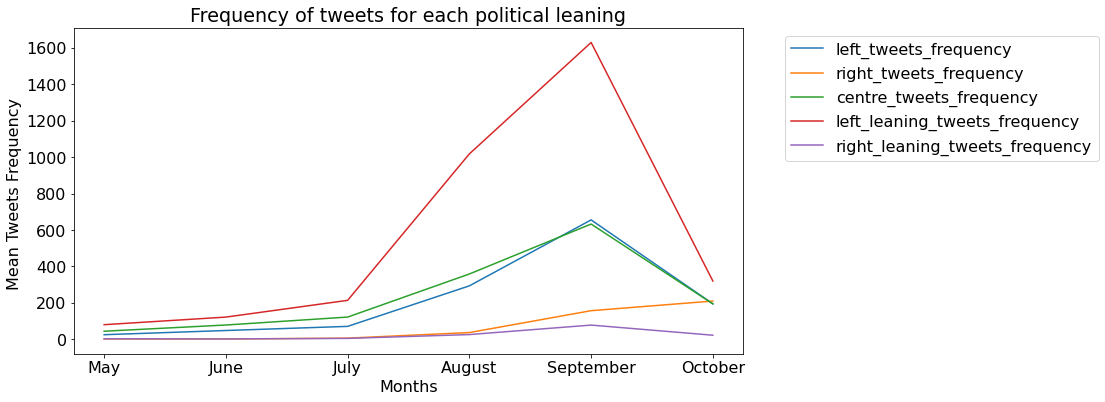

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar


merged_df['month'] = merged_df['Date'].dt.month

monthly_freq = merged_df.groupby('month').mean()

plt.figure(figsize=(12, 6))
plt.rcParams['font.size'] = '16'

variables = ['left_tweets_frequency', 'right_tweets_frequency', 'centre_tweets_frequency', 'left_leaning_tweets_frequency', 'right_leaning_tweets_frequency']
for var in variables:
    plt.plot(monthly_freq.index, monthly_freq[var], label=var)

month_names = ["May","June","July","August","September","October"]

plt.xticks(monthly_freq.index, month_names)

plt.xlabel('Months')
plt.ylabel('Mean Tweets Frequency ')

plt.title("Frequency of tweets for each political leaning")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')



plt.show()


In [100]:
plt.savefig('1.jpg',format='jpg')
#SARIMAX PREDICTION

<Figure size 432x288 with 0 Axes>

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [102]:
from datetime import datetime

In [103]:
left_filtered['Date']=pd.to_datetime(left_filtered['Date'])
left_filtered.set_index('Date', inplace=True)
#check datatype of index
left_filtered.index      

DatetimeIndex(['2018-05-26', '2018-05-27', '2018-05-28', '2018-05-29',
               '2018-05-30', '2018-05-31', '2018-06-02', '2018-06-03',
               '2018-06-04', '2018-06-05',
               ...
               '2018-09-26', '2018-09-27', '2018-09-28', '2018-10-01',
               '2018-10-03', '2018-10-04', '2018-10-02', '2018-09-30',
               '2018-09-29', '2018-10-05'],
              dtype='datetime64[ns]', name='Date', length=158, freq=None)

In [104]:
left_ts = left_filtered['frequency']
left_ts.head(10)

Date
2018-05-26    23
2018-05-27    29
2018-05-28    17
2018-05-29    37
2018-05-30    38
2018-05-31    22
2018-06-02    27
2018-06-03    32
2018-06-04    35
2018-06-05    33
Name: frequency, dtype: int64

In [105]:
left_ts=left_ts.sort_index(ascending=True)

In [106]:
from statsmodels.tsa.stattools import adfuller
def check_stationarity(ts):
    dftest = adfuller(ts)
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    if (pvalue < 0.05) and (adf < critical_value):      #here we are defining a function that uses Dicky fuller method and prints the results based on pvalue and test static value
        print('The series is stationary')
    else:
        print('The series is NOT stationary')

In [107]:
check_stationarity(left_ts)

The series is NOT stationary


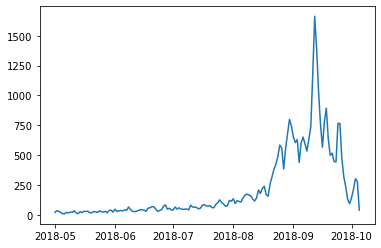

In [108]:
plt.plot(left_ts)

In [109]:
from IPython.display import display

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from time import time
import seaborn as sns
sns.set(style="whitegrid")

import warnings

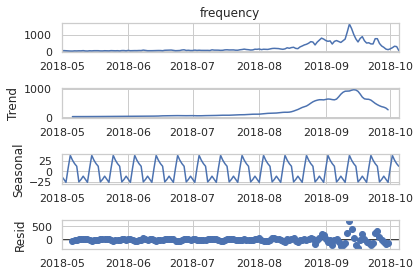

In [110]:
result = seasonal_decompose(left_ts,model='additive',period=10)      #applied seasonal decomposition to get trend and seasons.
fig = result.plot()

/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


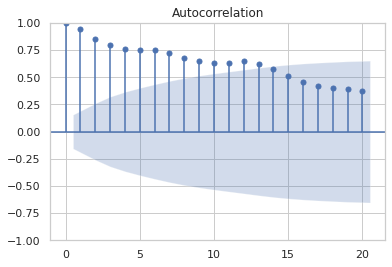

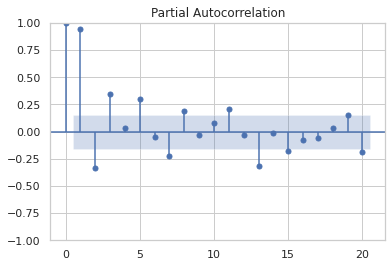

In [111]:
plot_acf(left_ts, lags=20);
plot_pacf(left_ts, lags=20);  #getting order of Auto regression (p) and getting number of forecast errors(q) to specify for the model.
                         #p is point where acf increased significantly, it can be any points but in our graph we get increasing trend at 0.


In [112]:
import time

In [113]:
start_time1 = time.time()
sarima = SARIMAX(left_ts, order=(9,0,10), seasonal_order=(2,1,1,12))
sarima_predictions = sarima.fit().predict()                            #Links to get SARIMAX parameters :- https://machinelearningmastery.com/how-to-grid-search-sarima-model-hyperparameters-for-time-series-forecasting-in-python/
                                                                       #https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/
                                                                       #https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/

/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           23     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.64724D+00    |proj g|=  5.30322D-01


 This problem is unconstrained.



At iterate    5    f=  5.41028D+00    |proj g|=  1.35199D-01

At iterate   10    f=  5.37640D+00    |proj g|=  2.52002D-02

At iterate   15    f=  5.36555D+00    |proj g|=  2.00927D-02

At iterate   20    f=  5.36284D+00    |proj g|=  1.17393D-02

At iterate   25    f=  5.36168D+00    |proj g|=  1.88168D-02

At iterate   30    f=  5.36098D+00    |proj g|=  9.30407D-03

At iterate   35    f=  5.35980D+00    |proj g|=  1.61877D-02

At iterate   40    f=  5.35444D+00    |proj g|=  5.12718D-02

At iterate   45    f=  5.34297D+00    |proj g|=  2.05885D-02

At iterate   50    f=  5.33871D+00    |proj g|=  5.78304D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [114]:
print(f"the time of execution of Sarima for left twweets in seconds is {time.time() - start_time1}")

the time of execution of Sarima for left twweets in seconds is 36.43170619010925


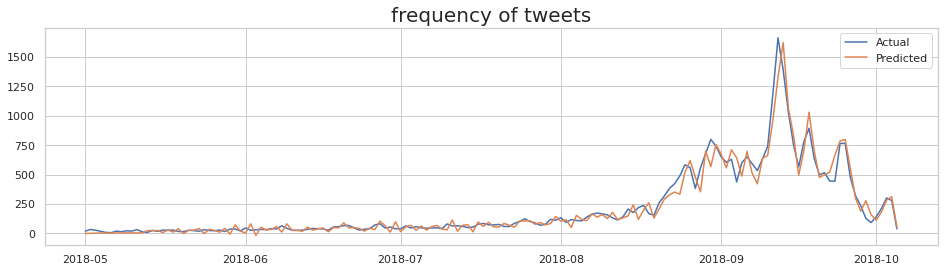

In [115]:
plt.figure(figsize=(16,4))
plt.plot(left_ts, label="Actual")
plt.plot(sarima_predictions, label="Predicted")
plt.title('frequency of tweets', fontsize=20)
#plt.ylabel('Sales', fontsize=16)
plt.legend()

In [116]:
print('RMSE OF SARIMA OF LEFT TWEETS: %.4f'%np.sqrt(sum((left_ts-sarima_predictions)**2)/(len(left_ts))))

RMSE OF SARIMA OF LEFT TWEETS: 66.1014


In [117]:
#right tweets prediction

In [118]:
right_filtered['Date']=pd.to_datetime(right_filtered['Date'])
right_filtered.set_index('Date', inplace=True)
#check datatype of index
right_filtered.index   

DatetimeIndex(['2018-06-11', '2018-06-20', '2018-06-22', '2018-07-03', '2018-07-04', '2018-07-16', '2018-07-17', '2018-07-20', '2018-07-22', '2018-07-23',
               ...
               '2018-09-30', '2018-10-02', '2018-10-03', '2018-10-04', '2018-05-29', '2018-05-14', '2018-05-17', '2018-10-05', '2018-06-23', '2018-05-16'], dtype='datetime64[ns]', name='Date', length=135, freq=None)

In [119]:
right_ts = right_filtered['frequency']
right_ts.head(10)

Date
2018-06-11     2
2018-06-20     9
2018-06-22     3
2018-07-03    10
2018-07-04     5
2018-07-16     8
2018-07-17    10
2018-07-20     8
2018-07-22     7
2018-07-23     7
Name: frequency, dtype: int64

In [120]:
right_ts=right_ts.sort_index(ascending=True)

In [121]:
check_stationarity(right_ts)

The series is NOT stationary


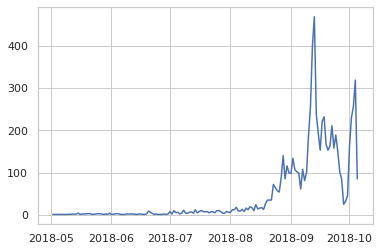

In [122]:
plt.plot(right_ts)

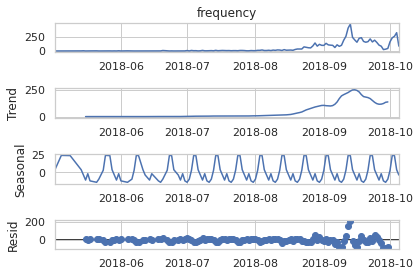

In [123]:
result = seasonal_decompose(right_ts,model='additive',period=10)      #applied seasonal decomposition to get trend and seasons.
fig = result.plot()

/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


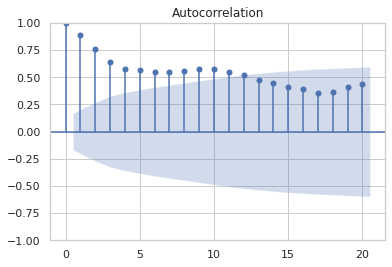

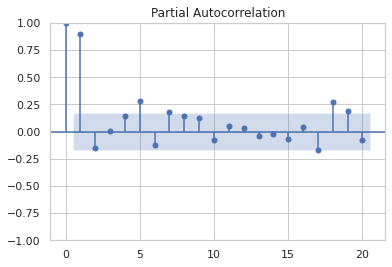

In [124]:
plot_acf(right_ts, lags=20);
plot_pacf(right_ts, lags=20); 

In [125]:
start_time2 = time.time()
sarima = SARIMAX(right_ts, order=(7,0,10), seasonal_order=(2,1,1,12))
sarima_predictions = sarima.fit().predict()                            #Links to get SARIMAX parameters :- https://machinelearningmastery.com/how-to-grid-search-sarima-model-hyperparameters-for-time-series-forecasting-in-python/
                                            

/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible star

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.86558D+00    |proj g|=  2.73236D+00


 This problem is unconstrained.



At iterate    5    f=  4.59207D+00    |proj g|=  6.98223D-02

At iterate   10    f=  4.56643D+00    |proj g|=  5.96358D-02

At iterate   15    f=  4.55775D+00    |proj g|=  3.11075D-02

At iterate   20    f=  4.55280D+00    |proj g|=  2.56915D-02

At iterate   25    f=  4.54924D+00    |proj g|=  4.98473D-02

At iterate   30    f=  4.54595D+00    |proj g|=  4.12602D-02

At iterate   35    f=  4.54498D+00    |proj g|=  4.12508D-02

At iterate   40    f=  4.54418D+00    |proj g|=  1.18722D-02

At iterate   45    f=  4.54312D+00    |proj g|=  1.63427D-02

At iterate   50    f=  4.54100D+00    |proj g|=  1.57887D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [126]:
print(f"the time of execution of Sarima for right tweets in seconds is {time.time() - start_time2}")

the time of execution of Sarima for right tweets in seconds is 23.190451622009277


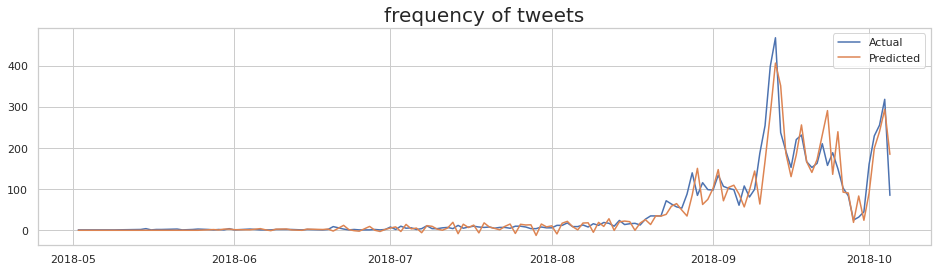

In [127]:
plt.figure(figsize=(16,4))
plt.plot(right_ts, label="Actual")
plt.plot(sarima_predictions, label="Predicted")
plt.title('frequency of tweets', fontsize=20)
#plt.ylabel('Sales', fontsize=16)
plt.legend()

In [128]:
print('RMSE OF SARIMA OF RIGHT TWEETS: %.4f'%np.sqrt(sum((right_ts-sarima_predictions)**2)/(len(right_ts))))

RMSE OF SARIMA OF RIGHT TWEETS: 31.2937


In [129]:
#centre data predictions

In [130]:
centre_filtered['Date']=pd.to_datetime(centre_filtered['Date'])
centre_filtered.set_index('Date', inplace=True)
#check datatype of index
centre_filtered.index 

DatetimeIndex(['2018-05-26', '2018-05-25', '2018-05-27', '2018-05-28', '2018-05-30', '2018-05-29', '2018-05-31', '2018-06-01', '2018-06-02', '2018-06-03',
               ...
               '2018-09-26', '2018-09-27', '2018-09-28', '2018-10-01', '2018-09-29', '2018-10-03', '2018-10-02', '2018-10-04', '2018-09-30', '2018-10-05'], dtype='datetime64[ns]', name='Date', length=158, freq=None)

In [131]:
centre_ts = centre_filtered['frequency']
centre_ts.head(10)

Date
2018-05-26    35
2018-05-25    51
2018-05-27    26
2018-05-28    26
2018-05-30    84
2018-05-29    43
2018-05-31    62
2018-06-01    54
2018-06-02    48
2018-06-03    30
Name: frequency, dtype: int64

In [132]:
centre_ts=centre_ts.sort_index(ascending=True)

In [133]:
check_stationarity(centre_ts)

The series is NOT stationary


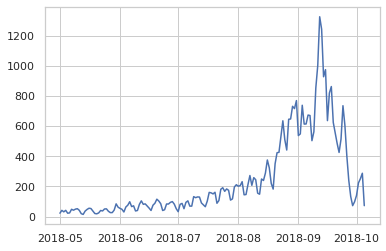

In [134]:
plt.plot(centre_ts)

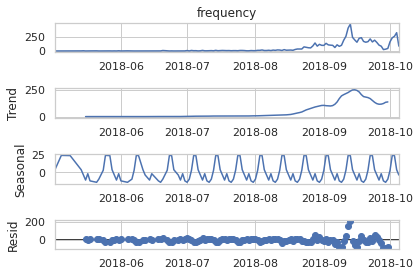

In [135]:
result = seasonal_decompose(right_ts,model='additive',period=10)      #applied seasonal decomposition to get trend and seasons.
fig = result.plot()

/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


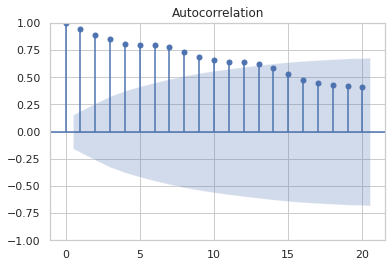

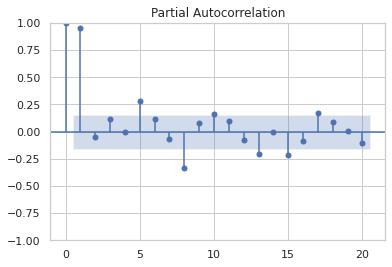

In [136]:
plot_acf(centre_ts, lags=20);
plot_pacf(centre_ts, lags=20); 

In [137]:
start_time3 = time.time()
sarima = SARIMAX(centre_ts, order=(9,0,10), seasonal_order=(2,1,1,12))
sarima_predictions = sarima.fit().predict()    

/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           23     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.83640D+00    |proj g|=  1.41282D+01


 This problem is unconstrained.



At iterate    5    f=  5.49139D+00    |proj g|=  1.87153D-01

At iterate   10    f=  5.42478D+00    |proj g|=  1.19478D-01

At iterate   15    f=  5.40826D+00    |proj g|=  3.97024D-02

At iterate   20    f=  5.40407D+00    |proj g|=  4.98274D-02

At iterate   25    f=  5.40178D+00    |proj g|=  2.27550D-02

At iterate   30    f=  5.40035D+00    |proj g|=  1.07887D-02

At iterate   35    f=  5.39783D+00    |proj g|=  6.42648D-02

At iterate   40    f=  5.39543D+00    |proj g|=  1.98062D-02

At iterate   45    f=  5.39330D+00    |proj g|=  3.47968D-02

At iterate   50    f=  5.39180D+00    |proj g|=  1.81686D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [138]:
print(f"the time of execution of Sarima for centre tweets in seconds is {time.time() - start_time3}")

the time of execution of Sarima for centre tweets in seconds is 29.554487943649292


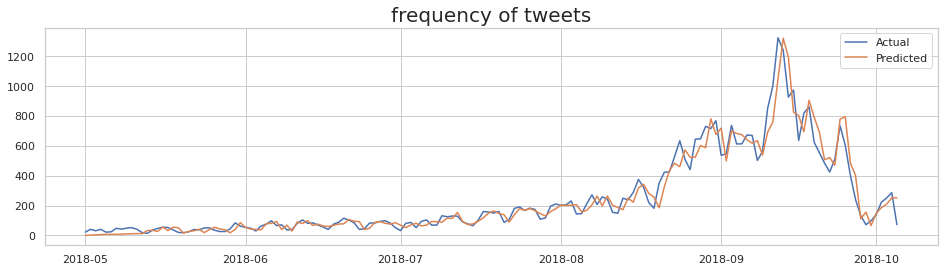

In [139]:
plt.figure(figsize=(16,4))
plt.plot(centre_ts, label="Actual")
plt.plot(sarima_predictions, label="Predicted")
plt.title('frequency of tweets', fontsize=20)
#plt.ylabel('Sales', fontsize=16)
plt.legend()

In [140]:
print('RMSE OF SARIMA OF CENTRE TWEETS: %.4f'%np.sqrt(sum((centre_ts-sarima_predictions)**2)/(len(centre_ts))))

RMSE OF SARIMA OF CENTRE TWEETS: 70.1582


In [141]:
#Left leaning tweets prediction

In [142]:
left_leaning_filtered['Date']=pd.to_datetime(left_leaning_filtered['Date'])
left_leaning_filtered.set_index('Date', inplace=True)
#check datatype of index
left_leaning_filtered.index  

DatetimeIndex(['2018-05-25', '2018-05-26', '2018-05-27', '2018-05-28', '2018-05-29', '2018-05-30', '2018-05-31', '2018-06-01', '2018-06-02', '2018-06-03',
               ...
               '2018-09-26', '2018-09-27', '2018-09-28', '2018-10-01', '2018-10-04', '2018-09-30', '2018-10-03', '2018-10-02', '2018-09-29', '2018-10-05'], dtype='datetime64[ns]', name='Date', length=158, freq=None)

In [143]:
left_leaning_ts = left_leaning_filtered['frequency']
left_leaning_ts.head(10)

Date
2018-05-25    108
2018-05-26     49
2018-05-27     72
2018-05-28     57
2018-05-29     93
2018-05-30    103
2018-05-31     97
2018-06-01     91
2018-06-02     75
2018-06-03     87
Name: frequency, dtype: int64

In [144]:
left_leaning_ts=left_leaning_ts.sort_index(ascending=True)

In [145]:
check_stationarity(left_leaning_ts)

The series is NOT stationary


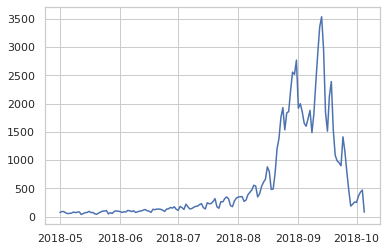

In [146]:
plt.plot(left_leaning_ts)

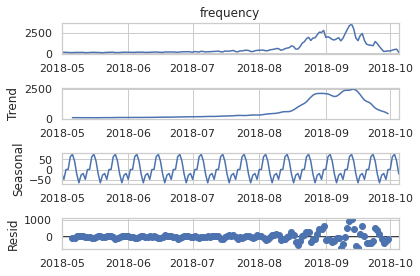

In [147]:
result = seasonal_decompose(left_leaning_ts,model='additive',period=10)      #applied seasonal decomposition to get trend and seasons.
fig = result.plot()

/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


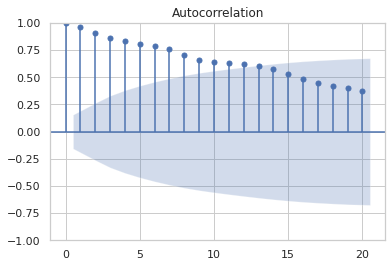

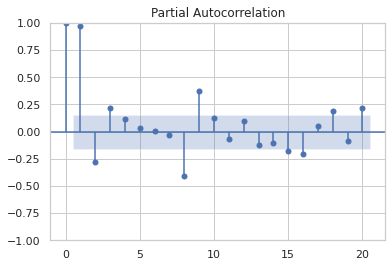

In [148]:
plot_acf(left_leaning_ts, lags=20);
plot_pacf(left_leaning_ts, lags=20);  #getting order of Auto regression (p) and getting number of forecast errors(q) to specify for the model.
                         #p is point where acf increased significantly, it can be any points but in our graph we get increasing trend at 0.


In [149]:
start_time1 = time.time()
sarima = SARIMAX(left_leaning_ts, order=(9,0,10), seasonal_order=(2,1,1,12))
sarima_predictions = sarima.fit().predict()                            #Links to get SARIMAX parameters :- https://machinelearningmastery.com/how-to-grid-search-sarima-model-hyperparameters-for-time-series-forecasting-in-python/
                                                                       #https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/
                                                                       

/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           23     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.30395D+00    |proj g|=  6.12225D+00


 This problem is unconstrained.



At iterate    5    f=  6.22499D+00    |proj g|=  8.64520D-02

At iterate   10    f=  6.19720D+00    |proj g|=  1.76042D-02

At iterate   15    f=  6.18050D+00    |proj g|=  7.11326D-02

At iterate   20    f=  6.17068D+00    |proj g|=  2.90750D-02

At iterate   25    f=  6.16795D+00    |proj g|=  1.15130D-02

At iterate   30    f=  6.16547D+00    |proj g|=  1.40125D-02

At iterate   35    f=  6.16442D+00    |proj g|=  9.29151D-03

At iterate   40    f=  6.16325D+00    |proj g|=  3.29051D-02

At iterate   45    f=  6.16239D+00    |proj g|=  1.49121D-02

At iterate   50    f=  6.16106D+00    |proj g|=  2.58271D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [150]:
print(f"the time of execution of Sarima for left leaning twweets in seconds is {time.time() - start_time1}")

the time of execution of Sarima for left leaning twweets in seconds is 25.665976524353027


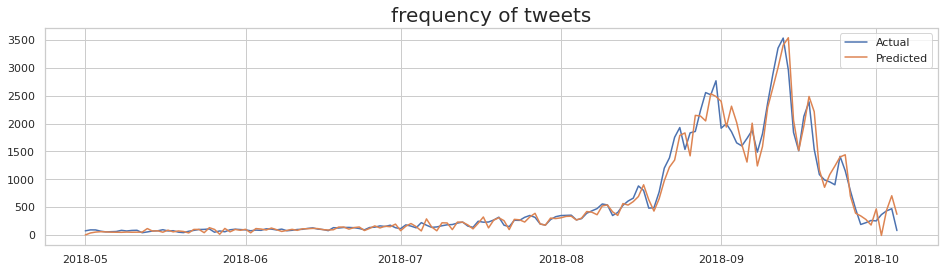

In [151]:
plt.figure(figsize=(16,4))
plt.plot(left_leaning_ts, label="Actual")
plt.plot(sarima_predictions, label="Predicted")
plt.title('frequency of tweets', fontsize=20)
#plt.ylabel('Sales', fontsize=16)
plt.legend()

In [152]:
print('RMSE OF SARIMA OF LEFT LEANING TWEETS: %.4f'%np.sqrt(sum((left_leaning_ts-sarima_predictions)**2)/(len(left_leaning_ts))))

RMSE OF SARIMA OF LEFT LEANING TWEETS: 155.7214


In [153]:
#right leaning tweets prediction

In [154]:
right_leaning_filtered['Date']=pd.to_datetime(right_leaning_filtered['Date'])
right_leaning_filtered.set_index('Date', inplace=True)
#check datatype of index
right_leaning_filtered.index 

DatetimeIndex(['2018-05-26', '2018-05-28', '2018-05-29', '2018-05-30', '2018-06-03', '2018-06-04', '2018-06-08', '2018-06-14', '2018-06-17', '2018-06-19',
               ...
               '2018-10-03', '2018-09-30', '2018-10-04', '2018-05-21', '2018-10-01', '2018-09-29', '2018-06-23', '2018-10-05', '2018-06-10', '2018-06-13'], dtype='datetime64[ns]', name='Date', length=146, freq=None)

In [155]:
right_leaning_ts = right_leaning_filtered['frequency']
right_leaning_ts.head(10)

Date
2018-05-26    1
2018-05-28    5
2018-05-29    2
2018-05-30    8
2018-06-03    4
2018-06-04    2
2018-06-08    1
2018-06-14    3
2018-06-17    2
2018-06-19    1
Name: frequency, dtype: int64

In [156]:
right_leaning_ts=right_leaning_ts.sort_index(ascending=True)

In [157]:
check_stationarity(right_leaning_ts)

The series is NOT stationary


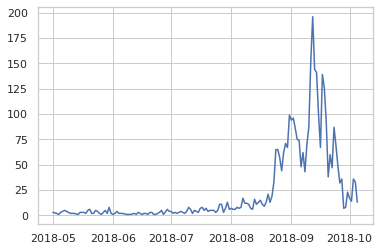

In [158]:
plt.plot(right_leaning_ts)

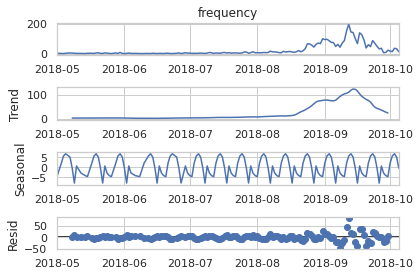

In [159]:
result = seasonal_decompose(right_leaning_ts,model='additive',period=10)      #applied seasonal decomposition to get trend and seasons.
fig = result.plot()

/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


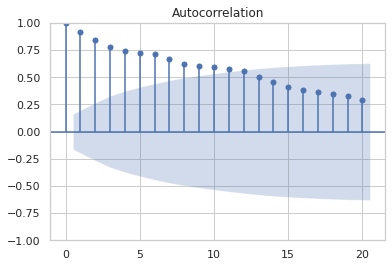

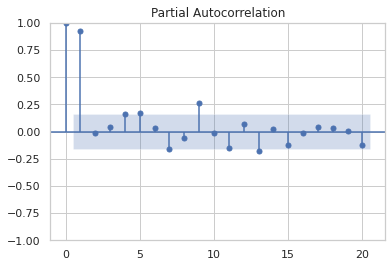

In [160]:
plot_acf(right_leaning_ts, lags=20);
plot_pacf(right_leaning_ts, lags=20);  #getting order of Auto regression (p) and getting number of forecast errors(q) to specify for the model.
                         #p is point where acf increased significantly, it can be any points but in our graph we get increasing trend at 0.


In [161]:
start_time1 = time.time()
sarima = SARIMAX(right_leaning_ts, order=(9,0,10), seasonal_order=(2,1,1,12))
sarima_predictions = sarima.fit().predict()                            #Links to get SARIMAX parameters :- https://machinelearningmastery.com/how-to-grid-search-sarima-model-hyperparameters-for-time-series-forecasting-in-python/
                                                                       #https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/

/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           23     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.09750D+00    |proj g|=  4.42212D-01


 This problem is unconstrained.



At iterate    5    f=  3.85251D+00    |proj g|=  7.32447D-02

At iterate   10    f=  3.82097D+00    |proj g|=  4.67499D-02

At iterate   15    f=  3.80707D+00    |proj g|=  5.97257D-02

At iterate   20    f=  3.79548D+00    |proj g|=  4.60710D-02

At iterate   25    f=  3.77893D+00    |proj g|=  4.94427D-02

At iterate   30    f=  3.76130D+00    |proj g|=  2.09399D-01

At iterate   35    f=  3.74911D+00    |proj g|=  6.06491D-02

At iterate   40    f=  3.74743D+00    |proj g|=  2.08382D-02

At iterate   45    f=  3.74668D+00    |proj g|=  6.51490D-02

At iterate   50    f=  3.74601D+00    |proj g|=  4.62837D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [162]:
print(f"the time of execution of Sarima for right leaning twweets in seconds is {time.time() - start_time1}")

the time of execution of Sarima for right leaning twweets in seconds is 25.988489151000977


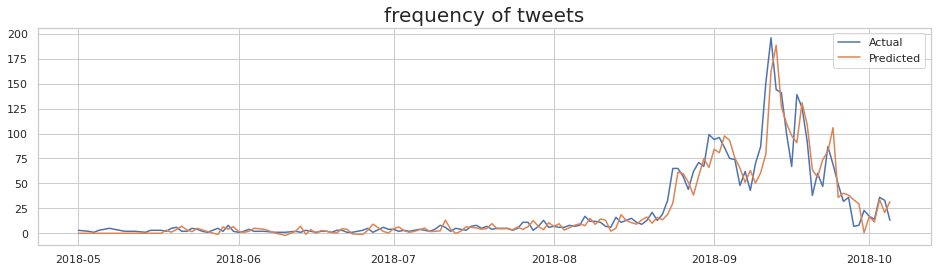

In [163]:
plt.figure(figsize=(16,4))
plt.plot(right_leaning_ts, label="Actual")
plt.plot(sarima_predictions, label="Predicted")
plt.title('frequency of tweets', fontsize=20)
#plt.ylabel('Sales', fontsize=16)
plt.legend()

In [164]:
print('RMSE OF SARIMA OF RIGHT LEANING TWEETS: %.4f'%np.sqrt(sum((right_leaning_ts-sarima_predictions)**2)/(len(right_leaning_ts))))

RMSE OF SARIMA OF RIGHT LEANING TWEETS: 13.0707


In [165]:
# LSTM For 1 day lookback and forecasting 1 day.

In [166]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from pandas import read_csv

In [167]:
dataset=left_ts

In [168]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.values.reshape(-1,1))
train_size = int(len(dataset) * 0.67)   #splitting the dataset into 67 and 33 percent.
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

105 53


In [169]:
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):   #The function takes two arguments: the dataset, which is a NumPy array that we want to convert into a dataset, 
  #and the look_back, which is the number of previous time steps to use as input variables to predict the next time period — in this case defaulted to 1.
#This default will create a dataset where X is the number of passengers at a given time (t) and Y is the number of passengers at the next time (t + 1).
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [170]:
look_back = 1
trainX, trainY = create_dataset(train, look_back) #converting as above mentioned function for training and testing.
testX, testY = create_dataset(test, look_back)
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))     

In [171]:
start_time4 = time.time()
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back))) #4 are the hidden LSTM blocks and 1 input layer as visible.
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
#K.set_value(model.optimizer.learning_rate, 0.01)
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2) #training the data with epochs=100,batch size=1;

2023-07-31 10:15:21.850806: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-07-31 10:15:21.850915: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-07-31 10:15:21.850966: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-07-31 10:15:21.851040: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-07-31 10:15:21.851154: W tensorfl

Epoch 1/100
103/103 - 2s - loss: 7.4737e-04 - 2s/epoch - 15ms/step
Epoch 2/100
103/103 - 0s - loss: 6.2265e-04 - 124ms/epoch - 1ms/step
Epoch 3/100
103/103 - 0s - loss: 5.8004e-04 - 126ms/epoch - 1ms/step
Epoch 4/100
103/103 - 0s - loss: 5.6728e-04 - 124ms/epoch - 1ms/step
Epoch 5/100
103/103 - 0s - loss: 5.0890e-04 - 125ms/epoch - 1ms/step
Epoch 6/100
103/103 - 0s - loss: 4.8864e-04 - 125ms/epoch - 1ms/step
Epoch 7/100
103/103 - 0s - loss: 4.5283e-04 - 123ms/epoch - 1ms/step
Epoch 8/100
103/103 - 0s - loss: 4.3778e-04 - 124ms/epoch - 1ms/step
Epoch 9/100
103/103 - 0s - loss: 3.7926e-04 - 123ms/epoch - 1ms/step
Epoch 10/100
103/103 - 0s - loss: 3.9315e-04 - 124ms/epoch - 1ms/step
Epoch 11/100
103/103 - 0s - loss: 3.3887e-04 - 122ms/epoch - 1ms/step
Epoch 12/100
103/103 - 0s - loss: 3.0935e-04 - 122ms/epoch - 1ms/step
Epoch 13/100
103/103 - 0s - loss: 2.9410e-04 - 124ms/epoch - 1ms/step
Epoch 14/100
103/103 - 0s - loss: 2.4890e-04 - 125ms/epoch - 1ms/step
Epoch 15/100
103/103 - 0s - los

In [172]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4)                 96        
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [173]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

2/2 [==============================] - 0s 2ms/step


In [174]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])              #Note that we invert the predictions before calculating error scores to ensure that performance is reported in the same units as the original data (thousands of passengers per month).
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [175]:
print(f"the time of execution of LSTM for 1 day lookback for left twweets in seconds is{time.time() - start_time4}")

the time of execution of LSTM for 1 day lookback for left twweets in seconds is23.89358425140381


In [176]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score RMSE OF LEFT TWEETS: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score RMSE OF LEFT TWEETS: %.2f RMSE' % (testScore))

Train Score RMSE OF LEFT TWEETS: 15.56 RMSE
Test Score RMSE OF LEFT TWEETS: 165.83 RMSE


In [177]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)         
trainPredictPlot[:, :] = numpy.nan                                              #Because of how the dataset was prepared, we must shift the predictions so that they align on the x-axis with the original dataset. 
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

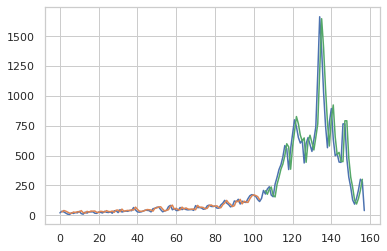

In [178]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot) #red is training data, green is testing data, blue is orginal dataset.
plt.plot(testPredictPlot)  #https://www.applause.com/blog/training-data-validation-data-vs-test-data(differences between training data, test dataset)
plt.show()

In [179]:
#LSTM 1 day lookback predicitng right tweets

In [180]:
dataset=right_ts

In [181]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.values.reshape(-1,1))  

In [182]:
train_size = int(len(dataset) * 0.75)   #splitting the dataset into 67 and 33 percent.
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

101 34


In [183]:
look_back = 1
trainX, trainY = create_dataset(train, look_back) #converting as above mentioned function for training and testing.
testX, testY = create_dataset(test, look_back)

In [184]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1])) 

In [185]:
start_time6 = time.time()
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back))) #4 are the hidden LSTM blocks and 1 input layer as visible.
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='RMSProp')
model.fit(trainX, trainY, epochs=96, batch_size=1, verbose=2) #training the data with epochs=100,batch size=1;

Epoch 1/96
99/99 - 1s - loss: 0.0029 - 1s/epoch - 15ms/step
Epoch 2/96
99/99 - 0s - loss: 0.0027 - 140ms/epoch - 1ms/step
Epoch 3/96
99/99 - 0s - loss: 0.0026 - 137ms/epoch - 1ms/step
Epoch 4/96
99/99 - 0s - loss: 0.0024 - 140ms/epoch - 1ms/step
Epoch 5/96
99/99 - 0s - loss: 0.0023 - 139ms/epoch - 1ms/step
Epoch 6/96
99/99 - 0s - loss: 0.0022 - 138ms/epoch - 1ms/step
Epoch 7/96
99/99 - 0s - loss: 0.0021 - 138ms/epoch - 1ms/step
Epoch 8/96
99/99 - 0s - loss: 0.0019 - 140ms/epoch - 1ms/step
Epoch 9/96
99/99 - 0s - loss: 0.0018 - 140ms/epoch - 1ms/step
Epoch 10/96
99/99 - 0s - loss: 0.0017 - 143ms/epoch - 1ms/step
Epoch 11/96
99/99 - 0s - loss: 0.0016 - 140ms/epoch - 1ms/step
Epoch 12/96
99/99 - 0s - loss: 0.0015 - 142ms/epoch - 1ms/step
Epoch 13/96
99/99 - 0s - loss: 0.0014 - 141ms/epoch - 1ms/step
Epoch 14/96
99/99 - 0s - loss: 0.0013 - 148ms/epoch - 1ms/step
Epoch 15/96
99/99 - 0s - loss: 0.0012 - 144ms/epoch - 1ms/step
Epoch 16/96
99/99 - 0s - loss: 0.0011 - 148ms/epoch - 1ms/step
Epo

In [186]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 4)                 96        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [187]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

1/1 [==============================] - 0s 23ms/step


In [188]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])              #Note that we invert the predictions before calculating error scores to ensure that performance is reported in the same units as the original data (thousands of passengers per month).
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [189]:
print(f"the time of execution of LSTM for right tweets in seconds is {time.time() - start_time6}")

the time of execution of LSTM for right tweets in seconds is 15.371243476867676


In [190]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score RMSE OF right tweets: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score RMSE OF right tweets: %.2f RMSE' % (testScore))

Train Score RMSE OF right tweets: 10.49 RMSE
Test Score RMSE OF right tweets: 65.77 RMSE


In [191]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)         
trainPredictPlot[:, :] = numpy.nan                                              #Because of how the dataset was prepared, we must shift the predictions so that they align on the x-axis with the original dataset. 
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

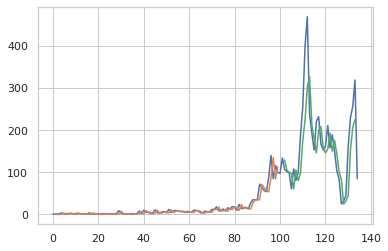

In [192]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot) #red is training data, green is testing data, blue is orginal dataset.
plt.plot(testPredictPlot)  #https://www.applause.com/blog/training-data-validation-data-vs-test-data(differences between training data, test dataset)
plt.show()

In [193]:
#centre tweets prediction

In [194]:
dataset=centre_ts

In [195]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.values.reshape(-1,1))

In [196]:
train_size = int(len(dataset) * 0.7)   #splitting the dataset into 67 and 33 percent.
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

110 48


In [197]:
look_back = 1
trainX, trainY = create_dataset(train, look_back) #converting as above mentioned function for training and testing.
testX, testY = create_dataset(test, look_back)

In [198]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))   

In [199]:
start_time5 = time.time()
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back))) #4 are the hidden LSTM blocks and 1 input layer as visible.
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='RMSProp')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2) #training the data with epochs=100,batch size=1;

Epoch 1/100
108/108 - 1s - loss: 0.0026 - 1s/epoch - 14ms/step
Epoch 2/100
108/108 - 0s - loss: 0.0021 - 150ms/epoch - 1ms/step
Epoch 3/100
108/108 - 0s - loss: 0.0020 - 152ms/epoch - 1ms/step
Epoch 4/100
108/108 - 0s - loss: 0.0019 - 149ms/epoch - 1ms/step
Epoch 5/100
108/108 - 0s - loss: 0.0017 - 146ms/epoch - 1ms/step
Epoch 6/100
108/108 - 0s - loss: 0.0016 - 147ms/epoch - 1ms/step
Epoch 7/100
108/108 - 0s - loss: 0.0014 - 148ms/epoch - 1ms/step
Epoch 8/100
108/108 - 0s - loss: 0.0013 - 147ms/epoch - 1ms/step
Epoch 9/100
108/108 - 0s - loss: 0.0012 - 146ms/epoch - 1ms/step
Epoch 10/100
108/108 - 0s - loss: 0.0011 - 146ms/epoch - 1ms/step
Epoch 11/100
108/108 - 0s - loss: 9.7209e-04 - 149ms/epoch - 1ms/step
Epoch 12/100
108/108 - 0s - loss: 8.8610e-04 - 145ms/epoch - 1ms/step
Epoch 13/100
108/108 - 0s - loss: 8.2203e-04 - 149ms/epoch - 1ms/step
Epoch 14/100
108/108 - 0s - loss: 7.5722e-04 - 148ms/epoch - 1ms/step
Epoch 15/100
108/108 - 0s - loss: 7.2502e-04 - 149ms/epoch - 1ms/step
E

In [200]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 4)                 96        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [201]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

2/2 [==============================] - 0s 2ms/step


In [202]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])              #Note that we invert the predictions before calculating error scores to ensure that performance is reported in the same units as the original data (thousands of passengers per month).
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


In [203]:
print(f"the time of execution of LSTM for 1 day back for centre tweets in seconds is {time.time() - start_time5}")

the time of execution of LSTM for 1 day back for centre tweets in seconds is 15.680116653442383


In [204]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score RMSE OF centre tweets: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score RMSE OF centre tweets: %.2f RMSE' % (testScore))

Train Score RMSE OF centre tweets: 34.58 RMSE
Test Score RMSE OF centre tweets: 159.76 RMSE


In [205]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)         
trainPredictPlot[:, :] = numpy.nan                                              #Because of how the dataset was prepared, we must shift the predictions so that they align on the x-axis with the original dataset. 
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

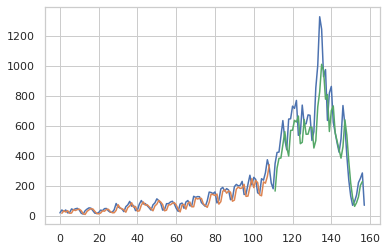

In [206]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot) #red is training data, green is testing data, blue is orginal dataset.
plt.plot(testPredictPlot)  #https://www.applause.com/blog/training-data-validation-data-vs-test-data(differences between training data, test dataset)
plt.show()

In [207]:
#right leaning tweets prediction

In [208]:
dataset=right_leaning_ts

In [209]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.values.reshape(-1,1))

In [210]:
train_size = int(len(dataset) * 0.8)   #splitting the dataset into 67 and 33 percent.
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

116 30


In [211]:
look_back = 1
trainX, trainY = create_dataset(train, look_back) #converting as above mentioned function for training and testing.
testX, testY = create_dataset(test, look_back)

In [212]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))  

In [213]:
start_time5 = time.time()
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back))) #4 are the hidden LSTM blocks and 1 input layer as visible.
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='RMSProp')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2) #training the data with epochs=100,batch size=1;

Epoch 1/100
114/114 - 2s - loss: 0.0139 - 2s/epoch - 14ms/step
Epoch 2/100
114/114 - 0s - loss: 0.0127 - 154ms/epoch - 1ms/step
Epoch 3/100
114/114 - 0s - loss: 0.0123 - 142ms/epoch - 1ms/step
Epoch 4/100
114/114 - 0s - loss: 0.0117 - 129ms/epoch - 1ms/step
Epoch 5/100
114/114 - 0s - loss: 0.0111 - 123ms/epoch - 1ms/step
Epoch 6/100
114/114 - 0s - loss: 0.0107 - 119ms/epoch - 1ms/step
Epoch 7/100
114/114 - 0s - loss: 0.0101 - 120ms/epoch - 1ms/step
Epoch 8/100
114/114 - 0s - loss: 0.0096 - 121ms/epoch - 1ms/step
Epoch 9/100
114/114 - 0s - loss: 0.0088 - 120ms/epoch - 1ms/step
Epoch 10/100
114/114 - 0s - loss: 0.0087 - 128ms/epoch - 1ms/step
Epoch 11/100
114/114 - 0s - loss: 0.0077 - 122ms/epoch - 1ms/step
Epoch 12/100
114/114 - 0s - loss: 0.0072 - 114ms/epoch - 996us/step
Epoch 13/100
114/114 - 0s - loss: 0.0063 - 112ms/epoch - 985us/step
Epoch 14/100
114/114 - 0s - loss: 0.0057 - 112ms/epoch - 984us/step
Epoch 15/100
114/114 - 0s - loss: 0.0049 - 113ms/epoch - 989us/step
Epoch 16/100


In [214]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 4)                 96        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [215]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

1/1 [==============================] - 0s 24ms/step


In [216]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])              #Note that we invert the predictions before calculating error scores to ensure that performance is reported in the same units as the original data (thousands of passengers per month).
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [217]:
print(f"the time of execution of LSTM for 1 day back for centre tweets in seconds is {time.time() - start_time5}")

the time of execution of LSTM for 1 day back for centre tweets in seconds is 14.570449829101562


In [218]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score RMSE OF right leaning tweets: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score RMSE OF right leaning tweets: %.2f RMSE' % (testScore))

Train Score RMSE OF right leaning tweets: 5.95 RMSE
Test Score RMSE OF right leaning tweets: 29.92 RMSE


In [219]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)         
trainPredictPlot[:, :] = numpy.nan                                              #Because of how the dataset was prepared, we must shift the predictions so that they align on the x-axis with the original dataset. 
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

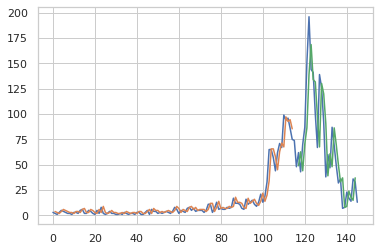

In [220]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot) #red is training data, green is testing data, blue is orginal dataset.
plt.plot(testPredictPlot)  #https://www.applause.com/blog/training-data-validation-data-vs-test-data(differences between training data, test dataset)
plt.show()

In [221]:
#left leaning tweets prediction

In [222]:
dataset=left_leaning_ts

In [223]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.values.reshape(-1,1))

In [224]:
train_size = int(len(dataset) * 0.7)   #splitting the dataset into 67 and 33 percent.
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

110 48


In [225]:
look_back = 1
trainX, trainY = create_dataset(train, look_back) #converting as above mentioned function for training and testing.
testX, testY = create_dataset(test, look_back)

In [226]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))  

In [227]:
start_time5 = time.time()
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back))) #4 are the hidden LSTM blocks and 1 input layer as visible.
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='RMSProp')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2) #training the data with epochs=100,batch size=1;

Epoch 1/100
108/108 - 1s - loss: 0.0019 - 1s/epoch - 12ms/step
Epoch 2/100
108/108 - 0s - loss: 0.0016 - 135ms/epoch - 1ms/step
Epoch 3/100
108/108 - 0s - loss: 0.0016 - 121ms/epoch - 1ms/step
Epoch 4/100
108/108 - 0s - loss: 0.0015 - 128ms/epoch - 1ms/step
Epoch 5/100
108/108 - 0s - loss: 0.0014 - 126ms/epoch - 1ms/step
Epoch 6/100
108/108 - 0s - loss: 0.0013 - 122ms/epoch - 1ms/step
Epoch 7/100
108/108 - 0s - loss: 0.0012 - 125ms/epoch - 1ms/step
Epoch 8/100
108/108 - 0s - loss: 0.0011 - 122ms/epoch - 1ms/step
Epoch 9/100
108/108 - 0s - loss: 0.0011 - 124ms/epoch - 1ms/step
Epoch 10/100
108/108 - 0s - loss: 9.3217e-04 - 120ms/epoch - 1ms/step
Epoch 11/100
108/108 - 0s - loss: 8.9186e-04 - 119ms/epoch - 1ms/step
Epoch 12/100
108/108 - 0s - loss: 8.0157e-04 - 119ms/epoch - 1ms/step
Epoch 13/100
108/108 - 0s - loss: 7.1489e-04 - 124ms/epoch - 1ms/step
Epoch 14/100
108/108 - 0s - loss: 6.4224e-04 - 120ms/epoch - 1ms/step
Epoch 15/100
108/108 - 0s - loss: 5.8135e-04 - 117ms/epoch - 1ms/st

In [228]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 4)                 96        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [229]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

2/2 [==============================] - 0s 2ms/step


In [230]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])              #Note that we invert the predictions before calculating error scores to ensure that performance is reported in the same units as the original data (thousands of passengers per month).
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [231]:
print(f"the time of execution of LSTM for 1 day back for left leaning tweets in seconds is {time.time() - start_time5}")

the time of execution of LSTM for 1 day back for left leaning tweets in seconds is 13.549591064453125


In [232]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score RMSE OF left leaning tweets: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score RMSE OF left leaning tweets: %.2f RMSE' % (testScore))

Train Score RMSE OF left leaning tweets: 50.54 RMSE
Test Score RMSE OF left leaning tweets: 416.60 RMSE


In [233]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)         
trainPredictPlot[:, :] = numpy.nan                                              #Because of how the dataset was prepared, we must shift the predictions so that they align on the x-axis with the original dataset. 
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

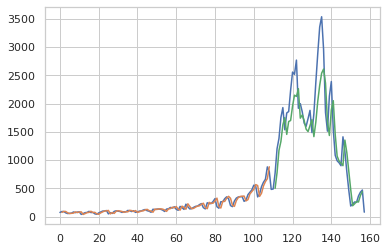

In [234]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot) #red is training data, green is testing data, blue is orginal dataset.
plt.plot(testPredictPlot)  #https://www.applause.com/blog/training-data-validation-data-vs-test-data(differences between training data, test dataset)
plt.show()

In [235]:
#LSTM FOR 14 DAYS LOOKBACK 

In [236]:
dataset1=left_ts

In [237]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset1 = scaler.fit_transform(dataset1.values.reshape(-1,1))
train_size = int(len(dataset1) * 0.6)   #splitting the dataset into 67 and 33 percent.
test_size = len(dataset1) - train_size
train, test = dataset1[0:train_size,:], dataset1[train_size:len(dataset1),:]
print(len(train), len(test))

94 64


Epoch 1/100
79/79 - 1s - loss: 2.2996e-04 - 1s/epoch - 16ms/step
Epoch 2/100
79/79 - 0s - loss: 1.9487e-04 - 91ms/epoch - 1ms/step
Epoch 3/100
79/79 - 0s - loss: 1.7203e-04 - 88ms/epoch - 1ms/step
Epoch 4/100
79/79 - 0s - loss: 1.5821e-04 - 87ms/epoch - 1ms/step
Epoch 5/100
79/79 - 0s - loss: 1.3712e-04 - 84ms/epoch - 1ms/step
Epoch 6/100
79/79 - 0s - loss: 1.2687e-04 - 85ms/epoch - 1ms/step
Epoch 7/100
79/79 - 0s - loss: 1.2225e-04 - 89ms/epoch - 1ms/step
Epoch 8/100
79/79 - 0s - loss: 1.0681e-04 - 85ms/epoch - 1ms/step
Epoch 9/100
79/79 - 0s - loss: 1.0828e-04 - 88ms/epoch - 1ms/step
Epoch 10/100
79/79 - 0s - loss: 9.6637e-05 - 86ms/epoch - 1ms/step
Epoch 11/100
79/79 - 0s - loss: 9.7228e-05 - 86ms/epoch - 1ms/step
Epoch 12/100
79/79 - 0s - loss: 8.9672e-05 - 85ms/epoch - 1ms/step
Epoch 13/100
79/79 - 0s - loss: 9.0730e-05 - 84ms/epoch - 1ms/step
Epoch 14/100
79/79 - 0s - loss: 8.1648e-05 - 81ms/epoch - 1ms/step
Epoch 15/100
79/79 - 0s - loss: 8.0861e-05 - 75ms/epoch - 951us/step
Epo

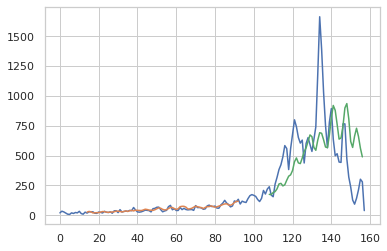

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 4)                 304       
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 309
Trainable params: 309
Non-trainable params: 0
_________________________________________________________________


In [238]:
start_time7 = time.time()
for i in range(14,15):
    trainX, trainY = create_dataset(train, i) #converting as above mentioned function for training and testing.
    testX, testY = create_dataset(test, i)
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, i))) #4 are the hidden LSTM blocks and 1 input layer as visible.
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='RMSProp')
    model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2) #training the data with epochs=100,batch size=1;
    # make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])              #Note that we invert the predictions before calculating error scores to ensure that performance is reported in the same units as the original data (thousands of passengers per month).
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Train Score RMSE OF left tweets: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test Score RMSE OF left tweets: %.2f RMSE' % (testScore))
    # shift train predictions for plotting
    trainPredictPlot = numpy.empty_like(dataset1)         
    trainPredictPlot[:, :] = numpy.nan                                              #Because of how the dataset was prepared, we must shift the predictions so that they align on the x-axis with the original dataset. 
    trainPredictPlot[i:len(trainPredict)+i, :] = trainPredict
    # shift test predictions for plotting
    testPredictPlot = numpy.empty_like(dataset1)
    testPredictPlot[:, :] = numpy.nan
    testPredictPlot[len(trainPredict)+(i*2)+1:len(dataset1)-1, :] = testPredict
    # plot baseline and predictions
    plt.plot(scaler.inverse_transform(dataset1))
    plt.plot(trainPredictPlot) #red is training data, green is testing data, blue is orginal dataset.
    plt.plot(testPredictPlot)  #https://www.applause.com/blog/training-data-validation-data-vs-test-data(differences between training data, test dataset)
    plt.show()
    model.summary()

In [239]:
#centre tweets prediction for multiple lookbacks

In [240]:
dataset2=centre_ts

In [241]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset2 = scaler.fit_transform(dataset2.values.reshape(-1,1))
train_size = int(len(dataset1) * 0.6)   #splitting the dataset into 67 and 33 percent.
test_size = len(dataset2) - train_size
train, test = dataset2[0:train_size,:], dataset2[train_size:len(dataset2),:]
print(len(train), len(test))

94 64


Epoch 1/100
79/79 - 1s - loss: 0.0031 - 1s/epoch - 17ms/step
Epoch 2/100
79/79 - 0s - loss: 0.0018 - 107ms/epoch - 1ms/step
Epoch 3/100
79/79 - 0s - loss: 0.0016 - 98ms/epoch - 1ms/step
Epoch 4/100
79/79 - 0s - loss: 0.0014 - 97ms/epoch - 1ms/step
Epoch 5/100
79/79 - 0s - loss: 0.0013 - 98ms/epoch - 1ms/step
Epoch 6/100
79/79 - 0s - loss: 0.0012 - 95ms/epoch - 1ms/step
Epoch 7/100
79/79 - 0s - loss: 0.0011 - 96ms/epoch - 1ms/step
Epoch 8/100
79/79 - 0s - loss: 0.0011 - 90ms/epoch - 1ms/step
Epoch 9/100
79/79 - 0s - loss: 9.4768e-04 - 84ms/epoch - 1ms/step
Epoch 10/100
79/79 - 0s - loss: 8.8512e-04 - 82ms/epoch - 1ms/step
Epoch 11/100
79/79 - 0s - loss: 8.0620e-04 - 82ms/epoch - 1ms/step
Epoch 12/100
79/79 - 0s - loss: 7.6689e-04 - 84ms/epoch - 1ms/step
Epoch 13/100
79/79 - 0s - loss: 7.1480e-04 - 83ms/epoch - 1ms/step
Epoch 14/100
79/79 - 0s - loss: 6.5802e-04 - 85ms/epoch - 1ms/step
Epoch 15/100
79/79 - 0s - loss: 5.9570e-04 - 85ms/epoch - 1ms/step
Epoch 16/100
79/79 - 0s - loss: 5.64

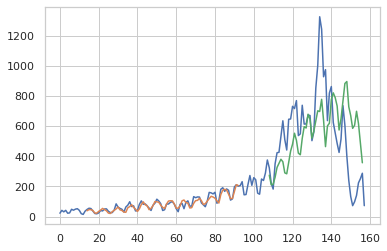

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 4)                 304       
                                                                 
 dense_6 (Dense)             (None, 1)                 5         
                                                                 
Total params: 309
Trainable params: 309
Non-trainable params: 0
_________________________________________________________________


In [242]:
start_time8 = time.time()
for i in range(14,15):
    trainX, trainY = create_dataset(train, i) #converting as above mentioned function for training and testing.
    testX, testY = create_dataset(test, i)
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, i))) #4 are the hidden LSTM blocks and 1 input layer as visible.
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='RMSProp')
    model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2) #training the data with epochs=100,batch size=1;
    # make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])              #Note that we invert the predictions before calculating error scores to ensure that performance is reported in the same units as the original data (thousands of passengers per month).
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Train Score RMSE OF centre tweets: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test Score RMSE OF centre tweets: %.2f RMSE' % (testScore))
    # shift train predictions for plotting
    trainPredictPlot = numpy.empty_like(dataset2)         
    trainPredictPlot[:, :] = numpy.nan                                              #Because of how the dataset was prepared, we must shift the predictions so that they align on the x-axis with the original dataset. 
    trainPredictPlot[i:len(trainPredict)+i, :] = trainPredict
    # shift test predictions for plotting
    testPredictPlot = numpy.empty_like(dataset2)
    testPredictPlot[:, :] = numpy.nan
    testPredictPlot[len(trainPredict)+(i*2)+1:len(dataset2)-1, :] = testPredict
    # plot baseline and predictions
    plt.plot(scaler.inverse_transform(dataset2))
    plt.plot(trainPredictPlot) #red is training data, green is testing data, blue is orginal dataset.
    plt.plot(testPredictPlot)  #https://www.applause.com/blog/training-data-validation-data-vs-test-data(differences between training data, test dataset)
    plt.show()
    model.summary()

In [243]:
print(f"the time of execution of LSTM for 14 days look back for centre tweets in seconds is {time.time() - start_time8}")

the time of execution of LSTM for 14 days look back for centre tweets in seconds is 10.892300844192505


In [244]:
# right tweets prediction for multiple lookbacks

In [245]:
dataset3=right_ts

In [246]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset3 = scaler.fit_transform(dataset3.values.reshape(-1,1))
train_size = int(len(dataset3) * 0.6)   #splitting the dataset into 67 and 33 percent.
test_size = len(dataset3) - train_size
train, test = dataset3[0:train_size,:], dataset3[train_size:len(dataset3),:]
print(len(train), len(test))

81 54


Epoch 1/96
66/66 - 1s - loss: 8.4966e-05 - 1s/epoch - 23ms/step
Epoch 2/96
66/66 - 0s - loss: 8.3623e-05 - 83ms/epoch - 1ms/step
Epoch 3/96
66/66 - 0s - loss: 7.3037e-05 - 76ms/epoch - 1ms/step
Epoch 4/96
66/66 - 0s - loss: 6.7765e-05 - 74ms/epoch - 1ms/step
Epoch 5/96
66/66 - 0s - loss: 5.9523e-05 - 72ms/epoch - 1ms/step
Epoch 6/96
66/66 - 0s - loss: 5.9107e-05 - 76ms/epoch - 1ms/step
Epoch 7/96
66/66 - 0s - loss: 5.7794e-05 - 72ms/epoch - 1ms/step
Epoch 8/96
66/66 - 0s - loss: 5.0076e-05 - 70ms/epoch - 1ms/step
Epoch 9/96
66/66 - 0s - loss: 5.4396e-05 - 69ms/epoch - 1ms/step
Epoch 10/96
66/66 - 0s - loss: 4.7216e-05 - 71ms/epoch - 1ms/step
Epoch 11/96
66/66 - 0s - loss: 4.8477e-05 - 71ms/epoch - 1ms/step
Epoch 12/96
66/66 - 0s - loss: 4.8961e-05 - 70ms/epoch - 1ms/step
Epoch 13/96
66/66 - 0s - loss: 4.6270e-05 - 71ms/epoch - 1ms/step
Epoch 14/96
66/66 - 0s - loss: 4.5384e-05 - 71ms/epoch - 1ms/step
Epoch 15/96
66/66 - 0s - loss: 5.3491e-05 - 72ms/epoch - 1ms/step
Epoch 16/96
66/66 - 

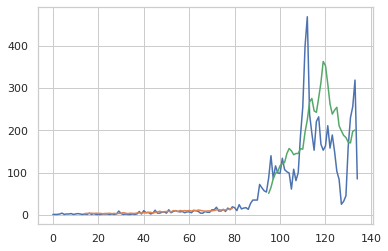

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 4)                 304       
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 309
Trainable params: 309
Non-trainable params: 0
_________________________________________________________________


In [247]:
start_time9 = time.time()
for i in range(14,15):
    trainX, trainY = create_dataset(train, i) #converting as above mentioned function for training and testing.
    testX, testY = create_dataset(test, i)
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, i))) #4 are the hidden LSTM blocks and 1 input layer as visible.
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=96, batch_size=1, verbose=2) #training the data with epochs=100,batch size=1;
    # make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])              #Note that we invert the predictions before calculating error scores to ensure that performance is reported in the same units as the original data (thousands of passengers per month).
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Train Score RMSE OF right tweets: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test Score RMSE OF right tweets: %.2f RMSE' % (testScore))
    # shift train predictions for plotting
    trainPredictPlot = numpy.empty_like(dataset3)         
    trainPredictPlot[:, :] = numpy.nan                                              #Because of how the dataset was prepared, we must shift the predictions so that they align on the x-axis with the original dataset. 
    trainPredictPlot[i:len(trainPredict)+i, :] = trainPredict
    # shift test predictions for plotting
    testPredictPlot = numpy.empty_like(dataset3)
    testPredictPlot[:, :] = numpy.nan
    testPredictPlot[len(trainPredict)+(i*2)+1:len(dataset3)-1, :] = testPredict
    # plot baseline and predictions
    plt.plot(scaler.inverse_transform(dataset3))
    plt.plot(trainPredictPlot) #red is training data, green is testing data, blue is orginal dataset.
    plt.plot(testPredictPlot)  #https://www.applause.com/blog/training-data-validation-data-vs-test-data(differences between training data, test dataset)
    plt.show()
    model.summary()

In [248]:
# right leaning tweets prediction for multiple lookbacks

In [249]:
dataset4=right_leaning_ts

In [250]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset4 = scaler.fit_transform(dataset4.values.reshape(-1,1))
train_size = int(len(dataset4) * 0.6)   #splitting the dataset into 67 and 33 percent.
test_size = len(dataset4) - train_size
train, test = dataset4[0:train_size,:], dataset4[train_size:len(dataset4),:]
print(len(train), len(test))

87 59


Epoch 1/96
72/72 - 1s - loss: 1.4200e-04 - 1s/epoch - 18ms/step
Epoch 2/96
72/72 - 0s - loss: 1.3319e-04 - 96ms/epoch - 1ms/step
Epoch 3/96
72/72 - 0s - loss: 1.3507e-04 - 91ms/epoch - 1ms/step
Epoch 4/96
72/72 - 0s - loss: 1.1899e-04 - 87ms/epoch - 1ms/step
Epoch 5/96
72/72 - 0s - loss: 1.2003e-04 - 88ms/epoch - 1ms/step
Epoch 6/96
72/72 - 0s - loss: 1.1421e-04 - 88ms/epoch - 1ms/step
Epoch 7/96
72/72 - 0s - loss: 1.1938e-04 - 88ms/epoch - 1ms/step
Epoch 8/96
72/72 - 0s - loss: 1.1073e-04 - 90ms/epoch - 1ms/step
Epoch 9/96
72/72 - 0s - loss: 1.0621e-04 - 88ms/epoch - 1ms/step
Epoch 10/96
72/72 - 0s - loss: 1.0891e-04 - 87ms/epoch - 1ms/step
Epoch 11/96
72/72 - 0s - loss: 1.1014e-04 - 88ms/epoch - 1ms/step
Epoch 12/96
72/72 - 0s - loss: 1.1383e-04 - 86ms/epoch - 1ms/step
Epoch 13/96
72/72 - 0s - loss: 1.1777e-04 - 89ms/epoch - 1ms/step
Epoch 14/96
72/72 - 0s - loss: 1.0294e-04 - 89ms/epoch - 1ms/step
Epoch 15/96
72/72 - 0s - loss: 1.2247e-04 - 89ms/epoch - 1ms/step
Epoch 16/96
72/72 - 

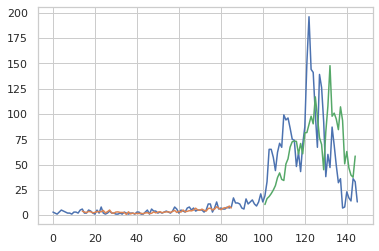

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 4)                 304       
                                                                 
 dense_8 (Dense)             (None, 1)                 5         
                                                                 
Total params: 309
Trainable params: 309
Non-trainable params: 0
_________________________________________________________________


In [251]:
start_time9 = time.time()
for i in range(14,15):
    trainX, trainY = create_dataset(train, i) #converting as above mentioned function for training and testing.
    testX, testY = create_dataset(test, i)
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, i))) #4 are the hidden LSTM blocks and 1 input layer as visible.
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=96, batch_size=1, verbose=2) #training the data with epochs=100,batch size=1;
    # make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])              #Note that we invert the predictions before calculating error scores to ensure that performance is reported in the same units as the original data (thousands of passengers per month).
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Train Score RMSE OF right leaning tweets: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test Score RMSE OF right leaning tweets: %.2f RMSE' % (testScore))
    # shift train predictions for plotting
    trainPredictPlot = numpy.empty_like(dataset4)         
    trainPredictPlot[:, :] = numpy.nan                                              #Because of how the dataset was prepared, we must shift the predictions so that they align on the x-axis with the original dataset. 
    trainPredictPlot[i:len(trainPredict)+i, :] = trainPredict
    # shift test predictions for plotting
    testPredictPlot = numpy.empty_like(dataset4)
    testPredictPlot[:, :] = numpy.nan
    testPredictPlot[len(trainPredict)+(i*2)+1:len(dataset4)-1, :] = testPredict
    # plot baseline and predictions
    plt.plot(scaler.inverse_transform(dataset4))
    plt.plot(trainPredictPlot) #red is training data, green is testing data, blue is orginal dataset.
    plt.plot(testPredictPlot)  #https://www.applause.com/blog/training-data-validation-data-vs-test-data(differences between training data, test dataset)
    plt.show()
    model.summary()

In [252]:
# prediction of left leaning tweets in LSTM 14 days as feedback

In [253]:
dataset5=left_leaning_ts

In [254]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset5 = scaler.fit_transform(dataset5.values.reshape(-1,1))
train_size = int(len(dataset5) * 0.6)   #splitting the dataset into 67 and 33 percent.
test_size = len(dataset5) - train_size
train, test = dataset5[0:train_size,:], dataset5[train_size:len(dataset5),:]
print(len(train), len(test))

94 64


Epoch 1/96
79/79 - 1s - loss: 3.2440e-04 - 1s/epoch - 17ms/step
Epoch 2/96
79/79 - 0s - loss: 2.1916e-04 - 105ms/epoch - 1ms/step
Epoch 3/96
79/79 - 0s - loss: 1.6841e-04 - 99ms/epoch - 1ms/step
Epoch 4/96
79/79 - 0s - loss: 1.2042e-04 - 97ms/epoch - 1ms/step
Epoch 5/96
79/79 - 0s - loss: 9.7397e-05 - 101ms/epoch - 1ms/step
Epoch 6/96
79/79 - 0s - loss: 7.7292e-05 - 100ms/epoch - 1ms/step
Epoch 7/96
79/79 - 0s - loss: 7.2240e-05 - 97ms/epoch - 1ms/step
Epoch 8/96
79/79 - 0s - loss: 6.4515e-05 - 98ms/epoch - 1ms/step
Epoch 9/96
79/79 - 0s - loss: 6.6750e-05 - 104ms/epoch - 1ms/step
Epoch 10/96
79/79 - 0s - loss: 6.4599e-05 - 101ms/epoch - 1ms/step
Epoch 11/96
79/79 - 0s - loss: 5.9021e-05 - 106ms/epoch - 1ms/step
Epoch 12/96
79/79 - 0s - loss: 6.3225e-05 - 113ms/epoch - 1ms/step
Epoch 13/96
79/79 - 0s - loss: 6.1957e-05 - 117ms/epoch - 1ms/step
Epoch 14/96
79/79 - 0s - loss: 6.0890e-05 - 108ms/epoch - 1ms/step
Epoch 15/96
79/79 - 0s - loss: 5.5743e-05 - 92ms/epoch - 1ms/step
Epoch 16/96

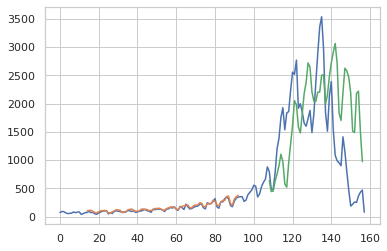

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 4)                 304       
                                                                 
 dense_9 (Dense)             (None, 1)                 5         
                                                                 
Total params: 309
Trainable params: 309
Non-trainable params: 0
_________________________________________________________________


In [255]:
start_time9 = time.time()
for i in range(14,15):
    trainX, trainY = create_dataset(train, i) #converting as above mentioned function for training and testing.
    testX, testY = create_dataset(test, i)
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, i))) #4 are the hidden LSTM blocks and 1 input layer as visible.
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=96, batch_size=1, verbose=2) #training the data with epochs=100,batch size=1;
    # make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])              #Note that we invert the predictions before calculating error scores to ensure that performance is reported in the same units as the original data (thousands of passengers per month).
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Train Score RMSE OF left leaning tweets: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test Score RMSE OF left leaning tweets: %.2f RMSE' % (testScore))
    # shift train predictions for plotting
    trainPredictPlot = numpy.empty_like(dataset5)         
    trainPredictPlot[:, :] = numpy.nan                                              #Because of how the dataset was prepared, we must shift the predictions so that they align on the x-axis with the original dataset. 
    trainPredictPlot[i:len(trainPredict)+i, :] = trainPredict
    # shift test predictions for plotting
    testPredictPlot = numpy.empty_like(dataset5)
    testPredictPlot[:, :] = numpy.nan
    testPredictPlot[len(trainPredict)+(i*2)+1:len(dataset5)-1, :] = testPredict
    # plot baseline and predictions
    plt.plot(scaler.inverse_transform(dataset5))
    plt.plot(trainPredictPlot) #red is training data, green is testing data, blue is orginal dataset.
    plt.plot(testPredictPlot)  #https://www.applause.com/blog/training-data-validation-data-vs-test-data(differences between training data, test dataset)
    plt.show()
    model.summary()

In [256]:
#Multistep timeseries forecasting

In [257]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
from numpy import array

/tmp/ipykernel_284759/1754570070.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [258]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
 
# convert time series into supervised learning problem
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)
 
# transform series into train and test sets for supervised learning
def prepare_data(series, n_test, n_lag, n_seq):
    # extract raw values
    raw_values = series.values
    # transform data to be stationary
    diff_series = difference(raw_values, 1)
    diff_values = diff_series.values
    diff_values = diff_values.reshape(len(diff_values), 1)
    # rescale values to -1, 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_values = scaler.fit_transform(diff_values)
    scaled_values = scaled_values.reshape(len(scaled_values), 1)
    # transform into supervised learning problem X, y
    supervised = series_to_supervised(scaled_values, n_lag, n_seq)
    supervised_values = supervised.values
    # split into train and test sets
    train, test = supervised_values[0:-n_test], supervised_values[-n_test:]
    return scaler, train, test
 
# fit an LSTM network to training data
def fit_lstm(train, n_lag, n_seq, n_batch, nb_epoch, n_neurons):
    # reshape training into [samples, timesteps, features]
    X, y = train[:, 0:n_lag], train[:, n_lag:]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    # design network
    model = Sequential()
    model.add(LSTM(n_neurons, batch_input_shape=(n_batch, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(y.shape[1]))
    model.compile(loss='mean_squared_error', optimizer='RMSProp')
    # fit network
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=n_batch, verbose=2, shuffle=False)
        model.reset_states()
    return model
 
# make one forecast with an LSTM,
def forecast_lstm(model, X, n_batch):
    # reshape input pattern to [samples, timesteps, features]
    X = X.reshape(1, 1, len(X))
    # make forecast
    forecast = model.predict(X, batch_size=n_batch)
    # convert to array
    return [x for x in forecast[0, :]]
 
# evaluate the persistence model
def make_forecasts(model, n_batch, train, test, n_lag, n_seq):
    forecasts = list()
    for i in range(len(test)):
        X, y = test[i, 0:n_lag], test[i, n_lag:]
        # make forecast
        forecast = forecast_lstm(model, X, n_batch)
        # store the forecast
        forecasts.append(forecast)
    return forecasts
 
# invert differenced forecast
def inverse_difference(last_ob, forecast):
    # invert first forecast
    inverted = list()
    inverted.append(forecast[0] + last_ob)
    # propagate difference forecast using inverted first value
    for i in range(1, len(forecast)):
        inverted.append(forecast[i] + inverted[i-1])
    return inverted
 
# inverse data transform on forecasts
def inverse_transform(series, forecasts, scaler, n_test):
    inverted = list()
    for i in range(len(forecasts)):
        # create array from forecast
        forecast = array(forecasts[i])
        forecast = forecast.reshape(1, len(forecast))
        # invert scaling
        inv_scale = scaler.inverse_transform(forecast)
        inv_scale = inv_scale[0, :]
        # invert differencing
        index = len(series) - n_test + i - 1
        last_ob = series.values[index]
        inv_diff = inverse_difference(last_ob, inv_scale)
        # store
        inverted.append(inv_diff)
    return inverted
 
# evaluate the RMSE for each forecast time step
def evaluate_forecasts(test, forecasts, n_lag, n_seq):
    for i in range(n_seq):
        actual = [row[i] for row in test]
        predicted = [forecast[i] for forecast in forecasts]
        rmse = sqrt(mean_squared_error(actual, predicted))
        print('t+%d RMSE: %f' % ((i+1), rmse))
 
# plot the forecasts in the context of the original dataset
def plot_forecasts(series, forecasts, n_test):
    # plot the entire dataset in blue
    pyplot.plot(series.values)
    # plot the forecasts in red
    for i in range(len(forecasts)):
        off_s = len(series) - n_test + i - 1
        off_e = off_s + len(forecasts[i]) + 1
        xaxis = [x for x in range(off_s, off_e)]
        yaxis = [series.values[off_s]] + forecasts[i]
        pyplot.plot(xaxis, yaxis, color='red')
    # show the plot
    pyplot.show()
 


73/73 - 1s - loss: 0.1524 - 1s/epoch - 16ms/step
73/73 - 0s - loss: 0.0966 - 95ms/epoch - 1ms/step
73/73 - 0s - loss: 0.0554 - 84ms/epoch - 1ms/step
73/73 - 0s - loss: 0.0265 - 84ms/epoch - 1ms/step
73/73 - 0s - loss: 0.0094 - 76ms/epoch - 1ms/step
73/73 - 0s - loss: 0.0020 - 76ms/epoch - 1ms/step
73/73 - 0s - loss: 4.2474e-04 - 74ms/epoch - 1ms/step
73/73 - 0s - loss: 3.7461e-04 - 83ms/epoch - 1ms/step
73/73 - 0s - loss: 3.7394e-04 - 83ms/epoch - 1ms/step
73/73 - 0s - loss: 3.7324e-04 - 92ms/epoch - 1ms/step
73/73 - 0s - loss: 3.7257e-04 - 81ms/epoch - 1ms/step
73/73 - 0s - loss: 3.7193e-04 - 78ms/epoch - 1ms/step
73/73 - 0s - loss: 3.7132e-04 - 78ms/epoch - 1ms/step
73/73 - 0s - loss: 3.7073e-04 - 72ms/epoch - 987us/step
73/73 - 0s - loss: 3.7017e-04 - 78ms/epoch - 1ms/step
73/73 - 0s - loss: 3.6963e-04 - 78ms/epoch - 1ms/step
73/73 - 0s - loss: 3.6911e-04 - 77ms/epoch - 1ms/step
73/73 - 0s - loss: 3.6861e-04 - 78ms/epoch - 1ms/step
73/73 - 0s - loss: 3.6813e-04 - 72ms/epoch - 992us/

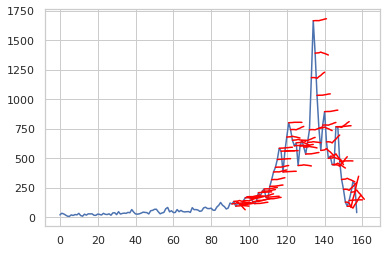

In [259]:

# load dataset
series = left_ts
# configure
n_lag = 14
n_seq = 7
n_test = 64
n_epochs = 125
n_batch = 1
n_neurons = 1
# prepare data
scaler, train, test = prepare_data(series, n_test, n_lag, n_seq)

start_time10 = time.time()
# fit model
model = fit_lstm(train, n_lag, n_seq, n_batch, n_epochs, n_neurons)
# make forecasts
forecasts = make_forecasts(model, n_batch, train, test, n_lag, n_seq)
# inverse transform forecasts and test
forecasts = inverse_transform(series, forecasts, scaler, n_test+2)
actual = [row[n_lag:] for row in test]
actual = inverse_transform(series, actual, scaler, n_test+2)
# evaluate forecasts
evaluate_forecasts(actual, forecasts, n_lag, n_seq)
# plot forecasts
plot_forecasts(series, forecasts, n_test+2)

In [260]:
# Multistep forecasting for centre data

73/73 - 1s - loss: 0.1283 - 1s/epoch - 15ms/step
73/73 - 0s - loss: 0.0742 - 82ms/epoch - 1ms/step
73/73 - 0s - loss: 0.0425 - 81ms/epoch - 1ms/step
73/73 - 0s - loss: 0.0238 - 81ms/epoch - 1ms/step
73/73 - 0s - loss: 0.0128 - 79ms/epoch - 1ms/step
73/73 - 0s - loss: 0.0062 - 79ms/epoch - 1ms/step
73/73 - 0s - loss: 0.0033 - 85ms/epoch - 1ms/step
73/73 - 0s - loss: 0.0027 - 77ms/epoch - 1ms/step
73/73 - 0s - loss: 0.0026 - 79ms/epoch - 1ms/step
73/73 - 0s - loss: 0.0026 - 78ms/epoch - 1ms/step
73/73 - 0s - loss: 0.0025 - 77ms/epoch - 1ms/step
73/73 - 0s - loss: 0.0025 - 81ms/epoch - 1ms/step
73/73 - 0s - loss: 0.0025 - 79ms/epoch - 1ms/step
73/73 - 0s - loss: 0.0024 - 78ms/epoch - 1ms/step
73/73 - 0s - loss: 0.0024 - 71ms/epoch - 966us/step
73/73 - 0s - loss: 0.0024 - 71ms/epoch - 969us/step
73/73 - 0s - loss: 0.0023 - 73ms/epoch - 1ms/step
73/73 - 0s - loss: 0.0023 - 72ms/epoch - 989us/step
73/73 - 0s - loss: 0.0023 - 75ms/epoch - 1ms/step
73/73 - 0s - loss: 0.0023 - 75ms/epoch - 1ms/

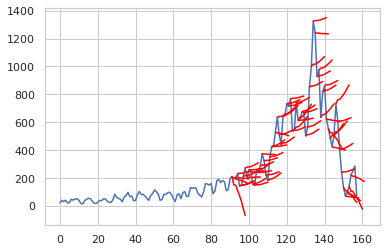

In [261]:

# load dataset
series = centre_ts
# configure
n_lag = 14
n_seq = 7
n_test = 64
n_epochs = 125
n_batch = 1
n_neurons = 1
# prepare data
scaler, train, test = prepare_data(series, n_test, n_lag, n_seq)

start_time10 = time.time()
# fit model
model = fit_lstm(train, n_lag, n_seq, n_batch, n_epochs, n_neurons)
# make forecasts
forecasts = make_forecasts(model, n_batch, train, test, n_lag, n_seq)
# inverse transform forecasts and test
forecasts = inverse_transform(series, forecasts, scaler, n_test+2)
actual = [row[n_lag:] for row in test]
actual = inverse_transform(series, actual, scaler, n_test+2)
# evaluate forecasts
evaluate_forecasts(actual, forecasts, n_lag, n_seq)
# plot forecasts
plot_forecasts(series, forecasts, n_test+2)

In [262]:
# Multistep timeseries forecasting for right tweets

60/60 - 1s - loss: 0.3387 - 1s/epoch - 18ms/step
60/60 - 0s - loss: 0.2625 - 72ms/epoch - 1ms/step
60/60 - 0s - loss: 0.1937 - 68ms/epoch - 1ms/step
60/60 - 0s - loss: 0.1358 - 66ms/epoch - 1ms/step
60/60 - 0s - loss: 0.0901 - 67ms/epoch - 1ms/step
60/60 - 0s - loss: 0.0557 - 66ms/epoch - 1ms/step
60/60 - 0s - loss: 0.0314 - 67ms/epoch - 1ms/step
60/60 - 0s - loss: 0.0154 - 66ms/epoch - 1ms/step
60/60 - 0s - loss: 0.0059 - 66ms/epoch - 1ms/step
60/60 - 0s - loss: 0.0015 - 65ms/epoch - 1ms/step
60/60 - 0s - loss: 4.1537e-04 - 65ms/epoch - 1ms/step
60/60 - 0s - loss: 3.6210e-04 - 66ms/epoch - 1ms/step
60/60 - 0s - loss: 3.5031e-04 - 67ms/epoch - 1ms/step
60/60 - 0s - loss: 3.3926e-04 - 66ms/epoch - 1ms/step
60/60 - 0s - loss: 3.2892e-04 - 66ms/epoch - 1ms/step
60/60 - 0s - loss: 3.1925e-04 - 65ms/epoch - 1ms/step
60/60 - 0s - loss: 3.1020e-04 - 66ms/epoch - 1ms/step
60/60 - 0s - loss: 3.0172e-04 - 64ms/epoch - 1ms/step
60/60 - 0s - loss: 2.9378e-04 - 64ms/epoch - 1ms/step
60/60 - 0s - lo

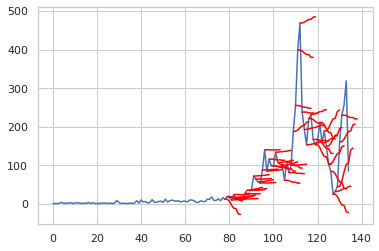

In [263]:

# load dataset
series = right_ts
# configure
n_lag = 14
n_seq = 7
n_test = 54
n_epochs = 150
n_batch = 1
n_neurons = 1
# prepare data
scaler, train, test = prepare_data(series, n_test, n_lag, n_seq)

start_time10 = time.time()
# fit model
model = fit_lstm(train, n_lag, n_seq, n_batch, n_epochs, n_neurons)
# make forecasts
forecasts = make_forecasts(model, n_batch, train, test, n_lag, n_seq)
# inverse transform forecasts and test
forecasts = inverse_transform(series, forecasts, scaler, n_test+2)
actual = [row[n_lag:] for row in test]
actual = inverse_transform(series, actual, scaler, n_test+2)
# evaluate forecasts
evaluate_forecasts(actual, forecasts, n_lag, n_seq)
# plot forecasts
plot_forecasts(series, forecasts, n_test+2)

In [264]:
# Multistep time series forecasting for right leaning tweets

66/66 - 1s - loss: 0.1628 - 1s/epoch - 17ms/step
66/66 - 0s - loss: 0.1063 - 80ms/epoch - 1ms/step
66/66 - 0s - loss: 0.0679 - 74ms/epoch - 1ms/step
66/66 - 0s - loss: 0.0379 - 72ms/epoch - 1ms/step
66/66 - 0s - loss: 0.0173 - 66ms/epoch - 997us/step
66/66 - 0s - loss: 0.0057 - 64ms/epoch - 977us/step
66/66 - 0s - loss: 0.0012 - 66ms/epoch - 1ms/step
66/66 - 0s - loss: 5.3117e-04 - 71ms/epoch - 1ms/step
66/66 - 0s - loss: 5.1747e-04 - 72ms/epoch - 1ms/step
66/66 - 0s - loss: 5.1754e-04 - 73ms/epoch - 1ms/step
66/66 - 0s - loss: 5.1743e-04 - 65ms/epoch - 981us/step
66/66 - 0s - loss: 5.1731e-04 - 71ms/epoch - 1ms/step
66/66 - 0s - loss: 5.1720e-04 - 77ms/epoch - 1ms/step
66/66 - 0s - loss: 5.1709e-04 - 71ms/epoch - 1ms/step
66/66 - 0s - loss: 5.1698e-04 - 78ms/epoch - 1ms/step
66/66 - 0s - loss: 5.1688e-04 - 75ms/epoch - 1ms/step
66/66 - 0s - loss: 5.1677e-04 - 75ms/epoch - 1ms/step
66/66 - 0s - loss: 5.1667e-04 - 74ms/epoch - 1ms/step
66/66 - 0s - loss: 5.1657e-04 - 68ms/epoch - 1ms/st

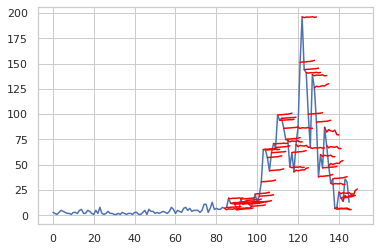

In [265]:

# load dataset
series = right_leaning_ts
# configure
n_lag = 14
n_seq = 7
n_test = 59
n_epochs = 100
n_batch = 1
n_neurons = 1
# prepare data
scaler, train, test = prepare_data(series, n_test, n_lag, n_seq)

start_time10 = time.time()
# fit model
model = fit_lstm(train, n_lag, n_seq, n_batch, n_epochs, n_neurons)
# make forecasts
forecasts = make_forecasts(model, n_batch, train, test, n_lag, n_seq)
# inverse transform forecasts and test
forecasts = inverse_transform(series, forecasts, scaler, n_test+2)
actual = [row[n_lag:] for row in test]
actual = inverse_transform(series, actual, scaler, n_test+2)
# evaluate forecasts
evaluate_forecasts(actual, forecasts, n_lag, n_seq)
# plot forecasts
plot_forecasts(series, forecasts, n_test+2)

In [266]:
# Multistep timeseries forecasting for left leaning

47/47 - 1s - loss: 0.3612 - 1s/epoch - 23ms/step
47/47 - 0s - loss: 0.2156 - 58ms/epoch - 1ms/step
47/47 - 0s - loss: 0.1434 - 54ms/epoch - 1ms/step
47/47 - 0s - loss: 0.1032 - 52ms/epoch - 1ms/step
47/47 - 0s - loss: 0.0745 - 51ms/epoch - 1ms/step
47/47 - 0s - loss: 0.0528 - 52ms/epoch - 1ms/step
47/47 - 0s - loss: 0.0360 - 53ms/epoch - 1ms/step
47/47 - 0s - loss: 0.0229 - 53ms/epoch - 1ms/step
47/47 - 0s - loss: 0.0130 - 52ms/epoch - 1ms/step
47/47 - 0s - loss: 0.0063 - 52ms/epoch - 1ms/step
47/47 - 0s - loss: 0.0027 - 51ms/epoch - 1ms/step
47/47 - 0s - loss: 0.0016 - 51ms/epoch - 1ms/step
47/47 - 0s - loss: 0.0015 - 52ms/epoch - 1ms/step
47/47 - 0s - loss: 0.0014 - 53ms/epoch - 1ms/step
47/47 - 0s - loss: 0.0013 - 53ms/epoch - 1ms/step
47/47 - 0s - loss: 0.0013 - 53ms/epoch - 1ms/step
47/47 - 0s - loss: 0.0012 - 54ms/epoch - 1ms/step
47/47 - 0s - loss: 0.0012 - 53ms/epoch - 1ms/step
47/47 - 0s - loss: 0.0011 - 52ms/epoch - 1ms/step
47/47 - 0s - loss: 0.0011 - 53ms/epoch - 1ms/step
4

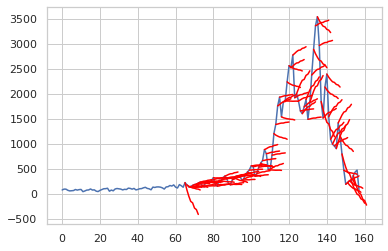

In [267]:

# load dataset
series = left_leaning_ts
# configure
n_lag = 14
n_seq = 7
n_test = 90
n_epochs = 150
n_batch = 1
n_neurons = 1
# prepare data
scaler, train, test = prepare_data(series, n_test, n_lag, n_seq)

start_time10 = time.time()
# fit model
model = fit_lstm(train, n_lag, n_seq, n_batch, n_epochs, n_neurons)
# make forecasts
forecasts = make_forecasts(model, n_batch, train, test, n_lag, n_seq)
# inverse transform forecasts and test
forecasts = inverse_transform(series, forecasts, scaler, n_test+2)
actual = [row[n_lag:] for row in test]
actual = inverse_transform(series, actual, scaler, n_test+2)
# evaluate forecasts
evaluate_forecasts(actual, forecasts, n_lag, n_seq)
# plot forecasts
plot_forecasts(series, forecasts, n_test+2)

In [268]:
# Gated reccurent time series forecasting

In [269]:
left_gru = left_filtered
centre_gru =centre_filtered
right_gru = right_filtered
left_leaning_gru = left_leaning_filtered
right_leaning_gru = right_leaning_filtered

In [270]:
train_size = int(len(left_gru)*0.6)

train_data = left_gru.iloc[:train_size]
test_data = left_gru.iloc[train_size:]

In [271]:
scaler = MinMaxScaler().fit(train_data)
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

In [272]:
def create_dataset (X, look_back = 1):
    Xs, ys = [], []
 
    for i in range(len(X)-look_back):
        v = X[i:i+look_back]
        Xs.append(v)
        ys.append(X[i+look_back])
 
    return np.array(Xs), np.array(ys)
LOOK_BACK = 14
X_train, y_train = create_dataset(train_scaled,LOOK_BACK)
X_test, y_test = create_dataset(test_scaled,LOOK_BACK)
# Print data shape
print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
print("X_test.shape: ", X_test.shape) 
print("y_test.shape: ", y_test.shape)

X_train.shape:  (80, 14, 1)
y_train.shape:  (80, 1)
X_test.shape:  (50, 14, 1)
y_test.shape:  (50, 1)


In [273]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

In [274]:
# Create GRU model
def create_gru(units):
    model = Sequential()
    # Input layer
    model.add(GRU (units = units, return_sequences = True, 
    input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2)) 
    # Hidden layer
    model.add(GRU(units = units)) 
    model.add(Dropout(0.2))
    model.add(Dense(units = 1)) 
    #Compile model
    model.compile(optimizer="adam",loss="mse")
    return model
model_gru = create_gru(64)

In [275]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = "val_loss",
                                               patience = 10)
    history = model.fit(X_train, y_train, epochs = 100,  
                        validation_split = 0.2,
                        batch_size = 16, shuffle = False, 
                        callbacks = [early_stop])
    return history
history_gru = fit_model(model_gru)

Epoch 1/100
4/4 [==============================] - 3s 193ms/step - loss: 0.0049 - val_loss: 0.1907
Epoch 2/100
4/4 [==============================] - 0s 17ms/step - loss: 0.0046 - val_loss: 0.1456
Epoch 3/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0043 - val_loss: 0.1530
Epoch 4/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0031 - val_loss: 0.1434
Epoch 5/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0024 - val_loss: 0.1111
Epoch 6/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0013 - val_loss: 0.0758
Epoch 7/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0017 - val_loss: 0.0557
Epoch 8/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0016 - val_loss: 0.0496
Epoch 9/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0015 - val_loss: 0.0439
Epoch 10/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0014 - val_loss: 0.0340
Epoch 11/100
4/4 [

In [276]:
y_test = scaler.inverse_transform(y_test)
y_train = scaler.inverse_transform(y_train)

3/3 [==============================] - 0s 4ms/step


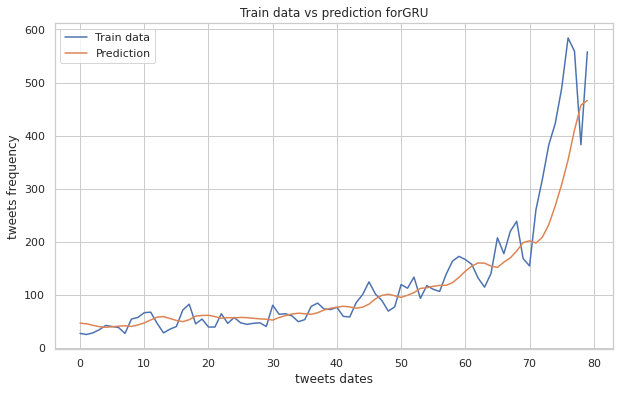

In [277]:
def prediction(model):
    prediction = model.predict(X_train)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)

# Plot test data vs prediction
def plot_future(prediction, model_name, y_train):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_train), 
             label="Train data")
    plt.plot(np.arange(range_future), 
             np.array(prediction),label="Prediction")
    plt.title("Train data vs prediction for" + model_name)
    plt.legend(loc="upper left")
    plt.xlabel("tweets dates")
    plt.ylabel("tweets frequency")
 
plot_future(prediction_gru, "GRU", y_train)

In [278]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ":")
    print("Mean Absolute Error: {:.4f}".format(mae))
    print("Root Mean Square Error: {:.4f}".format(rmse))
    print("")
evaluate_prediction(prediction_gru, y_train, "GRU")

GRU:
Mean Absolute Error: 30.8766
Root Mean Square Error: 52.2945



2/2 [==============================] - 0s 3ms/step


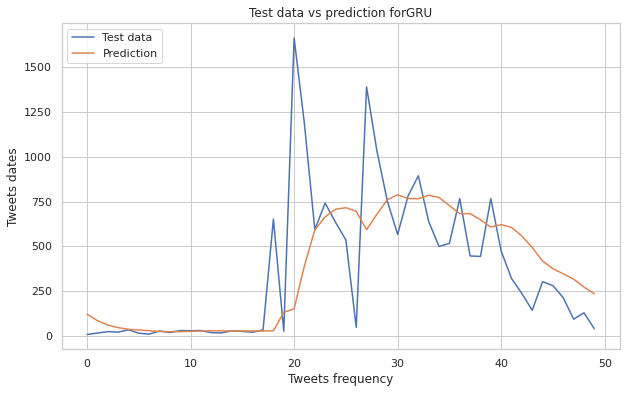

In [279]:
# Make prediction
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)
#prediction_bilstm = prediction(model_bilstm)
# Plot test data vs prediction
def plot_future(prediction, model_name, y_test):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), 
             label= "Test data")
    plt.plot(np.arange(range_future), 
             np.array(prediction),label="Prediction")
    plt.title("Test data vs prediction for" + model_name)
    plt.legend(loc="upper left")
    plt.xlabel("Tweets frequency")
    plt.ylabel("Tweets dates")
 
plot_future(prediction_gru, "GRU", y_test)

In [280]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ":")
    print("Mean Absolute Error: {:.4f}".format(mae))
    print("Root Mean Square Error: {:.4f}".format(rmse))
    print("")
evaluate_prediction(prediction_gru, y_test, "GRU")

GRU:
Mean Absolute Error: 184.0600
Root Mean Square Error: 327.8445



In [281]:
# Gru for right tweets

In [282]:
train_size = int(len(right_gru)*0.6)

train_data = left_gru.iloc[:train_size]
test_data = left_gru.iloc[train_size:]

In [283]:
scaler = MinMaxScaler().fit(train_data)
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

In [284]:
def create_dataset (X, look_back = 1):
    Xs, ys = [], []
 
    for i in range(len(X)-look_back):
        v = X[i:i+look_back]
        Xs.append(v)
        ys.append(X[i+look_back])
 
    return np.array(Xs), np.array(ys)
LOOK_BACK = 14
X_train, y_train = create_dataset(train_scaled,LOOK_BACK)
X_test, y_test = create_dataset(test_scaled,LOOK_BACK)
# Print data shape
print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
print("X_test.shape: ", X_test.shape) 
print("y_test.shape: ", y_test.shape)

X_train.shape:  (67, 14, 1)
y_train.shape:  (67, 1)
X_test.shape:  (63, 14, 1)
y_test.shape:  (63, 1)


In [285]:
# Create GRU model
def create_gru(units):
    model = Sequential()
    # Input layer
    model.add(GRU (units = units, return_sequences = True, 
    input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2)) 
    # Hidden layer
    model.add(GRU(units = units)) 
    model.add(Dropout(0.2))
    model.add(Dense(units = 1)) 
    #Compile model
    model.compile(optimizer="adam",loss="mse")
    return model
model_gru = create_gru(64)

In [286]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = "val_loss",
                                               patience = 10)
    history = model.fit(X_train, y_train, epochs = 100,  
                        validation_split = 0.2,
                        batch_size = 16, shuffle = False, 
                        callbacks = [early_stop])
    return history
history_gru = fit_model(model_gru)

Epoch 1/100
4/4 [==============================] - 3s 187ms/step - loss: 0.0483 - val_loss: 0.1736
Epoch 2/100
4/4 [==============================] - 0s 20ms/step - loss: 0.0096 - val_loss: 0.0380
Epoch 3/100
4/4 [==============================] - 0s 20ms/step - loss: 0.0231 - val_loss: 0.0266
Epoch 4/100
4/4 [==============================] - 0s 20ms/step - loss: 0.0218 - val_loss: 0.0433
Epoch 5/100
4/4 [==============================] - 0s 20ms/step - loss: 0.0143 - val_loss: 0.0709
Epoch 6/100
4/4 [==============================] - 0s 20ms/step - loss: 0.0129 - val_loss: 0.0724
Epoch 7/100
4/4 [==============================] - 0s 21ms/step - loss: 0.0103 - val_loss: 0.0516
Epoch 8/100
4/4 [==============================] - 0s 20ms/step - loss: 0.0097 - val_loss: 0.0327
Epoch 9/100
4/4 [==============================] - 0s 19ms/step - loss: 0.0098 - val_loss: 0.0253
Epoch 10/100
4/4 [==============================] - 0s 19ms/step - loss: 0.0109 - val_loss: 0.0245
Epoch 11/100
4/4 [

In [287]:
y_test = scaler.inverse_transform(y_test)
y_train = scaler.inverse_transform(y_train)

3/3 [==============================] - 0s 3ms/step


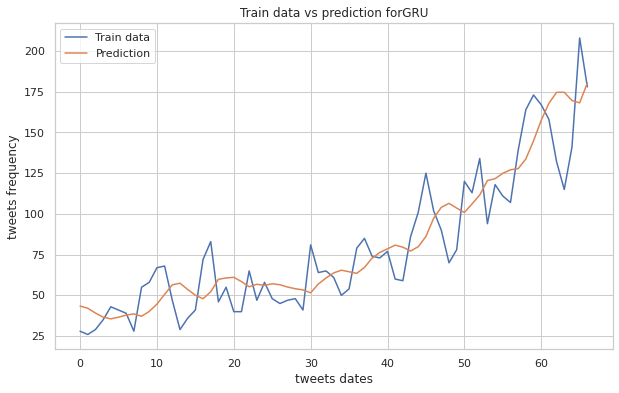

In [288]:
def prediction(model):
    prediction = model.predict(X_train)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)

# Plot test data vs prediction
def plot_future(prediction, model_name, y_train):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_train), 
             label="Train data")
    plt.plot(np.arange(range_future), 
             np.array(prediction),label="Prediction")
    plt.title("Train data vs prediction for" + model_name)
    plt.legend(loc="upper left")
    plt.xlabel("tweets dates")
    plt.ylabel("tweets frequency")
 
plot_future(prediction_gru, "GRU", y_train)

In [289]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ":")
    print("Mean Absolute Error: {:.4f}".format(mae))
    print("Root Mean Square Error: {:.4f}".format(rmse))
    print("")
evaluate_prediction(prediction_gru, y_train, "GRU")

GRU:
Mean Absolute Error: 15.8786
Root Mean Square Error: 19.5927



2/2 [==============================] - 0s 4ms/step


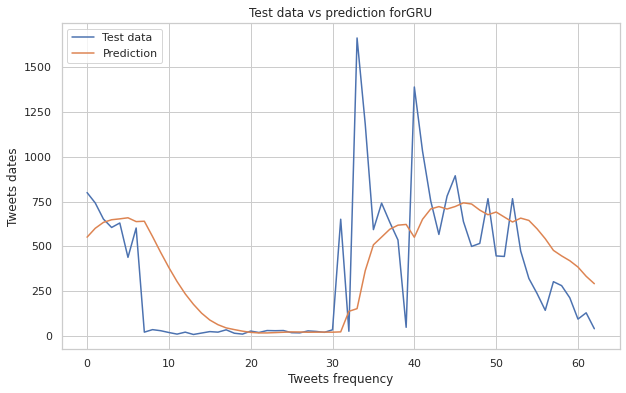

In [290]:
# Make prediction
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)
#prediction_bilstm = prediction(model_bilstm)
# Plot test data vs prediction
def plot_future(prediction, model_name, y_test):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), 
             label= "Test data")
    plt.plot(np.arange(range_future), 
             np.array(prediction),label="Prediction")
    plt.title("Test data vs prediction for" + model_name)
    plt.legend(loc="upper left")
    plt.xlabel("Tweets frequency")
    plt.ylabel("Tweets dates")
 
plot_future(prediction_gru, "GRU", y_test)

In [291]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ":")
    print("Mean Absolute Error: {:.4f}".format(mae))
    print("Root Mean Square Error: {:.4f}".format(rmse))
    print("")
evaluate_prediction(prediction_gru, y_test, "GRU")

GRU:
Mean Absolute Error: 209.2168
Root Mean Square Error: 331.1812



In [292]:
# gru for centre tweets

In [293]:
train_size = int(len(centre_gru)*0.8)

train_data = centre_gru.iloc[:train_size]
test_data = centre_gru.iloc[train_size:]

In [294]:
scaler = MinMaxScaler().fit(train_data)
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

In [295]:
def create_dataset (X, look_back = 1):
    Xs, ys = [], []
 
    for i in range(len(X)-look_back):
        v = X[i:i+look_back]
        Xs.append(v)
        ys.append(X[i+look_back])
 
    return np.array(Xs), np.array(ys)
LOOK_BACK = 14
X_train, y_train = create_dataset(train_scaled,LOOK_BACK)
X_test, y_test = create_dataset(test_scaled,LOOK_BACK)
# Print data shape
print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
print("X_test.shape: ", X_test.shape) 
print("y_test.shape: ", y_test.shape)

X_train.shape:  (112, 14, 1)
y_train.shape:  (112, 1)
X_test.shape:  (18, 14, 1)
y_test.shape:  (18, 1)


In [296]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = "val_loss",
                                               patience = 10)
    history = model.fit(X_train, y_train, epochs = 100,  
                        validation_split = 0.2,
                        batch_size = 16, shuffle = False, 
                        callbacks = [early_stop])
    return history
history_gru = fit_model(model_gru)

Epoch 1/100
6/6 [==============================] - 0s 23ms/step - loss: 0.0093 - val_loss: 0.1092
Epoch 2/100
6/6 [==============================] - 0s 16ms/step - loss: 0.0144 - val_loss: 0.0764
Epoch 3/100
6/6 [==============================] - 0s 17ms/step - loss: 0.0115 - val_loss: 0.1109
Epoch 4/100
6/6 [==============================] - 0s 17ms/step - loss: 0.0117 - val_loss: 0.0749
Epoch 5/100
6/6 [==============================] - 0s 17ms/step - loss: 0.0081 - val_loss: 0.1094
Epoch 6/100
6/6 [==============================] - 0s 17ms/step - loss: 0.0089 - val_loss: 0.1047
Epoch 7/100
6/6 [==============================] - 0s 17ms/step - loss: 0.0097 - val_loss: 0.0722
Epoch 8/100
6/6 [==============================] - 0s 16ms/step - loss: 0.0078 - val_loss: 0.0902
Epoch 9/100
6/6 [==============================] - 0s 17ms/step - loss: 0.0079 - val_loss: 0.0872
Epoch 10/100
6/6 [==============================] - 0s 17ms/step - loss: 0.0076 - val_loss: 0.0891
Epoch 11/100
6/6 [=

In [297]:
y_test = scaler.inverse_transform(y_test)
y_train = scaler.inverse_transform(y_train)

4/4 [==============================] - 0s 3ms/step


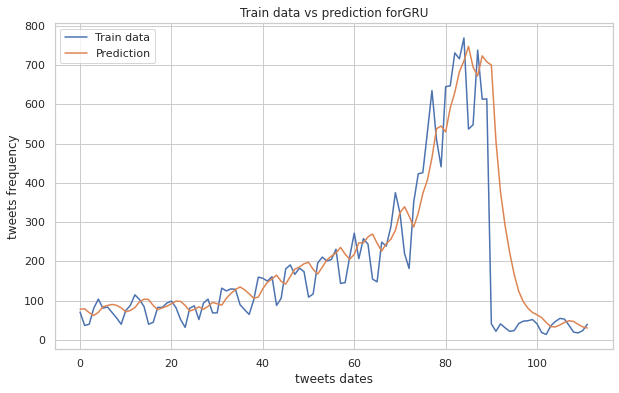

In [298]:
def prediction(model):
    prediction = model.predict(X_train)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)

# Plot test data vs prediction
def plot_future(prediction, model_name, y_train):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_train), 
             label="Train data")
    plt.plot(np.arange(range_future), 
             np.array(prediction),label="Prediction")
    plt.title("Train data vs prediction for" + model_name)
    plt.legend(loc="upper left")
    plt.xlabel("tweets dates")
    plt.ylabel("tweets frequency")
 
plot_future(prediction_gru, "GRU", y_train)

In [299]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ":")
    print("Mean Absolute Error: {:.4f}".format(mae))
    print("Root Mean Square Error: {:.4f}".format(rmse))
    print("")
evaluate_prediction(prediction_gru, y_train, "GRU")

GRU:
Mean Absolute Error: 57.8184
Root Mean Square Error: 106.3338



1/1 [==============================] - 0s 22ms/step


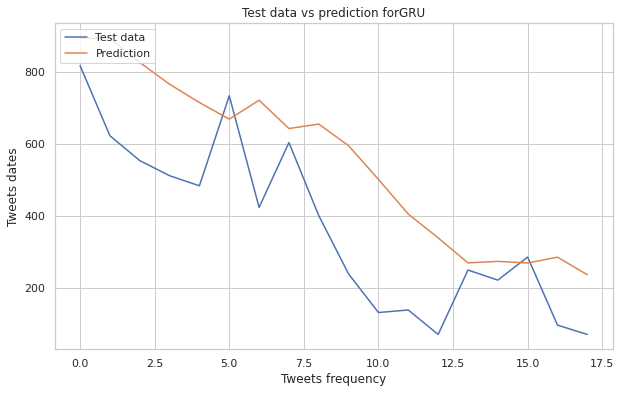

In [300]:
# Make prediction
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)
#prediction_bilstm = prediction(model_bilstm)
# Plot test data vs prediction
def plot_future(prediction, model_name, y_test):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), 
             label= "Test data")
    plt.plot(np.arange(range_future), 
             np.array(prediction),label="Prediction")
    plt.title("Test data vs prediction for" + model_name)
    plt.legend(loc="upper left")
    plt.xlabel("Tweets frequency")
    plt.ylabel("Tweets dates")
 
plot_future(prediction_gru, "GRU", y_test)

In [301]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ":")
    print("Mean Absolute Error: {:.4f}".format(mae))
    print("Root Mean Square Error: {:.4f}".format(rmse))
    print("")
evaluate_prediction(prediction_gru, y_test, "GRU")

GRU:
Mean Absolute Error: 192.4944
Root Mean Square Error: 224.0652



In [302]:
# GRU for right leaning tweets

In [303]:
train_size = int(len(right_leaning_gru)*0.7)

train_data = right_leaning_gru.iloc[:train_size]
test_data = right_leaning_gru.iloc[train_size:]

In [304]:
scaler = MinMaxScaler().fit(train_data)
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

In [305]:
def create_dataset (X, look_back = 1):
    Xs, ys = [], []
 
    for i in range(len(X)-look_back):
        v = X[i:i+look_back]
        Xs.append(v)
        ys.append(X[i+look_back])
 
    return np.array(Xs), np.array(ys)
LOOK_BACK = 14
X_train, y_train = create_dataset(train_scaled,LOOK_BACK)
X_test, y_test = create_dataset(test_scaled,LOOK_BACK)
# Print data shape
print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
print("X_test.shape: ", X_test.shape) 
print("y_test.shape: ", y_test.shape)

X_train.shape:  (88, 14, 1)
y_train.shape:  (88, 1)
X_test.shape:  (30, 14, 1)
y_test.shape:  (30, 1)


In [306]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = "val_loss",
                                               patience = 10)
    history = model.fit(X_train, y_train, epochs = 100,  
                        validation_split = 0.2,
                        batch_size = 16, shuffle = False, 
                        callbacks = [early_stop])
    return history
history_gru = fit_model(model_gru)

Epoch 1/100
5/5 [==============================] - 0s 24ms/step - loss: 0.0471 - val_loss: 0.0659
Epoch 2/100
5/5 [==============================] - 0s 18ms/step - loss: 0.0415 - val_loss: 0.0643
Epoch 3/100
5/5 [==============================] - 0s 18ms/step - loss: 0.0393 - val_loss: 0.0593
Epoch 4/100
5/5 [==============================] - 0s 18ms/step - loss: 0.0389 - val_loss: 0.0575
Epoch 5/100
5/5 [==============================] - 0s 18ms/step - loss: 0.0379 - val_loss: 0.0563
Epoch 6/100
5/5 [==============================] - 0s 20ms/step - loss: 0.0391 - val_loss: 0.0558
Epoch 7/100
5/5 [==============================] - 0s 18ms/step - loss: 0.0400 - val_loss: 0.0556
Epoch 8/100
5/5 [==============================] - 0s 18ms/step - loss: 0.0394 - val_loss: 0.0555
Epoch 9/100
5/5 [==============================] - 0s 18ms/step - loss: 0.0377 - val_loss: 0.0556
Epoch 10/100
5/5 [==============================] - 0s 17ms/step - loss: 0.0382 - val_loss: 0.0557
Epoch 11/100
5/5 [=

In [307]:
y_test = scaler.inverse_transform(y_test)
y_train = scaler.inverse_transform(y_train)

3/3 [==============================] - 0s 3ms/step


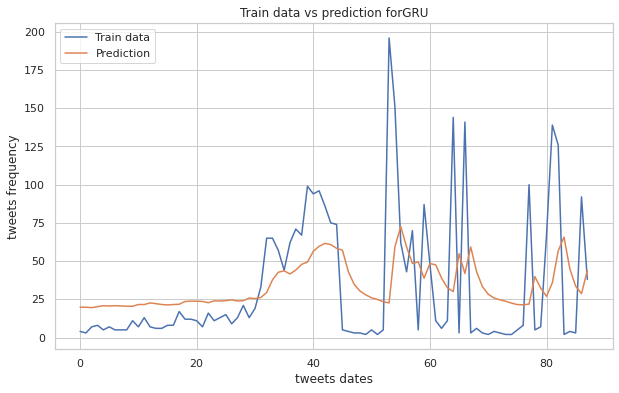

In [308]:
def prediction(model):
    prediction = model.predict(X_train)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)

# Plot test data vs prediction
def plot_future(prediction, model_name, y_train):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_train), 
             label="Train data")
    plt.plot(np.arange(range_future), 
             np.array(prediction),label="Prediction")
    plt.title("Train data vs prediction for" + model_name)
    plt.legend(loc="upper left")
    plt.xlabel("tweets dates")
    plt.ylabel("tweets frequency")
 
plot_future(prediction_gru, "GRU", y_train)

In [309]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ":")
    print("Mean Absolute Error: {:.4f}".format(mae))
    print("Root Mean Square Error: {:.4f}".format(rmse))
    print("")
evaluate_prediction(prediction_gru, y_train, "GRU")

GRU:
Mean Absolute Error: 28.8388
Root Mean Square Error: 39.7932



1/1 [==============================] - 0s 22ms/step


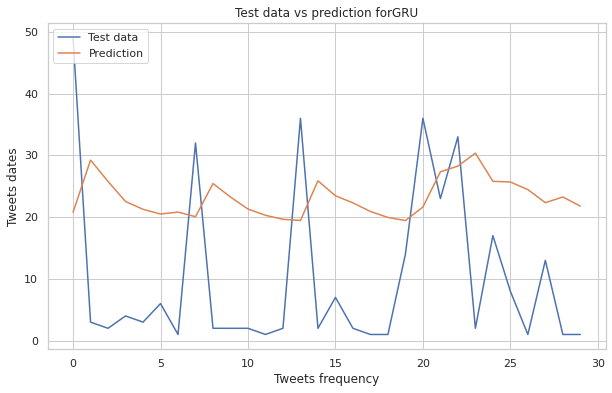

In [310]:
# Make prediction
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)
#prediction_bilstm = prediction(model_bilstm)
# Plot test data vs prediction
def plot_future(prediction, model_name, y_test):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), 
             label= "Test data")
    plt.plot(np.arange(range_future), 
             np.array(prediction),label="Prediction")
    plt.title("Test data vs prediction for" + model_name)
    plt.legend(loc="upper left")
    plt.xlabel("Tweets frequency")
    plt.ylabel("Tweets dates")
 
plot_future(prediction_gru, "GRU", y_test)

In [311]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ":")
    print("Mean Absolute Error: {:.4f}".format(mae))
    print("Root Mean Square Error: {:.4f}".format(rmse))
    print("")
evaluate_prediction(prediction_gru, y_test, "GRU")

GRU:
Mean Absolute Error: 17.9248
Root Mean Square Error: 19.0137



In [312]:
# Gru for left leaning tweets

In [313]:
train_size = int(len(left_leaning_gru)*0.75)

train_data = left_leaning_gru.iloc[:train_size]
test_data = left_leaning_gru.iloc[train_size:]

In [314]:
scaler = MinMaxScaler().fit(train_data)
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

In [315]:
def create_dataset (X, look_back = 1):
    Xs, ys = [], []
 
    for i in range(len(X)-look_back):
        v = X[i:i+look_back]
        Xs.append(v)
        ys.append(X[i+look_back])
 
    return np.array(Xs), np.array(ys)
LOOK_BACK = 14
X_train, y_train = create_dataset(train_scaled,LOOK_BACK)
X_test, y_test = create_dataset(test_scaled,LOOK_BACK)
# Print data shape
print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
print("X_test.shape: ", X_test.shape) 
print("y_test.shape: ", y_test.shape)

X_train.shape:  (104, 14, 1)
y_train.shape:  (104, 1)
X_test.shape:  (26, 14, 1)
y_test.shape:  (26, 1)


In [316]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = "val_loss",
                                               patience = 10)
    history = model.fit(X_train, y_train, epochs = 100,  
                        validation_split = 0.2,
                        batch_size = 16, shuffle = False, 
                        callbacks = [early_stop])
    return history
history_gru = fit_model(model_gru)

Epoch 1/100
6/6 [==============================] - 0s 21ms/step - loss: 0.0154 - val_loss: 0.0479
Epoch 2/100
6/6 [==============================] - 0s 16ms/step - loss: 0.0120 - val_loss: 0.0753
Epoch 3/100
6/6 [==============================] - 0s 15ms/step - loss: 0.0074 - val_loss: 0.1355
Epoch 4/100
6/6 [==============================] - 0s 16ms/step - loss: 0.0047 - val_loss: 0.2082
Epoch 5/100
6/6 [==============================] - 0s 17ms/step - loss: 0.0045 - val_loss: 0.1584
Epoch 6/100
6/6 [==============================] - 0s 16ms/step - loss: 0.0036 - val_loss: 0.0690
Epoch 7/100
6/6 [==============================] - 0s 16ms/step - loss: 0.0025 - val_loss: 0.0698
Epoch 8/100
6/6 [==============================] - 0s 17ms/step - loss: 0.0046 - val_loss: 0.0772
Epoch 9/100
6/6 [==============================] - 0s 16ms/step - loss: 0.0044 - val_loss: 0.0768
Epoch 10/100
6/6 [==============================] - 0s 16ms/step - loss: 0.0034 - val_loss: 0.1316
Epoch 11/100
6/6 [=

In [317]:
y_test = scaler.inverse_transform(y_test)
y_train = scaler.inverse_transform(y_train)

4/4 [==============================] - 0s 3ms/step


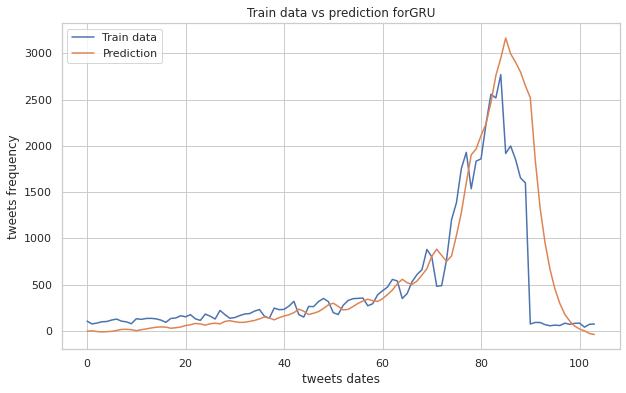

In [318]:
def prediction(model):
    prediction = model.predict(X_train)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)

# Plot test data vs prediction
def plot_future(prediction, model_name, y_train):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_train), 
             label="Train data")
    plt.plot(np.arange(range_future), 
             np.array(prediction),label="Prediction")
    plt.title("Train data vs prediction for" + model_name)
    plt.legend(loc="upper left")
    plt.xlabel("tweets dates")
    plt.ylabel("tweets frequency")
 
plot_future(prediction_gru, "GRU", y_train)

In [319]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ":")
    print("Mean Absolute Error: {:.4f}".format(mae))
    print("Root Mean Square Error: {:.4f}".format(rmse))
    print("")
evaluate_prediction(prediction_gru, y_train, "GRU")

GRU:
Mean Absolute Error: 221.9105
Root Mean Square Error: 437.0019



1/1 [==============================] - 0s 22ms/step


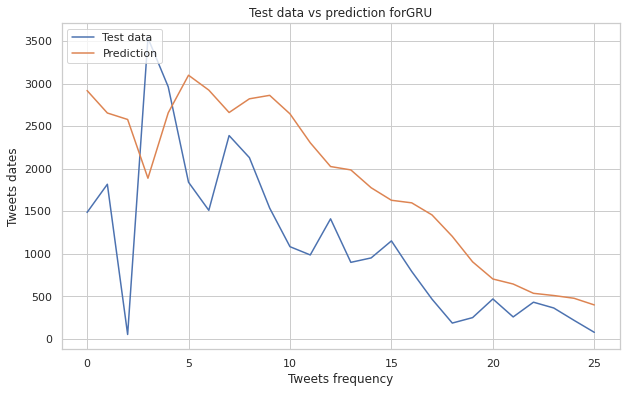

In [320]:
# Make prediction
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)
#prediction_bilstm = prediction(model_bilstm)
# Plot test data vs prediction
def plot_future(prediction, model_name, y_test):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), 
             label= "Test data")
    plt.plot(np.arange(range_future), 
             np.array(prediction),label="Prediction")
    plt.title("Test data vs prediction for" + model_name)
    plt.legend(loc="upper left")
    plt.xlabel("Tweets frequency")
    plt.ylabel("Tweets dates")
 
plot_future(prediction_gru, "GRU", y_test)

In [321]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ":")
    print("Mean Absolute Error: {:.4f}".format(mae))
    print("Root Mean Square Error: {:.4f}".format(rmse))
    print("")
evaluate_prediction(prediction_gru, y_test, "GRU")

GRU:
Mean Absolute Error: 865.2646
Root Mean Square Error: 1036.5504



In [100]:
df_required['likes_count']=df['favorite_count']

/tmp/ipykernel_859667/858843909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_required['likes_count']=df['favorite_count']


In [101]:
x1=df_required[["created_at","expanded_urls","likes_count"]].to_numpy()

In [102]:
left_timestamps1=[]
right_timestamps1=[]
centre_timestamps1=[]
left_leaning_timestamps1 =[]
right_leaning_timestamps1 =[]
left_likes=[]
right_likes=[]
centre_likes=[]
left_leaning_likes=[]
right_leaning_likes=[]


In [103]:
for y in x1:
    for sub  in left_suburls:
        if y[1] is not np.nan:
            if sub in str(y[1]):
                date_format = '%a %b %d %H:%M:%S %z %Y'
                date_object = datetime.strptime(y[0], date_format)
                left_timestamps1.append(date_object.date())
                left_likes.append(y[2])
                ##left_dislikes.append(y[3])
                #left_reposts.append(y[3])

In [104]:
df_left_timestamps1=pd.DataFrame()

In [105]:
df_left_timestamps1['timestamps']=pd.DataFrame(left_timestamps1)

In [106]:
df_left_timestamps1['likes']=left_likes

In [107]:
df_left_timestamps1.head()

timestamps  likes
0  2018-05-26      0
1  2018-05-26      0
2  2018-05-26      0
3  2018-05-27      1
4  2018-05-27      0

In [108]:
df_left_timestamps2=df_left_timestamps1.drop_duplicates(keep='first')

In [109]:
left_likes_frequency=dict(zip(df_left_timestamps2.timestamps, df_left_timestamps2.likes))

In [110]:
for i in range(4138,len(df_left_timestamps1)):
    left_likes_frequency[df_left_timestamps1.loc[i,"timestamps"]]+=df_left_timestamps1.loc[i,"likes"]

In [111]:
t1=[]
like=[]

In [112]:
for key in left_likes_frequency:
    t1.append(key)
    like.append(left_likes_frequency[key])

In [113]:
l3 = {'Date':t1,'likes_count':like}
left_likes_dataset=pd.DataFrame(l3)

In [114]:
left_likes_dataset.head()

Date  likes_count
0  2018-05-26           13
1  2018-05-27            1
2  2018-05-28           11
3  2018-05-29           31
4  2018-05-30          216

In [115]:
# getting right likes

In [116]:
for y in x1:
    for sub  in right_suburls:
        if y[1] is not np.nan:
            if sub in str(y[1]):
                date_format = '%a %b %d %H:%M:%S %z %Y'
                date_object = datetime.strptime(y[0], date_format)
                right_timestamps1.append(date_object.date())
                right_likes.append(y[2])
                ##left_dislikes.append(y[3])
                #left_reposts.append(y[3])

In [117]:
df_right_timestamps1=pd.DataFrame()

In [118]:
df_right_timestamps1['timestamps']=pd.DataFrame(right_timestamps1)

In [119]:
df_right_timestamps1['likes']=right_likes

In [120]:
df_right_timestamps1.head()

timestamps  likes
0  2018-06-11      0
1  2018-06-20      0
2  2018-06-20      0
3  2018-06-22      0
4  2018-07-03      0

In [121]:
df_right_timestamps2=df_right_timestamps1.drop_duplicates(keep='first')

In [122]:
right_likes_frequency=dict(zip(df_right_timestamps2.timestamps, df_right_timestamps2.likes))

In [123]:
for i in range(4138,len(df_right_timestamps1)):
    right_likes_frequency[df_right_timestamps1.loc[i,"timestamps"]]+=df_right_timestamps1.loc[i,"likes"]

In [124]:
t1=[]
like=[]

In [125]:
for key in right_likes_frequency:
    t1.append(key)
    like.append(right_likes_frequency[key])

In [126]:
l3 = {'Date':t1,'likes_count':like}
right_likes_dataset=pd.DataFrame(l3)

In [127]:
right_likes_dataset.head()

Date  likes_count
0  2018-06-11            1
1  2018-06-20            1
2  2018-06-22            6
3  2018-07-03            0
4  2018-07-04           30

In [128]:
# centre likes 

In [129]:
for y in x1:
    for sub  in centre_suburls:
        if y[1] is not np.nan:
            if sub in str(y[1]):
                date_format = '%a %b %d %H:%M:%S %z %Y'
                date_object = datetime.strptime(y[0], date_format)
                centre_timestamps1.append(date_object.date())
                centre_likes.append(y[2])
                ##left_dislikes.append(y[3])
                #left_reposts.append(y[3])
                
df_centre_timestamps1=pd.DataFrame()
df_centre_timestamps1['timestamps']=pd.DataFrame(centre_timestamps1)
df_centre_timestamps1['likes']=centre_likes
df_centre_timestamps1.head()
df_centre_timestamps2=df_centre_timestamps1.drop_duplicates(keep='first')
centre_likes_frequency=dict(zip(df_centre_timestamps2.timestamps, df_centre_timestamps2.likes))

for i in range(4138,len(df_centre_timestamps1)):
    centre_likes_frequency[df_centre_timestamps1.loc[i,"timestamps"]]+=df_centre_timestamps1.loc[i,"likes"]
    
t1=[]
like=[]

for key in centre_likes_frequency:
    t1.append(key)
    like.append(centre_likes_frequency[key])
    
l3 = {'Date':t1,'likes_count':like}
centre_likes_dataset=pd.DataFrame(l3)

centre_likes_dataset.head()
 

Date  likes_count
0  2018-05-26            7
1  2018-05-25           34
2  2018-05-27           24
3  2018-05-28           12
4  2018-05-30           12

In [130]:
# left leaning likes

In [131]:
for y in x1:
    for sub  in left_leaning_suburls:
        if y[1] is not np.nan:
            if sub in str(y[1]):
                date_format = '%a %b %d %H:%M:%S %z %Y'
                date_object = datetime.strptime(y[0], date_format)
                left_leaning_timestamps1.append(date_object.date())
                left_leaning_likes.append(y[2])
                ##left_dislikes.append(y[3])
                #left_reposts.append(y[3])
                
df_left_leaning_timestamps1=pd.DataFrame()
df_left_leaning_timestamps1['timestamps']=pd.DataFrame(left_leaning_timestamps1)
df_left_leaning_timestamps1['likes']=left_leaning_likes
df_left_leaning_timestamps1.head()
df_left_leaning_timestamps2=df_left_leaning_timestamps1.drop_duplicates(keep='first')
left_leaning_likes_frequency=dict(zip(df_left_leaning_timestamps2.timestamps, df_left_leaning_timestamps2.likes))

for i in range(4138,len(df_left_leaning_timestamps1)):
    left_leaning_likes_frequency[df_left_leaning_timestamps1.loc[i,"timestamps"]]+=df_left_leaning_timestamps1.loc[i,"likes"]
    
t1=[]
like=[]

for key in left_leaning_likes_frequency:
    t1.append(key)
    like.append(left_leaning_likes_frequency[key])
    
l3 = {'Date':t1,'likes_count':like}
left_leaning_likes_dataset=pd.DataFrame(l3)

left_leaning_likes_dataset.head()
 

Date  likes_count
0  2018-05-25           82
1  2018-05-26           20
2  2018-05-27           58
3  2018-05-28           16
4  2018-05-29           37

In [132]:
# right leaning likes

In [133]:
for y in x1:
    for sub  in right_leaning_suburls:
        if y[1] is not np.nan:
            if sub in str(y[1]):
                date_format = '%a %b %d %H:%M:%S %z %Y'
                date_object = datetime.strptime(y[0], date_format)
                right_leaning_timestamps1.append(date_object.date())
                right_leaning_likes.append(y[2])
                ##left_dislikes.append(y[3])
                #left_reposts.append(y[3])
                
df_right_leaning_timestamps1=pd.DataFrame()
df_right_leaning_timestamps1['timestamps']=pd.DataFrame(right_leaning_timestamps1)
df_right_leaning_timestamps1['likes']=right_leaning_likes
df_right_leaning_timestamps1.head()
df_right_leaning_timestamps2=df_right_leaning_timestamps1.drop_duplicates(keep='first')
right_leaning_likes_frequency=dict(zip(df_right_leaning_timestamps2.timestamps, df_right_leaning_timestamps2.likes))

for i in range(4138,len(df_right_leaning_timestamps1)):
    right_leaning_likes_frequency[df_right_leaning_timestamps1.loc[i,"timestamps"]]+=df_right_leaning_timestamps1.loc[i,"likes"]
    
t1=[]
like=[]

for key in right_leaning_likes_frequency:
    t1.append(key)
    like.append(right_leaning_likes_frequency[key])
    
l3 = {'Date':t1,'likes_count':like}
right_leaning_likes_dataset=pd.DataFrame(l3)

right_leaning_likes_dataset.head()
 

Date  likes_count
0  2018-05-26            0
1  2018-05-28            0
2  2018-05-29            0
3  2018-05-30            5
4  2018-06-03            0

In [134]:
#Multi line plot of likes count

In [135]:
left_likes_dataset['Date'] = pd.to_datetime(left_dataset['Date'], format='%Y-%m-%d')
left_likes_filtered=left_likes_dataset.loc[(left_likes_dataset['Date'] >= '2018-05-01') & (left_likes_dataset['Date'] <= '2018-12-31')]
right_likes_dataset['Date'] = pd.to_datetime(right_dataset['Date'], format='%Y-%m-%d')
right_likes_filtered=right_likes_dataset.loc[(right_likes_dataset['Date'] >= '2018-05-01') & (right_likes_dataset['Date'] <= '2018-12-31')]
centre_likes_dataset['Date'] = pd.to_datetime(centre_dataset['Date'], format='%Y-%m-%d')
centre_likes_filtered=centre_likes_dataset.loc[(centre_likes_dataset['Date'] >= '2018-05-01') & (centre_likes_dataset['Date'] <= '2018-12-31')]
left_leaning_likes_dataset['Date'] = pd.to_datetime(left_leaning_dataset['Date'], format='%Y-%m-%d')
left_leaning_likes_filtered= left_leaning_likes_dataset.loc[(left_leaning_likes_dataset['Date'] >= '2018-05-01') & (left_leaning_likes_dataset['Date'] <= '2018-12-31')]
right_leaning_likes_dataset['Date'] = pd.to_datetime(right_leaning_dataset['Date'], format='%Y-%m-%d')
right_leaning_likes_filtered= right_leaning_likes_dataset.loc[(right_leaning_likes_dataset['Date'] >= '2018-05-01') & (right_leaning_likes_dataset['Date'] <= '2018-12-31')]
                                                            




In [136]:
left_likes_filtered.columns

Index(['Date', 'likes_count'], dtype='object')

In [137]:
right_likes_filtered.columns

Index(['Date', 'likes_count'], dtype='object')

In [138]:

merged_likes_df = pd.merge(left_likes_filtered, right_likes_filtered, on='Date')
merged_likes_df = pd.merge(merged_likes_df, centre_likes_filtered, on='Date')
merged_likes_df = pd.merge(merged_likes_df, left_leaning_likes_filtered, on='Date')
merged_likes_df = pd.merge(merged_likes_df, right_leaning_likes_filtered, on='Date')


merged_likes_df.columns = ['Date', 'left_likes_frequency', 'right_likes_frequency', 'centre_likes_frequency', 'left_leaning_likes_frequency', 'right_leaning_likes_frequency']


merged_likes_df['Date'] = pd.to_datetime(merged_likes_df['Date'])


#merged_df.set_index('timestamp', inplace=True)

/tmp/ipykernel_859667/3205739213.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'likes_count_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_likes_df = pd.merge(merged_likes_df, left_leaning_likes_filtered, on='Date')


In [139]:
merged_likes_df

Date  left_likes_frequency  right_likes_frequency  \
0   2018-05-28                    11                      0   
1   2018-05-29                    31                     32   
2   2018-05-30                   216                      0   
3   2018-05-31                    27                      2   
4   2018-06-04                    22                      1   
..         ...                   ...                    ...   
122 2018-10-04                    68                     27   
123 2018-10-02                    45                     64   
124 2018-09-30                    17                      8   
125 2018-09-29                    72                      3   
126 2018-10-05                    10                      9   

     centre_likes_frequency  left_leaning_likes_frequency  \
0                        12                            16   
1                        20                            37   
2                        12                           104   
3                        20                            63   
4                        32                            22   
..                      ...                           ...   
122                      90                           155   
123                      61                          1385   
124                      55                           105   
125                      27                           312   
126                      32                            34   

     right_leaning_likes_frequency  
0                                0  
1                                0  
2                                5  
3                                5  
4                                0  
..                             ...  
122                              1  
123                              1  
124                              1  
125                              0  
126                              2  

[127 rows x 6 columns]

In [140]:
print(merged_likes_df['left_likes_frequency'].head())

0     11
1     31
2    216
3     27
4     22
Name: left_likes_frequency, dtype: int64


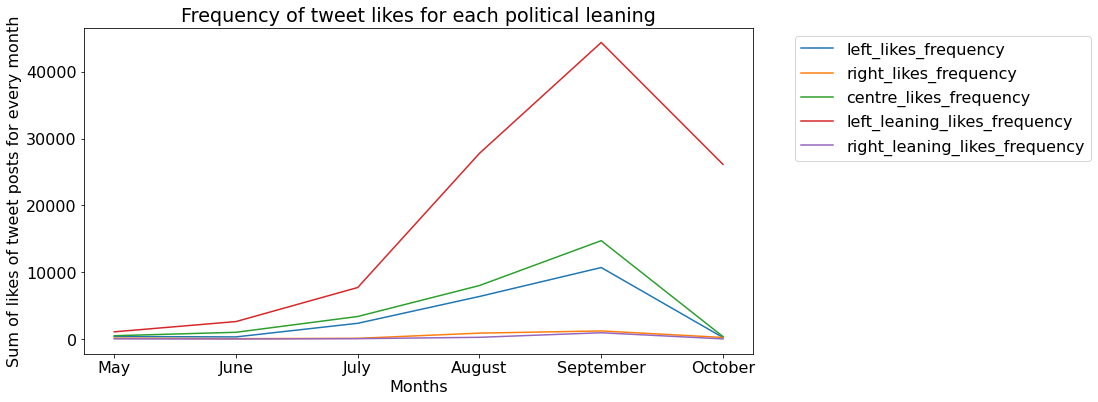

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar


merged_likes_df['month'] = merged_likes_df['Date'].dt.month
#merged_df['month'] = merged_df['month'].apply(lambda x: calendar.month_abbr[x])
#merged_df = merged_df.sort_values('month')

# Group the data by month and calculate the average frequency for each variable
monthly_freq = merged_likes_df.groupby('month').sum()

plt.figure(figsize=(12, 6))
plt.rcParams['font.size'] = '16'
# Create a line plot for each variable
variables = ['left_likes_frequency', 'right_likes_frequency', 'centre_likes_frequency', 'left_leaning_likes_frequency', 'right_leaning_likes_frequency']
for var in variables:
    plt.plot(monthly_freq.index, monthly_freq[var], label=var)
    

month_names = ["May","June","July","August","September","October"]
plt.xticks(monthly_freq.index, month_names)

#plt.ylim(0, 30000)
# Add labels and title
plt.xlabel('Months')
plt.ylabel('Sum of likes of tweet posts for every month')
plt.title('Frequency of tweet likes for each political leaning')

# Add a legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()


In [364]:
# preprocessing of likes

In [365]:
from datetime import datetime
con=left_likes_filtered['Date']
left_likes_filtered['Date']=pd.to_datetime(left_likes_filtered['Date'])
left_likes_filtered.set_index('Date', inplace=True)
#check datatype of index
left_likes_filtered.index                                 #converting object type of month to timestamp of dataframe of datatime64[ns]
left_likes_ts = left_likes_filtered['likes_count']
left_likes_ts.head(10)

/tmp/ipykernel_284759/1655456167.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_likes_filtered['Date']=pd.to_datetime(left_likes_filtered['Date'])


Date
2018-05-26     13
2018-05-27      1
2018-05-28     11
2018-05-29     31
2018-05-30    216
2018-05-31     27
2018-06-02     16
2018-06-03     19
2018-06-04     22
2018-06-05     19
Name: likes_count, dtype: int64

In [366]:
from datetime import datetime
con=right_likes_filtered['Date']
right_likes_filtered['Date']=pd.to_datetime(right_likes_filtered['Date'])
right_likes_filtered.set_index('Date', inplace=True)
#check datatype of index
right_likes_filtered.index                                 #converting object type of month to timestamp of dataframe of datatime64[ns]
right_likes_ts = right_likes_filtered['likes_count']
right_likes_ts.head(10)

/tmp/ipykernel_284759/690383085.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_likes_filtered['Date']=pd.to_datetime(right_likes_filtered['Date'])


Date
2018-06-11     1
2018-06-20     1
2018-06-22     6
2018-07-03     0
2018-07-04    30
2018-07-16     2
2018-07-17    44
2018-07-20     0
2018-07-22     1
2018-07-23     2
Name: likes_count, dtype: int64

In [367]:
from datetime import datetime
con=centre_likes_filtered['Date']
centre_likes_filtered['Date']=pd.to_datetime(centre_likes_filtered['Date'])
centre_likes_filtered.set_index('Date', inplace=True)
#check datatype of index
centre_likes_filtered.index                                 #converting object type of month to timestamp of dataframe of datatime64[ns]
centre_likes_ts = centre_likes_filtered['likes_count']
centre_likes_ts.head(10)

/tmp/ipykernel_284759/2169204939.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  centre_likes_filtered['Date']=pd.to_datetime(centre_likes_filtered['Date'])


Date
2018-05-26     7
2018-05-25    34
2018-05-27    24
2018-05-28    12
2018-05-30    12
2018-05-29    20
2018-05-31    20
2018-06-01    48
2018-06-02     9
2018-06-03    10
Name: likes_count, dtype: int64

In [368]:
from datetime import datetime
con=left_leaning_likes_filtered['Date']
left_leaning_likes_filtered['Date']=pd.to_datetime(left_leaning_likes_filtered['Date'])
left_leaning_likes_filtered.set_index('Date', inplace=True)
#check datatype of index
left_leaning_likes_filtered.index                                 #converting object type of month to timestamp of dataframe of datatime64[ns]
left_leaning_likes_ts = left_leaning_likes_filtered['likes_count']
left_leaning_likes_ts.head(10)

/tmp/ipykernel_284759/4082252558.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_leaning_likes_filtered['Date']=pd.to_datetime(left_leaning_likes_filtered['Date'])


Date
2018-05-25     82
2018-05-26     20
2018-05-27     58
2018-05-28     16
2018-05-29     37
2018-05-30    104
2018-05-31     63
2018-06-01     34
2018-06-02     33
2018-06-03     40
Name: likes_count, dtype: int64

In [369]:
from datetime import datetime
con=right_leaning_likes_filtered['Date']
right_leaning_likes_filtered['Date']=pd.to_datetime(right_leaning_likes_filtered['Date'])
right_leaning_likes_filtered.set_index('Date', inplace=True)
#check datatype of index
right_leaning_likes_filtered.index                                 #converting object type of month to timestamp of dataframe of datatime64[ns]
right_leaning_likes_ts = right_leaning_likes_filtered['likes_count']
right_leaning_likes_ts.head(10)

/tmp/ipykernel_284759/1492885592.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_leaning_likes_filtered['Date']=pd.to_datetime(right_leaning_likes_filtered['Date'])


Date
2018-05-26    0
2018-05-28    0
2018-05-29    0
2018-05-30    5
2018-06-03    0
2018-06-04    0
2018-06-08    0
2018-06-14    0
2018-06-17    0
2018-06-19    0
Name: likes_count, dtype: int64

In [370]:
# SARIMA MODEL PREDICTION OF LIKES

In [371]:
#left likes prediction

The series is NOT stationary


/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving averag

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46415D+00    |proj g|=  1.55743D-01

At iterate    5    f=  6.38940D+00    |proj g|=  2.44144D-02

At iterate   10    f=  6.38562D+00    |proj g|=  1.93763D-03

At iterate   15    f=  6.38452D+00    |proj g|=  1.19312D-02

At iterate   20    f=  6.38420D+00    |proj g|=  2.75463D-03

At iterate   25    f=  6.38312D+00    |proj g|=  9.19011D-03

At iterate   30    f=  6.38235D+00    |proj g|=  1.64198D-03

At iterate   35    f=  6.38198D+00    |proj g|=  3.84490D-02

At iterate   40    f=  6.38152D+00    |proj g|=  5.52780D-03

At iterate   45    f=  6.38082D+00    |proj g|=  8.10761D-03

At iterate   50    f=  6.38050D+00    |proj g|=  6.93284D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


the time of execution of Sarima for  for left twweets like in seconds is 34.633455753326416
RMSE OF SARIMA of LEFT Likes count: 216.4834


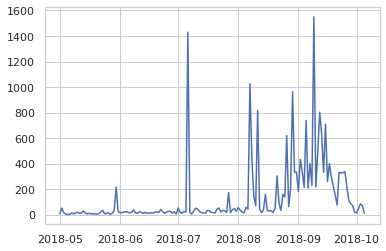

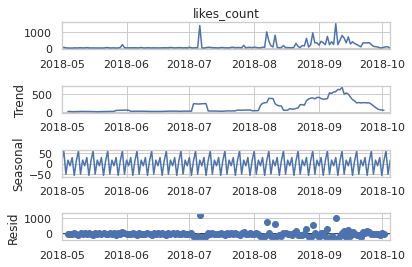

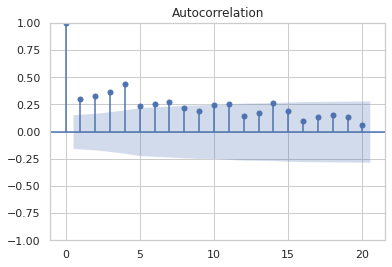

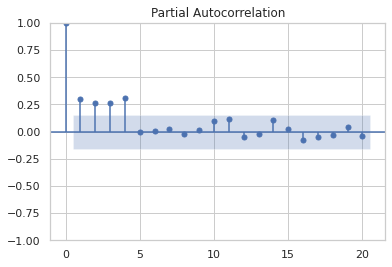

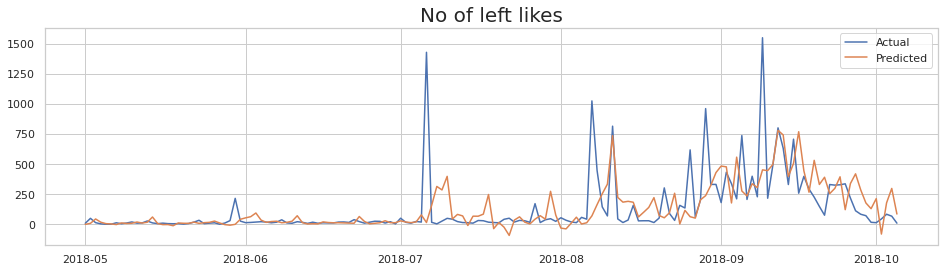

In [372]:
left_likes_ts=left_likes_ts.sort_index(ascending=True)
check_stationarity(left_likes_ts)
plt.plot(left_likes_ts)
result = seasonal_decompose(left_likes_ts,model='additive')      #applied seasonal decomposition to get trend and seasons.
fig = result.plot()
plot_acf(left_likes_ts, lags=20);
plot_pacf(left_likes_ts, lags=20);  #getting order of Auto regression (p) and getting number of forecast errors(q) to specify for the model.
                         #p is point where acf increased significantly, it can be any points but in our graph we get increasing trend at 0.

start_time13 = time.time()
sarima = SARIMAX(left_likes_ts, order=(11,1,3), seasonal_order=(3,1,3,12))
sarima_predictions = sarima.fit().predict()                            #Links to get SARIMAX parameters :- https://machinelearningmastery.com/how-to-grid-search-sarima-model-hyperparameters-for-time-series-forecasting-in-python/
                                                                       #https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/
    
print(f"the time of execution of Sarima for  for left twweets like in seconds is {time.time() - start_time13}")

plt.figure(figsize=(16,4))
plt.plot(left_likes_ts, label="Actual")
plt.plot(sarima_predictions, label="Predicted")
plt.title('No of left likes', fontsize=20)
#plt.ylabel('Sales', fontsize=16)
plt.legend()


print('RMSE OF SARIMA of LEFT Likes count: %.4f'%np.sqrt(sum((left_likes_ts-sarima_predictions)**2)/(len(left_likes_ts))))

The series is stationary


/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregres

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.25513D+00    |proj g|=  2.85672D-01


 This problem is unconstrained.



At iterate    5    f=  5.07652D+00    |proj g|=  3.36862D-02

At iterate   10    f=  5.06886D+00    |proj g|=  4.36175D-03

At iterate   15    f=  5.06399D+00    |proj g|=  2.63296D-02

At iterate   20    f=  5.05371D+00    |proj g|=  1.86100D-02

At iterate   25    f=  5.03818D+00    |proj g|=  2.10232D-02

At iterate   30    f=  5.02293D+00    |proj g|=  3.30913D-02

At iterate   35    f=  5.01137D+00    |proj g|=  2.26208D-02

At iterate   40    f=  5.00929D+00    |proj g|=  4.12389D-02

At iterate   45    f=  5.00904D+00    |proj g|=  4.80328D-03

At iterate   50    f=  5.00862D+00    |proj g|=  1.58345D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


the time of execution of Sarima for  for right twweets like in seconds is 26.65883708000183
RMSE OF SARIMA of right Likes count: 55.9530


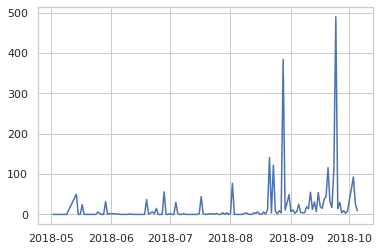

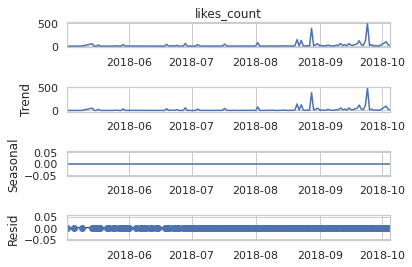

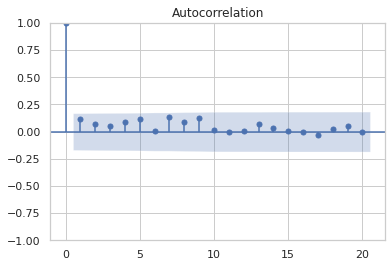

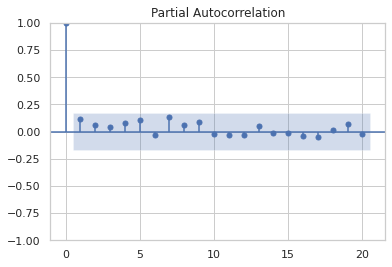

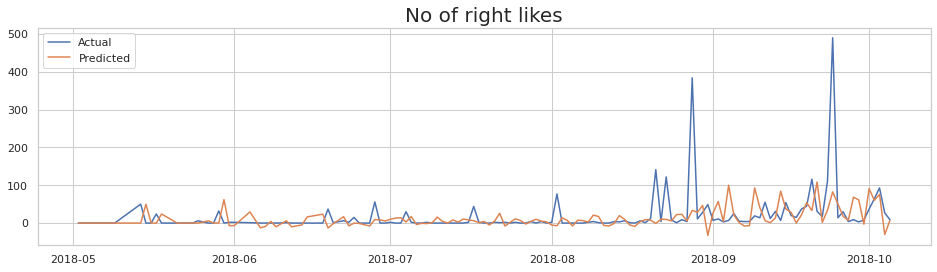

In [373]:
right_likes_ts= right_likes_ts.sort_index(ascending=True)
check_stationarity(right_likes_ts)
plt.plot(right_likes_ts)
result = seasonal_decompose(right_likes_ts,model='additive',extrapolate_trend='freq', period=1)      #applied seasonal decomposition to get trend and seasons.
fig = result.plot()
plot_acf(right_likes_ts, lags=20);
plot_pacf(right_likes_ts, lags=20);  #getting order of Auto regression (p) and getting number of forecast errors(q) to specify for the model.
                         #p is point where acf increased significantly, it can be any points but in our graph we get increasing trend at 0.

start_time13 = time.time()
sarima = SARIMAX(right_likes_ts, order=(11,1,3), seasonal_order=(3,1,3,12))
sarima_predictions = sarima.fit().predict()                            #Links to get SARIMAX parameters :- https://machinelearningmastery.com/how-to-grid-search-sarima-model-hyperparameters-for-time-series-forecasting-in-python/
                                                                       #https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/
    
print(f"the time of execution of Sarima for  for right twweets like in seconds is {time.time() - start_time13}")

plt.figure(figsize=(16,4))
plt.plot(right_likes_ts, label="Actual")
plt.plot(sarima_predictions, label="Predicted")
plt.title('No of right likes', fontsize=20)
#plt.ylabel('Sales', fontsize=16)
plt.legend()


print('RMSE OF SARIMA of right Likes count: %.4f'%np.sqrt(sum((right_likes_ts-sarima_predictions)**2)/(len(right_likes_ts))))

In [374]:
# centre likes forecasting

The series is NOT stationary


/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.61140D+00    |proj g|=  2.18876D-01


 This problem is unconstrained.



At iterate    5    f=  6.50028D+00    |proj g|=  3.79488D-02

At iterate   10    f=  6.49502D+00    |proj g|=  6.37320D-03

At iterate   15    f=  6.48955D+00    |proj g|=  1.97555D-02

At iterate   20    f=  6.48097D+00    |proj g|=  1.11289D-02

At iterate   25    f=  6.47955D+00    |proj g|=  4.44257D-03

At iterate   30    f=  6.47815D+00    |proj g|=  5.68707D-03

At iterate   35    f=  6.47789D+00    |proj g|=  2.46382D-03

At iterate   40    f=  6.47759D+00    |proj g|=  2.83477D-03

At iterate   45    f=  6.47748D+00    |proj g|=  1.94198D-03

At iterate   50    f=  6.47727D+00    |proj g|=  1.51563D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


the time of execution of Sarima for  for centre tweets like in seconds is 32.49379634857178
RMSE OF SARIMA of centre Likes count: 228.0207


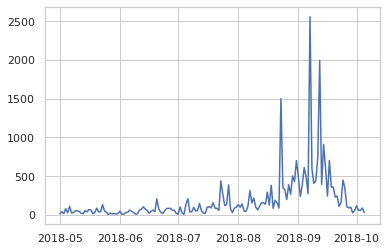

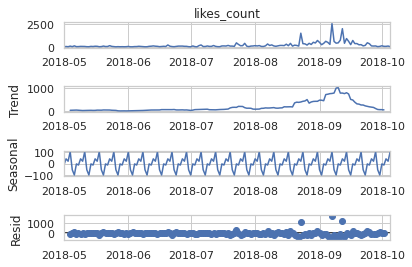

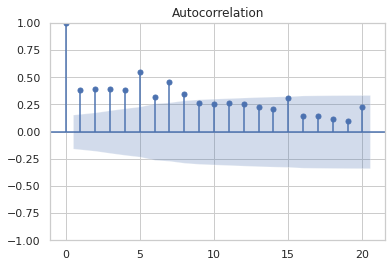

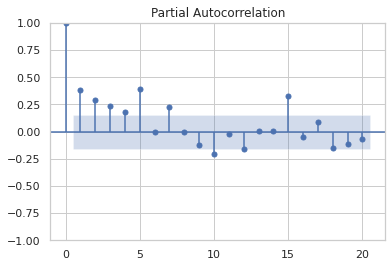

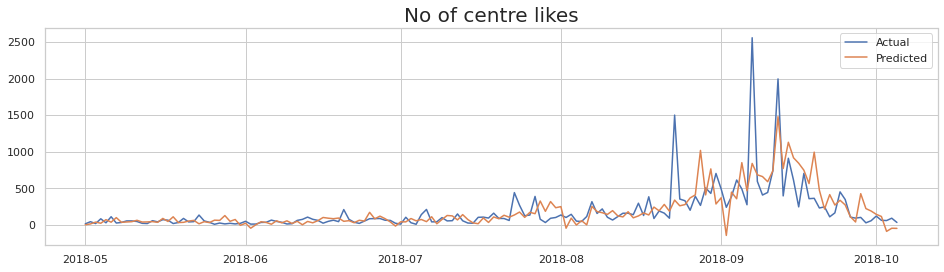

In [375]:
centre_likes_ts=centre_likes_ts.sort_index(ascending=True)
check_stationarity(centre_likes_ts)
plt.plot(centre_likes_ts)
result = seasonal_decompose(centre_likes_ts,model='additive')      #applied seasonal decomposition to get trend and seasons.
fig = result.plot()
plot_acf(centre_likes_ts, lags=20);
plot_pacf(centre_likes_ts, lags=20);  #getting order of Auto regression (p) and getting number of forecast errors(q) to specify for the model.
                         #p is point where acf increased significantly, it can be any points but in our graph we get increasing trend at 0.

start_time13 = time.time()
sarima = SARIMAX(centre_likes_ts, order=(11,1,3), seasonal_order=(3,1,3,12))
sarima_predictions = sarima.fit().predict()                            #Links to get SARIMAX parameters :- https://machinelearningmastery.com/how-to-grid-search-sarima-model-hyperparameters-for-time-series-forecasting-in-python/
                                                                       #https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/
    
print(f"the time of execution of Sarima for  for centre tweets like in seconds is {time.time() - start_time13}")

plt.figure(figsize=(16,4))
plt.plot(centre_likes_ts, label="Actual")
plt.plot(sarima_predictions, label="Predicted")
plt.title('No of centre likes', fontsize=20)
#plt.ylabel('Sales', fontsize=16)
plt.legend()


print('RMSE OF SARIMA of centre Likes count: %.4f'%np.sqrt(sum((centre_likes_ts-sarima_predictions)**2)/(len(centre_likes_ts))))

In [376]:
#left leaning tweets

The series is NOT stationary


/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.12218D+00    |proj g|=  1.24408D-01

At iterate    5    f=  8.07266D+00    |proj g|=  1.03674D-02

At iterate   10    f=  8.06732D+00    |proj g|=  7.17585D-03

At iterate   15    f=  8.06490D+00    |proj g|=  5.32359D-03

At iterate   20    f=  8.06220D+00    |proj g|=  3.09263D-02

At iterate   25    f=  8.05766D+00    |proj g|=  1.91245D-02

At iterate   30    f=  8.05117D+00    |proj g|=  2.31284D-02

At iterate   35    f=  8.04786D+00    |proj g|=  1.06033D-02

At iterate   40    f=  8.04710D+00    |proj g|=  8.53396D-03

At iterate   45    f=  8.04684D+00    |proj g|=  1.50754D-03

At iterate   50    f=  8.04676D+00    |proj g|=  2.00449D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


the time of execution of Sarima for  for left leaning like in seconds is 42.142993688583374
RMSE OF SARIMA of LEFT leaning Likes count: 1364.1686


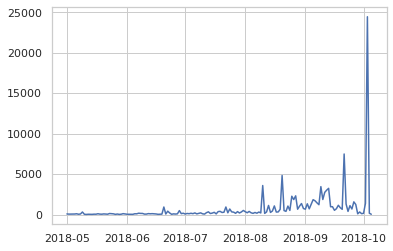

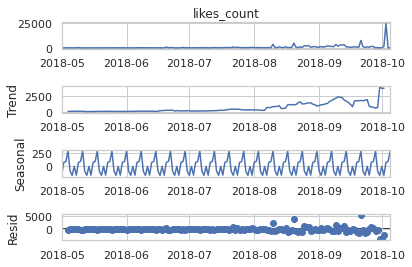

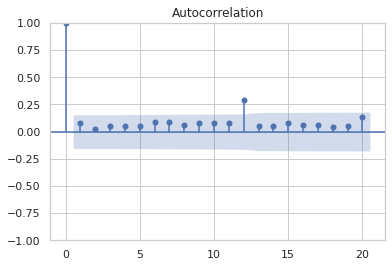

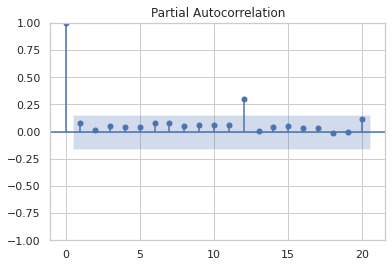

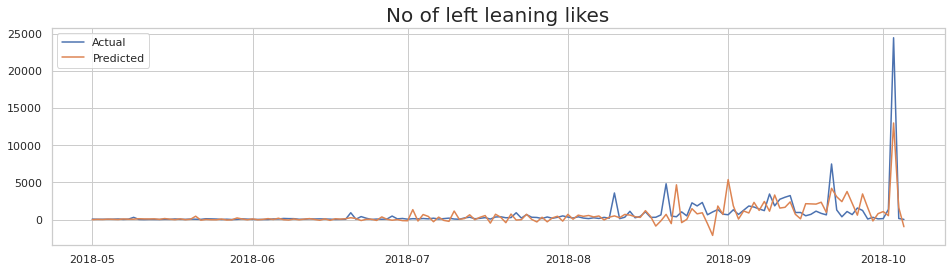

In [377]:
left_leaning_likes_ts=left_leaning_likes_ts.sort_index(ascending=True)
check_stationarity(left_leaning_likes_ts)
plt.plot(left_leaning_likes_ts)
result = seasonal_decompose(left_leaning_likes_ts,model='additive')      #applied seasonal decomposition to get trend and seasons.
fig = result.plot()
plot_acf(left_leaning_likes_ts, lags=20);
plot_pacf(left_leaning_likes_ts, lags=20);  #getting order of Auto regression (p) and getting number of forecast errors(q) to specify for the model.
                         #p is point where acf increased significantly, it can be any points but in our graph we get increasing trend at 0.

start_time13 = time.time()
sarima = SARIMAX(left_leaning_likes_ts, order=(11,1,3), seasonal_order=(3,1,3,12))
sarima_predictions = sarima.fit().predict()                            #Links to get SARIMAX parameters :- https://machinelearningmastery.com/how-to-grid-search-sarima-model-hyperparameters-for-time-series-forecasting-in-python/
                                                                       #https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/
    
print(f"the time of execution of Sarima for  for left leaning like in seconds is {time.time() - start_time13}")

plt.figure(figsize=(16,4))
plt.plot(left_leaning_likes_ts, label="Actual")
plt.plot(sarima_predictions, label="Predicted")
plt.title('No of left leaning likes', fontsize=20)
#plt.ylabel('Sales', fontsize=16)
plt.legend()


print('RMSE OF SARIMA of LEFT leaning Likes count: %.4f'%np.sqrt(sum((left_leaning_likes_ts-sarima_predictions)**2)/(len(left_leaning_likes_ts))))

The series is NOT stationary


/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving av

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.70328D+00    |proj g|=  4.17997D-01


 This problem is unconstrained.



At iterate    5    f=  4.41605D+00    |proj g|=  4.74222D-02

At iterate   10    f=  4.38516D+00    |proj g|=  2.19935D-02

At iterate   15    f=  4.37886D+00    |proj g|=  1.87623D-02

At iterate   20    f=  4.37129D+00    |proj g|=  2.02947D-02

At iterate   25    f=  4.36983D+00    |proj g|=  1.72336D-02

At iterate   30    f=  4.35726D+00    |proj g|=  5.22288D-02

At iterate   35    f=  4.35012D+00    |proj g|=  9.90432D-03

At iterate   40    f=  4.34832D+00    |proj g|=  1.79181D-02

At iterate   45    f=  4.34742D+00    |proj g|=  4.12184D-03


/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  4.34725D+00    |proj g|=  1.47548D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   21     50     55      1     0     0   1.475D-03   4.347D+00
  F =   4.3472495079268239     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
the time of execution of Sarima for  for right leaning like in seconds is 26.26371717453003
RMSE OF SARIMA of right leaning Likes count: 25.7640


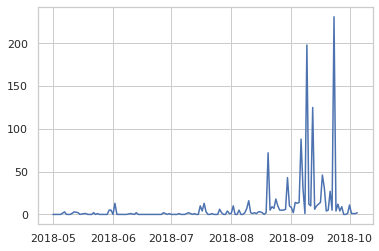

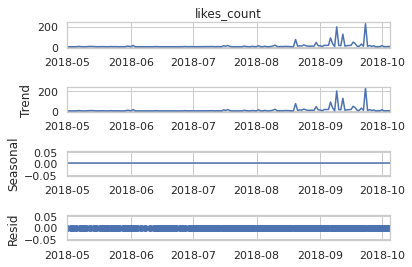

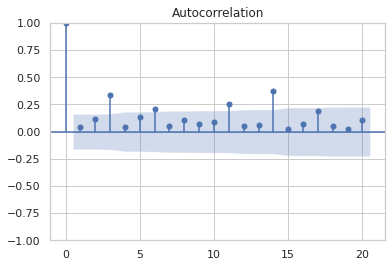

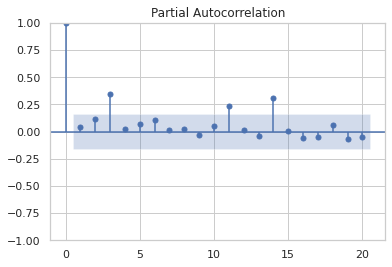

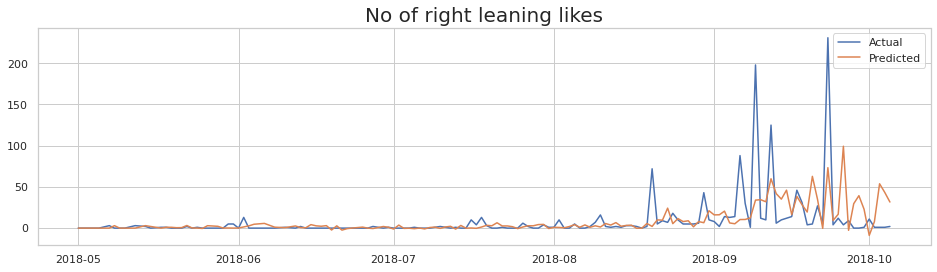

In [378]:
right_leaning_likes_ts=right_leaning_likes_ts.sort_index(ascending=True)
check_stationarity(right_leaning_likes_ts)
plt.plot(right_leaning_likes_ts)
result = seasonal_decompose(right_leaning_likes_ts,model='additive',extrapolate_trend='freq', period=1)      #applied seasonal decomposition to get trend and seasons.
fig = result.plot()
plot_acf(right_leaning_likes_ts, lags=20);
plot_pacf(right_leaning_likes_ts, lags=20);  #getting order of Auto regression (p) and getting number of forecast errors(q) to specify for the model.
                         #p is point where acf increased significantly, it can be any points but in our graph we get increasing trend at 0.

start_time13 = time.time()
sarima = SARIMAX(right_leaning_likes_ts, order=(11,1,3), seasonal_order=(3,1,3,12))
sarima_predictions = sarima.fit().predict()                            #Links to get SARIMAX parameters :- https://machinelearningmastery.com/how-to-grid-search-sarima-model-hyperparameters-for-time-series-forecasting-in-python/
                                                                       #https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/
    
print(f"the time of execution of Sarima for  for right leaning like in seconds is {time.time() - start_time13}")

plt.figure(figsize=(16,4))
plt.plot(right_leaning_likes_ts, label="Actual")
plt.plot(sarima_predictions, label="Predicted")
plt.title('No of right leaning likes', fontsize=20)
#plt.ylabel('Sales', fontsize=16)
plt.legend()


print('RMSE OF SARIMA of right leaning Likes count: %.4f'%np.sqrt(sum((right_leaning_likes_ts-sarima_predictions)**2)/(len(right_leaning_likes_ts))))

In [379]:
# LSTM 1 DAY FORECASTING of likes

In [380]:
#left likes prediction

In [381]:
dataset=left_likes_ts

In [382]:
print(left_likes_ts)

Date
2018-05-01     9
2018-05-02    50
2018-05-03    14
2018-05-04     4
2018-05-05     1
              ..
2018-10-01    14
2018-10-02    45
2018-10-03    84
2018-10-04    68
2018-10-05    10
Name: likes_count, Length: 158, dtype: int64


In [383]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.values.reshape(-1,1))
train_size = int(len(dataset) * 0.7)   #splitting the dataset into 67 and 33 percent.
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

110 48


In [384]:
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):   #The function takes two arguments: the dataset, which is a NumPy array that we want to convert into a dataset, 
  #and the look_back, which is the number of previous time steps to use as input variables to predict the next time period — in this case defaulted to 1.
#This default will create a dataset where X is the number of passengers at a given time (t) and Y is the number of passengers at the next time (t + 1).
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [385]:
look_back = 1
trainX, trainY = create_dataset(train, look_back) #converting as above mentioned function for training and testing.
testX, testY = create_dataset(test, look_back)
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))     

In [386]:
start_time4 = time.time()
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back))) #4 are the hidden LSTM blocks and 1 input layer as visible.
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
#K.set_value(model.optimizer.learning_rate, 0.01)
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2) #training the data with epochs=100,batch size=1;

Epoch 1/100
108/108 - 1s - loss: 0.0153 - 1s/epoch - 11ms/step
Epoch 2/100
108/108 - 0s - loss: 0.0150 - 108ms/epoch - 1ms/step
Epoch 3/100
108/108 - 0s - loss: 0.0150 - 105ms/epoch - 969us/step
Epoch 4/100
108/108 - 0s - loss: 0.0149 - 102ms/epoch - 947us/step
Epoch 5/100
108/108 - 0s - loss: 0.0148 - 101ms/epoch - 939us/step
Epoch 6/100
108/108 - 0s - loss: 0.0148 - 101ms/epoch - 933us/step
Epoch 7/100
108/108 - 0s - loss: 0.0147 - 96ms/epoch - 886us/step
Epoch 8/100
108/108 - 0s - loss: 0.0147 - 95ms/epoch - 882us/step
Epoch 9/100
108/108 - 0s - loss: 0.0147 - 96ms/epoch - 888us/step
Epoch 10/100
108/108 - 0s - loss: 0.0146 - 96ms/epoch - 890us/step
Epoch 11/100
108/108 - 0s - loss: 0.0146 - 96ms/epoch - 889us/step
Epoch 12/100
108/108 - 0s - loss: 0.0146 - 96ms/epoch - 893us/step
Epoch 13/100
108/108 - 0s - loss: 0.0146 - 96ms/epoch - 888us/step
Epoch 14/100
108/108 - 0s - loss: 0.0145 - 99ms/epoch - 913us/step
Epoch 15/100
108/108 - 0s - loss: 0.0145 - 96ms/epoch - 890us/step
Epoc

In [387]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

2/2 [==============================] - 0s 2ms/step


In [388]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])              #Note that we invert the predictions before calculating error scores to ensure that performance is reported in the same units as the original data (thousands of passengers per month).
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [389]:
print(f"the time of execution of LSTM for 1 day lookback for left twweets in seconds is{time.time() - start_time4}")

the time of execution of LSTM for 1 day lookback for left twweets in seconds is11.412903547286987


In [390]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score RMSE OF LEFT likes : %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score RMSE OF LEFT likes: %.2f RMSE' % (testScore))

Train Score RMSE OF LEFT likes : 185.28 RMSE
Test Score RMSE OF LEFT likes: 359.97 RMSE


In [391]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)         
trainPredictPlot[:, :] = numpy.nan                                              #Because of how the dataset was prepared, we must shift the predictions so that they align on the x-axis with the original dataset. 
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

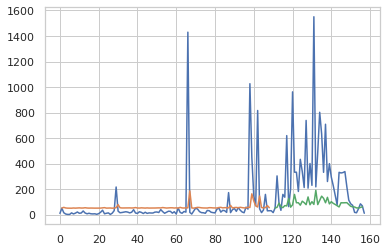

In [392]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot) #red is training data, green is testing data, blue is orginal dataset.
plt.plot(testPredictPlot)  #https://www.applause.com/blog/training-data-validation-data-vs-test-data(differences between training data, test dataset)
plt.show()

In [393]:
# RIGHT LIKES PREDICTION

In [394]:
dataset=right_likes_ts

In [395]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.values.reshape(-1,1))
train_size = int(len(dataset) * 0.6)   #splitting the dataset into 67 and 33 percent.
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

81 54


In [396]:
look_back = 1
trainX, trainY = create_dataset(train, look_back) #converting as above mentioned function for training and testing.
testX, testY = create_dataset(test, look_back)
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))     

In [397]:
start_time4 = time.time()
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back))) #4 are the hidden LSTM blocks and 1 input layer as visible.
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
#K.set_value(model.optimizer.learning_rate, 0.01)
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2) #training the data with epochs=100,batch size=1;

Epoch 1/100
79/79 - 1s - loss: 8.7561e-04 - 1s/epoch - 15ms/step
Epoch 2/100
79/79 - 0s - loss: 8.5337e-04 - 78ms/epoch - 991us/step
Epoch 3/100
79/79 - 0s - loss: 8.8108e-04 - 70ms/epoch - 888us/step
Epoch 4/100
79/79 - 0s - loss: 8.4362e-04 - 70ms/epoch - 882us/step
Epoch 5/100
79/79 - 0s - loss: 8.6470e-04 - 70ms/epoch - 882us/step
Epoch 6/100
79/79 - 0s - loss: 8.7621e-04 - 70ms/epoch - 883us/step
Epoch 7/100
79/79 - 0s - loss: 8.3968e-04 - 70ms/epoch - 888us/step
Epoch 8/100
79/79 - 0s - loss: 8.3426e-04 - 69ms/epoch - 879us/step
Epoch 9/100
79/79 - 0s - loss: 8.3746e-04 - 70ms/epoch - 883us/step
Epoch 10/100
79/79 - 0s - loss: 8.5325e-04 - 70ms/epoch - 884us/step
Epoch 11/100
79/79 - 0s - loss: 8.7437e-04 - 69ms/epoch - 876us/step
Epoch 12/100
79/79 - 0s - loss: 8.3780e-04 - 70ms/epoch - 880us/step
Epoch 13/100
79/79 - 0s - loss: 8.6351e-04 - 69ms/epoch - 878us/step
Epoch 14/100
79/79 - 0s - loss: 8.5817e-04 - 70ms/epoch - 883us/step
Epoch 15/100
79/79 - 0s - loss: 8.4468e-04 - 7

In [398]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

2/2 [==============================] - 0s 2ms/step


In [399]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])              #Note that we invert the predictions before calculating error scores to ensure that performance is reported in the same units as the original data (thousands of passengers per month).
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [400]:
print(f"the time of execution of LSTM for 1 day lookback for left twweets in seconds is{time.time() - start_time4}")

the time of execution of LSTM for 1 day lookback for left twweets in seconds is8.85917329788208


In [401]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score RMSE OF right likes : %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score RMSE OF right likes: %.2f RMSE' % (testScore))

Train Score RMSE OF right likes : 13.94 RMSE
Test Score RMSE OF right likes: 95.57 RMSE


In [402]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)         
trainPredictPlot[:, :] = numpy.nan                                              #Because of how the dataset was prepared, we must shift the predictions so that they align on the x-axis with the original dataset. 
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

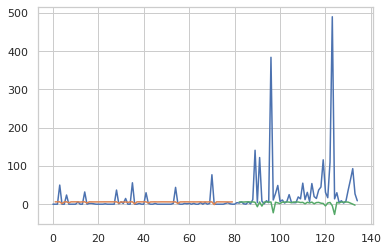

In [403]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot) #red is training data, green is testing data, blue is orginal dataset.
plt.plot(testPredictPlot)  #https://www.applause.com/blog/training-data-validation-data-vs-test-data(differences between training data, test dataset)
plt.show()

In [404]:
# Centre likes prediction

In [405]:
dataset=centre_likes_ts

In [406]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.values.reshape(-1,1))
train_size = int(len(dataset) * 0.7)   #splitting the dataset into 67 and 33 percent.
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

110 48


In [407]:
look_back = 1
trainX, trainY = create_dataset(train, look_back) #converting as above mentioned function for training and testing.
testX, testY = create_dataset(test, look_back)
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))     

In [408]:
start_time4 = time.time()
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back))) #4 are the hidden LSTM blocks and 1 input layer as visible.
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
#K.set_value(model.optimizer.learning_rate, 0.01)
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2) #training the data with epochs=100,batch size=1;

Epoch 1/100
108/108 - 1s - loss: 0.0010 - 1s/epoch - 12ms/step
Epoch 2/100
108/108 - 0s - loss: 8.7908e-04 - 105ms/epoch - 974us/step
Epoch 3/100
108/108 - 0s - loss: 8.9918e-04 - 103ms/epoch - 956us/step
Epoch 4/100
108/108 - 0s - loss: 8.7938e-04 - 102ms/epoch - 948us/step
Epoch 5/100
108/108 - 0s - loss: 8.7710e-04 - 102ms/epoch - 948us/step
Epoch 6/100
108/108 - 0s - loss: 8.7068e-04 - 102ms/epoch - 942us/step
Epoch 7/100
108/108 - 0s - loss: 8.5159e-04 - 101ms/epoch - 937us/step
Epoch 8/100
108/108 - 0s - loss: 8.5749e-04 - 97ms/epoch - 900us/step
Epoch 9/100
108/108 - 0s - loss: 8.3351e-04 - 97ms/epoch - 895us/step
Epoch 10/100
108/108 - 0s - loss: 8.3435e-04 - 97ms/epoch - 900us/step
Epoch 11/100
108/108 - 0s - loss: 8.1226e-04 - 96ms/epoch - 888us/step
Epoch 12/100
108/108 - 0s - loss: 8.2898e-04 - 96ms/epoch - 888us/step
Epoch 13/100
108/108 - 0s - loss: 8.1367e-04 - 96ms/epoch - 893us/step
Epoch 14/100
108/108 - 0s - loss: 7.9835e-04 - 96ms/epoch - 891us/step
Epoch 15/100
108

In [409]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


2/2 [==============================] - 0s 2ms/step


In [410]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])              #Note that we invert the predictions before calculating error scores to ensure that performance is reported in the same units as the original data (thousands of passengers per month).
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [411]:
print(f"the time of execution of LSTM for 1 day lookback for left twweets in seconds is{time.time() - start_time4}")

the time of execution of LSTM for 1 day lookback for left twweets in seconds is11.608208417892456


In [412]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score RMSE OF centre likes : %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score RMSE OF centre likes: %.2f RMSE' % (testScore))

Train Score RMSE OF centre likes : 73.22 RMSE
Test Score RMSE OF centre likes: 519.61 RMSE


In [413]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)         
trainPredictPlot[:, :] = numpy.nan                                              #Because of how the dataset was prepared, we must shift the predictions so that they align on the x-axis with the original dataset. 
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

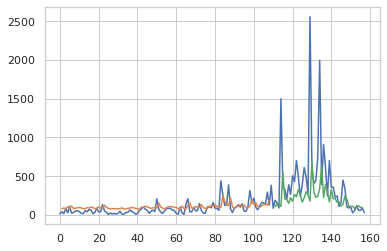

In [414]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot) #red is training data, green is testing data, blue is orginal dataset.
plt.plot(testPredictPlot)  #https://www.applause.com/blog/training-data-validation-data-vs-test-data(differences between training data, test dataset)
plt.show()

In [415]:
# left leaning likes forecasting

In [416]:
dataset= left_leaning_likes_ts

In [417]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.values.reshape(-1,1))
train_size = int(len(dataset) * 0.85)   #splitting the dataset into 67 and 33 percent.
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

134 24


In [418]:
look_back = 1
trainX, trainY = create_dataset(train, look_back) #converting as above mentioned function for training and testing.
testX, testY = create_dataset(test, look_back)
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))     

In [419]:
start_time4 = time.time()
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back))) #4 are the hidden LSTM blocks and 1 input layer as visible.
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
#K.set_value(model.optimizer.learning_rate, 0.01)
model.fit(trainX, trainY, epochs=200, batch_size=1, verbose=2) #training the data with epochs=100,batch size=1;

Epoch 1/200
132/132 - 1s - loss: 9.1171e-04 - 1s/epoch - 9ms/step
Epoch 2/200
132/132 - 0s - loss: 8.7866e-04 - 116ms/epoch - 877us/step
Epoch 3/200
132/132 - 0s - loss: 8.5921e-04 - 112ms/epoch - 852us/step
Epoch 4/200
132/132 - 0s - loss: 8.6129e-04 - 111ms/epoch - 844us/step
Epoch 5/200
132/132 - 0s - loss: 8.2255e-04 - 111ms/epoch - 838us/step
Epoch 6/200
132/132 - 0s - loss: 8.2867e-04 - 112ms/epoch - 846us/step
Epoch 7/200
132/132 - 0s - loss: 8.1534e-04 - 110ms/epoch - 837us/step
Epoch 8/200
132/132 - 0s - loss: 7.9444e-04 - 112ms/epoch - 847us/step
Epoch 9/200
132/132 - 0s - loss: 8.2116e-04 - 111ms/epoch - 842us/step
Epoch 10/200
132/132 - 0s - loss: 8.1007e-04 - 112ms/epoch - 847us/step
Epoch 11/200
132/132 - 0s - loss: 7.8027e-04 - 112ms/epoch - 847us/step
Epoch 12/200
132/132 - 0s - loss: 7.7759e-04 - 112ms/epoch - 848us/step
Epoch 13/200
132/132 - 0s - loss: 7.7285e-04 - 112ms/epoch - 849us/step
Epoch 14/200
132/132 - 0s - loss: 7.8649e-04 - 111ms/epoch - 838us/step
Epoch 

In [420]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)






1/1 [==============================] - 0s 20ms/step


In [421]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])              #Note that we invert the predictions before calculating error scores to ensure that performance is reported in the same units as the original data (thousands of passengers per month).
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [422]:
print(f"the time of execution of LSTM for 1 day lookback for left twweets in seconds is{time.time() - start_time4}")

the time of execution of LSTM for 1 day lookback for left twweets in seconds is24.289254188537598


In [423]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score RMSE OF LEFT leaning likes : %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score RMSE OF LEFT leaning likes: %.2f RMSE' % (testScore))

Train Score RMSE OF LEFT leaning likes : 649.77 RMSE
Test Score RMSE OF LEFT leaning likes: 5260.87 RMSE


In [424]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)         
trainPredictPlot[:, :] = numpy.nan                                              #Because of how the dataset was prepared, we must shift the predictions so that they align on the x-axis with the original dataset. 
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


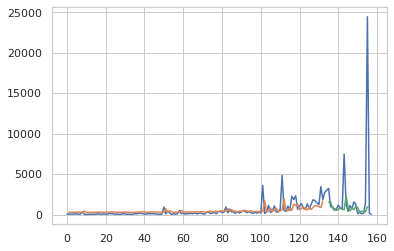

In [425]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot) #red is training data, green is testing data, blue is orginal dataset.
plt.plot(testPredictPlot)  #https://www.applause.com/blog/training-data-validation-data-vs-test-data(differences between training data, test dataset)
plt.show()

In [426]:
# right leaning likes prediction

In [427]:
dataset=right_leaning_likes_ts

In [428]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.values.reshape(-1,1))
train_size = int(len(dataset) * 0.8)   #splitting the dataset into 67 and 33 percent.
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

116 30


In [429]:
look_back = 1
trainX, trainY = create_dataset(train, look_back) #converting as above mentioned function for training and testing.
testX, testY = create_dataset(test, look_back)
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))     

In [430]:
start_time4 = time.time()
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back))) #4 are the hidden LSTM blocks and 1 input layer as visible.
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
#K.set_value(model.optimizer.learning_rate, 0.01)
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2) #training the data with epochs=100,batch size=1;

Epoch 1/100
114/114 - 1s - loss: 0.0014 - 1s/epoch - 11ms/step
Epoch 2/100
114/114 - 0s - loss: 0.0014 - 103ms/epoch - 903us/step
Epoch 3/100
114/114 - 0s - loss: 0.0014 - 100ms/epoch - 874us/step
Epoch 4/100
114/114 - 0s - loss: 0.0014 - 99ms/epoch - 872us/step
Epoch 5/100
114/114 - 0s - loss: 0.0013 - 97ms/epoch - 849us/step
Epoch 6/100
114/114 - 0s - loss: 0.0013 - 97ms/epoch - 847us/step
Epoch 7/100
114/114 - 0s - loss: 0.0013 - 96ms/epoch - 842us/step
Epoch 8/100
114/114 - 0s - loss: 0.0013 - 97ms/epoch - 847us/step
Epoch 9/100
114/114 - 0s - loss: 0.0014 - 96ms/epoch - 842us/step
Epoch 10/100
114/114 - 0s - loss: 0.0013 - 96ms/epoch - 844us/step
Epoch 11/100
114/114 - 0s - loss: 0.0013 - 96ms/epoch - 844us/step
Epoch 12/100
114/114 - 0s - loss: 0.0013 - 97ms/epoch - 848us/step
Epoch 13/100
114/114 - 0s - loss: 0.0013 - 97ms/epoch - 849us/step
Epoch 14/100
114/114 - 0s - loss: 0.0013 - 97ms/epoch - 850us/step
Epoch 15/100
114/114 - 0s - loss: 0.0013 - 97ms/epoch - 848us/step
Epoch

In [431]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


1/1 [==============================] - 0s 20ms/step


In [432]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])              #Note that we invert the predictions before calculating error scores to ensure that performance is reported in the same units as the original data (thousands of passengers per month).
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [433]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score RMSE OF right leaning likes : %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score RMSE OF right leaning likes: %.2f RMSE' % (testScore))

Train Score RMSE OF right leaning likes : 8.41 RMSE
Test Score RMSE OF right leaning likes: 62.59 RMSE


In [434]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)         
trainPredictPlot[:, :] = numpy.nan                                              #Because of how the dataset was prepared, we must shift the predictions so that they align on the x-axis with the original dataset. 
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


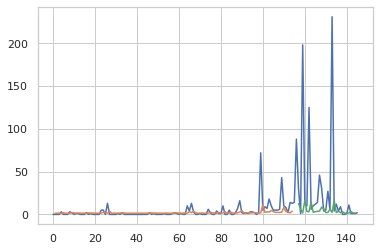

In [435]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot) #red is training data, green is testing data, blue is orginal dataset.
plt.plot(testPredictPlot)  #https://www.applause.com/blog/training-data-validation-data-vs-test-data(differences between training data, test dataset)
plt.show()

In [436]:
#LSTM FOR 14 DAYS lookback 

In [437]:
dataset1=left_likes_ts

In [438]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset1 = scaler.fit_transform(dataset1.values.reshape(-1,1))
train_size = int(len(dataset1) * 0.67)   #splitting the dataset into 67 and 33 percent.
test_size = len(dataset1) - train_size
train, test = dataset1[0:train_size,:], dataset1[train_size:len(dataset1),:]
print(len(train), len(test))

105 53


Epoch 1/100
90/90 - 1s - loss: 0.0182 - 1s/epoch - 14ms/step
Epoch 2/100
90/90 - 0s - loss: 0.0177 - 83ms/epoch - 925us/step
Epoch 3/100
90/90 - 0s - loss: 0.0176 - 79ms/epoch - 877us/step
Epoch 4/100
90/90 - 0s - loss: 0.0175 - 79ms/epoch - 873us/step
Epoch 5/100
90/90 - 0s - loss: 0.0175 - 77ms/epoch - 855us/step
Epoch 6/100
90/90 - 0s - loss: 0.0174 - 77ms/epoch - 851us/step
Epoch 7/100
90/90 - 0s - loss: 0.0173 - 77ms/epoch - 851us/step
Epoch 8/100
90/90 - 0s - loss: 0.0173 - 77ms/epoch - 859us/step
Epoch 9/100
90/90 - 0s - loss: 0.0172 - 77ms/epoch - 856us/step
Epoch 10/100
90/90 - 0s - loss: 0.0171 - 77ms/epoch - 853us/step
Epoch 11/100
90/90 - 0s - loss: 0.0172 - 76ms/epoch - 847us/step
Epoch 12/100
90/90 - 0s - loss: 0.0171 - 77ms/epoch - 854us/step
Epoch 13/100
90/90 - 0s - loss: 0.0170 - 77ms/epoch - 851us/step
Epoch 14/100
90/90 - 0s - loss: 0.0170 - 77ms/epoch - 851us/step
Epoch 15/100
90/90 - 0s - loss: 0.0169 - 83ms/epoch - 924us/step
Epoch 16/100
90/90 - 0s - loss: 0.017

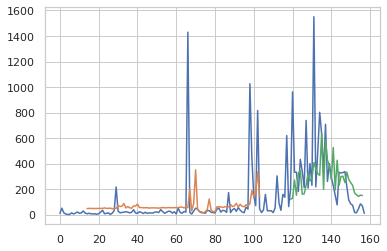

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 4)                 304       
                                                                 
 dense_22 (Dense)            (None, 1)                 5         
                                                                 
Total params: 309
Trainable params: 309
Non-trainable params: 0
_________________________________________________________________


In [439]:
start_time19 =time.time()
for i in range(14,15):
    trainX, trainY = create_dataset(train, i) #converting as above mentioned function for training and testing.
    testX, testY = create_dataset(test, i)
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, i))) #4 are the hidden LSTM blocks and 1 input layer as visible.
    #model.add(Dense(units=4))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2) #training the data with epochs=100,batch size=1;
    # make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])              #Note that we invert the predictions before calculating error scores to ensure that performance is reported in the same units as the original data (thousands of passengers per month).
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Train Score RMSE OF left tweets: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test Score RMSE OF left tweets: %.2f RMSE' % (testScore))
    # shift train predictions for plotting
    trainPredictPlot = numpy.empty_like(dataset1)         
    trainPredictPlot[:, :] = numpy.nan                                              #Because of how the dataset was prepared, we must shift the predictions so that they align on the x-axis with the original dataset. 
    trainPredictPlot[i:len(trainPredict)+i, :] = trainPredict
    # shift test predictions for plotting
    testPredictPlot = numpy.empty_like(dataset1)
    testPredictPlot[:, :] = numpy.nan
    testPredictPlot[len(trainPredict)+(i*2)+1:len(dataset1)-1, :] = testPredict
    # plot baseline and predictions
    plt.plot(scaler.inverse_transform(dataset1))
    plt.plot(trainPredictPlot) #red is training data, green is testing data, blue is orginal dataset.
    plt.plot(testPredictPlot)  #https://www.applause.com/blog/training-data-validation-data-vs-test-data(differences between training data, test dataset)
    plt.show()
    model.summary()

In [440]:
#right likes prediction

In [441]:
dataset1=right_likes_ts

In [442]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset1 = scaler.fit_transform(dataset1.values.reshape(-1,1))
train_size = int(len(dataset1) * 0.8)   #splitting the dataset into 67 and 33 percent.
test_size = len(dataset1) - train_size
train, test = dataset1[0:train_size,:], dataset1[train_size:len(dataset1),:]
print(len(train), len(test))

108 27


Epoch 1/100
93/93 - 1s - loss: 0.0088 - 1s/epoch - 13ms/step
Epoch 2/100
93/93 - 0s - loss: 0.0086 - 93ms/epoch - 1ms/step
Epoch 3/100
93/93 - 0s - loss: 0.0085 - 90ms/epoch - 963us/step
Epoch 4/100
93/93 - 0s - loss: 0.0084 - 87ms/epoch - 936us/step
Epoch 5/100
93/93 - 0s - loss: 0.0083 - 86ms/epoch - 926us/step
Epoch 6/100
93/93 - 0s - loss: 0.0083 - 84ms/epoch - 902us/step
Epoch 7/100
93/93 - 0s - loss: 0.0082 - 84ms/epoch - 899us/step
Epoch 8/100
93/93 - 0s - loss: 0.0081 - 82ms/epoch - 877us/step
Epoch 9/100
93/93 - 0s - loss: 0.0080 - 82ms/epoch - 877us/step
Epoch 10/100
93/93 - 0s - loss: 0.0081 - 81ms/epoch - 866us/step
Epoch 11/100
93/93 - 0s - loss: 0.0080 - 82ms/epoch - 877us/step
Epoch 12/100
93/93 - 0s - loss: 0.0079 - 81ms/epoch - 873us/step
Epoch 13/100
93/93 - 0s - loss: 0.0079 - 81ms/epoch - 868us/step
Epoch 14/100
93/93 - 0s - loss: 0.0078 - 82ms/epoch - 884us/step
Epoch 15/100
93/93 - 0s - loss: 0.0077 - 81ms/epoch - 874us/step
Epoch 16/100
93/93 - 0s - loss: 0.0077 

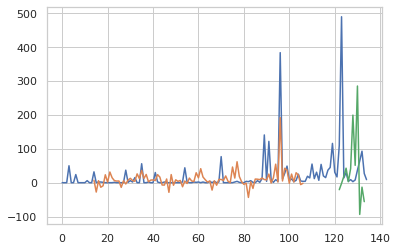

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 4)                 304       
                                                                 
 dense_23 (Dense)            (None, 1)                 5         
                                                                 
Total params: 309
Trainable params: 309
Non-trainable params: 0
_________________________________________________________________


In [443]:
start_time19 =time.time()
for i in range(14,15):
    trainX, trainY = create_dataset(train, i) #converting as above mentioned function for training and testing.
    testX, testY = create_dataset(test, i)
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, i))) #4 are the hidden LSTM blocks and 1 input layer as visible.
    #model.add(Dense(units=4))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2) #training the data with epochs=100,batch size=1;
    # make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])              #Note that we invert the predictions before calculating error scores to ensure that performance is reported in the same units as the original data (thousands of passengers per month).
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Train Score RMSE OF right likes: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test Score RMSE OF right likes: %.2f RMSE' % (testScore))
    # shift train predictions for plotting
    trainPredictPlot = numpy.empty_like(dataset1)         
    trainPredictPlot[:, :] = numpy.nan                                              #Because of how the dataset was prepared, we must shift the predictions so that they align on the x-axis with the original dataset. 
    trainPredictPlot[i:len(trainPredict)+i, :] = trainPredict
    # shift test predictions for plotting
    testPredictPlot = numpy.empty_like(dataset1)
    testPredictPlot[:, :] = numpy.nan
    testPredictPlot[len(trainPredict)+(i*2)+1:len(dataset1)-1, :] = testPredict
    # plot baseline and predictions
    plt.plot(scaler.inverse_transform(dataset1))
    plt.plot(trainPredictPlot) #red is training data, green is testing data, blue is orginal dataset.
    plt.plot(testPredictPlot)  #https://www.applause.com/blog/training-data-validation-data-vs-test-data(differences between training data, test dataset)
    plt.show()
    model.summary()

In [444]:
#Centre likes prediction

In [445]:
dataset1=centre_likes_ts

In [446]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset1 = scaler.fit_transform(dataset1.values.reshape(-1,1))
train_size = int(len(dataset1) * 0.6)   #splitting the dataset into 67 and 33 percent.
test_size = len(dataset1) - train_size
train, test = dataset1[0:train_size,:], dataset1[train_size:len(dataset1),:]
print(len(train), len(test))

94 64


Epoch 1/100
79/79 - 1s - loss: 9.9792e-04 - 1s/epoch - 15ms/step
Epoch 2/100
79/79 - 0s - loss: 9.0249e-04 - 74ms/epoch - 934us/step
Epoch 3/100
79/79 - 0s - loss: 8.7748e-04 - 69ms/epoch - 874us/step
Epoch 4/100
79/79 - 0s - loss: 8.8878e-04 - 69ms/epoch - 870us/step
Epoch 5/100
79/79 - 0s - loss: 8.8230e-04 - 68ms/epoch - 867us/step
Epoch 6/100
79/79 - 0s - loss: 8.4481e-04 - 68ms/epoch - 856us/step
Epoch 7/100
79/79 - 0s - loss: 8.3328e-04 - 68ms/epoch - 858us/step
Epoch 8/100
79/79 - 0s - loss: 8.4960e-04 - 68ms/epoch - 855us/step
Epoch 9/100
79/79 - 0s - loss: 8.1279e-04 - 67ms/epoch - 851us/step
Epoch 10/100
79/79 - 0s - loss: 8.0408e-04 - 67ms/epoch - 853us/step
Epoch 11/100
79/79 - 0s - loss: 8.3150e-04 - 68ms/epoch - 856us/step
Epoch 12/100
79/79 - 0s - loss: 8.2053e-04 - 68ms/epoch - 856us/step
Epoch 13/100
79/79 - 0s - loss: 7.9166e-04 - 67ms/epoch - 853us/step
Epoch 14/100
79/79 - 0s - loss: 7.9380e-04 - 67ms/epoch - 852us/step
Epoch 15/100
79/79 - 0s - loss: 7.8499e-04 - 6

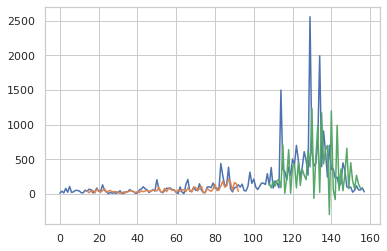

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 4)                 304       
                                                                 
 dense_24 (Dense)            (None, 1)                 5         
                                                                 
Total params: 309
Trainable params: 309
Non-trainable params: 0
_________________________________________________________________


In [447]:
start_time19 =time.time()
for i in range(14,15):
    trainX, trainY = create_dataset(train, i) #converting as above mentioned function for training and testing.
    testX, testY = create_dataset(test, i)
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, i))) #4 are the hidden LSTM blocks and 1 input layer as visible.
    #model.add(Dense(units=4))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2) #training the data with epochs=100,batch size=1;
    # make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])              #Note that we invert the predictions before calculating error scores to ensure that performance is reported in the same units as the original data (thousands of passengers per month).
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Train Score RMSE OF centre likes: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test Score RMSE OF centre likes: %.2f RMSE' % (testScore))
    # shift train predictions for plotting
    trainPredictPlot = numpy.empty_like(dataset1)         
    trainPredictPlot[:, :] = numpy.nan                                              #Because of how the dataset was prepared, we must shift the predictions so that they align on the x-axis with the original dataset. 
    trainPredictPlot[i:len(trainPredict)+i, :] = trainPredict
    # shift test predictions for plotting
    testPredictPlot = numpy.empty_like(dataset1)
    testPredictPlot[:, :] = numpy.nan
    testPredictPlot[len(trainPredict)+(i*2)+1:len(dataset1)-1, :] = testPredict
    # plot baseline and predictions
    plt.plot(scaler.inverse_transform(dataset1))
    plt.plot(trainPredictPlot) #red is training data, green is testing data, blue is orginal dataset.
    plt.plot(testPredictPlot)  #https://www.applause.com/blog/training-data-validation-data-vs-test-data(differences between training data, test dataset)
    plt.show()
    model.summary()

In [448]:
# left leaning tweets prediction

In [449]:
dataset1=left_leaning_likes_ts

In [450]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset1 = scaler.fit_transform(dataset1.values.reshape(-1,1))
train_size = int(len(dataset1) * 0.6)   #splitting the dataset into 67 and 33 percent.
test_size = len(dataset1) - train_size
train, test = dataset1[0:train_size,:], dataset1[train_size:len(dataset1),:]
print(len(train), len(test))

94 64


Epoch 1/100
79/79 - 1s - loss: 6.4580e-05 - 1s/epoch - 15ms/step
Epoch 2/100
79/79 - 0s - loss: 5.5463e-05 - 75ms/epoch - 955us/step
Epoch 3/100
79/79 - 0s - loss: 5.3930e-05 - 70ms/epoch - 882us/step
Epoch 4/100
79/79 - 0s - loss: 5.4247e-05 - 71ms/epoch - 893us/step
Epoch 5/100
79/79 - 0s - loss: 5.0842e-05 - 69ms/epoch - 875us/step
Epoch 6/100
79/79 - 0s - loss: 4.8476e-05 - 68ms/epoch - 867us/step
Epoch 7/100
79/79 - 0s - loss: 4.6968e-05 - 67ms/epoch - 853us/step
Epoch 8/100
79/79 - 0s - loss: 4.5425e-05 - 68ms/epoch - 859us/step
Epoch 9/100
79/79 - 0s - loss: 4.3073e-05 - 68ms/epoch - 861us/step
Epoch 10/100
79/79 - 0s - loss: 4.4806e-05 - 68ms/epoch - 857us/step
Epoch 11/100
79/79 - 0s - loss: 4.4090e-05 - 68ms/epoch - 862us/step
Epoch 12/100
79/79 - 0s - loss: 4.1146e-05 - 67ms/epoch - 843us/step
Epoch 13/100
79/79 - 0s - loss: 4.1073e-05 - 67ms/epoch - 846us/step
Epoch 14/100
79/79 - 0s - loss: 4.1809e-05 - 68ms/epoch - 861us/step
Epoch 15/100
79/79 - 0s - loss: 4.4529e-05 - 6

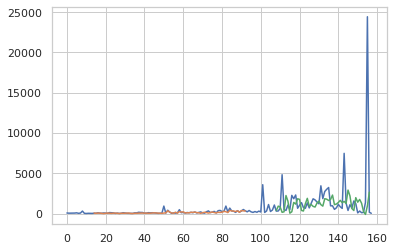

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_23 (LSTM)              (None, 4)                 304       
                                                                 
 dense_25 (Dense)            (None, 1)                 5         
                                                                 
Total params: 309
Trainable params: 309
Non-trainable params: 0
_________________________________________________________________


In [451]:
start_time19 =time.time()
for i in range(14,15):
    trainX, trainY = create_dataset(train, i) #converting as above mentioned function for training and testing.
    testX, testY = create_dataset(test, i)
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, i))) #4 are the hidden LSTM blocks and 1 input layer as visible.
    #model.add(Dense(units=4))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2) #training the data with epochs=100,batch size=1;
    # make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])              #Note that we invert the predictions before calculating error scores to ensure that performance is reported in the same units as the original data (thousands of passengers per month).
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Train Score RMSE OF left leaning likes: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test Score RMSE OF left leaning likes: %.2f RMSE' % (testScore))
    # shift train predictions for plotting
    trainPredictPlot = numpy.empty_like(dataset1)         
    trainPredictPlot[:, :] = numpy.nan                                              #Because of how the dataset was prepared, we must shift the predictions so that they align on the x-axis with the original dataset. 
    trainPredictPlot[i:len(trainPredict)+i, :] = trainPredict
    # shift test predictions for plotting
    testPredictPlot = numpy.empty_like(dataset1)
    testPredictPlot[:, :] = numpy.nan
    testPredictPlot[len(trainPredict)+(i*2)+1:len(dataset1)-1, :] = testPredict
    # plot baseline and predictions
    plt.plot(scaler.inverse_transform(dataset1))
    plt.plot(trainPredictPlot) #red is training data, green is testing data, blue is orginal dataset.
    plt.plot(testPredictPlot)  #https://www.applause.com/blog/training-data-validation-data-vs-test-data(differences between training data, test dataset)
    plt.show()
    model.summary()

In [452]:
#right leaning tweets

In [453]:
dataset1= right_leaning_likes_ts

In [454]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset1 = scaler.fit_transform(dataset1.values.reshape(-1,1))
train_size = int(len(dataset1) * 0.6)   #splitting the dataset into 67 and 33 percent.
test_size = len(dataset1) - train_size
train, test = dataset1[0:train_size,:], dataset1[train_size:len(dataset1),:]
print(len(train), len(test))

87 59


Epoch 1/100
72/72 - 1s - loss: 1.5697e-04 - 1s/epoch - 16ms/step
Epoch 2/100
72/72 - 0s - loss: 1.4972e-04 - 69ms/epoch - 960us/step
Epoch 3/100
72/72 - 0s - loss: 1.5452e-04 - 66ms/epoch - 916us/step
Epoch 4/100
72/72 - 0s - loss: 1.4508e-04 - 66ms/epoch - 917us/step
Epoch 5/100
72/72 - 0s - loss: 1.5579e-04 - 66ms/epoch - 912us/step
Epoch 6/100
72/72 - 0s - loss: 1.4618e-04 - 66ms/epoch - 910us/step
Epoch 7/100
72/72 - 0s - loss: 1.5255e-04 - 66ms/epoch - 922us/step
Epoch 8/100
72/72 - 0s - loss: 1.4859e-04 - 65ms/epoch - 905us/step
Epoch 9/100
72/72 - 0s - loss: 1.5048e-04 - 64ms/epoch - 886us/step
Epoch 10/100
72/72 - 0s - loss: 1.5031e-04 - 63ms/epoch - 879us/step
Epoch 11/100
72/72 - 0s - loss: 1.5110e-04 - 63ms/epoch - 875us/step
Epoch 12/100
72/72 - 0s - loss: 1.4422e-04 - 63ms/epoch - 877us/step
Epoch 13/100
72/72 - 0s - loss: 1.3750e-04 - 63ms/epoch - 868us/step
Epoch 14/100
72/72 - 0s - loss: 1.5213e-04 - 61ms/epoch - 849us/step
Epoch 15/100
72/72 - 0s - loss: 1.4722e-04 - 6

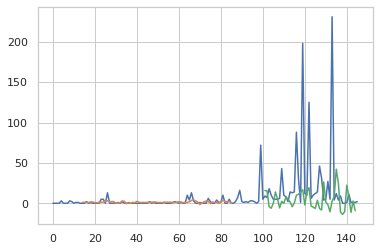

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 4)                 304       
                                                                 
 dense_26 (Dense)            (None, 1)                 5         
                                                                 
Total params: 309
Trainable params: 309
Non-trainable params: 0
_________________________________________________________________


In [455]:
start_time19 =time.time()
for i in range(14,15):
    trainX, trainY = create_dataset(train, i) #converting as above mentioned function for training and testing.
    testX, testY = create_dataset(test, i)
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, i))) #4 are the hidden LSTM blocks and 1 input layer as visible.
    #model.add(Dense(units=4))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2) #training the data with epochs=100,batch size=1;
    # make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])              #Note that we invert the predictions before calculating error scores to ensure that performance is reported in the same units as the original data (thousands of passengers per month).
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Train Score RMSE OF right leaning likes: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test Score RMSE OF right leaning likes: %.2f RMSE' % (testScore))
    # shift train predictions for plotting
    trainPredictPlot = numpy.empty_like(dataset1)         
    trainPredictPlot[:, :] = numpy.nan                                              #Because of how the dataset was prepared, we must shift the predictions so that they align on the x-axis with the original dataset. 
    trainPredictPlot[i:len(trainPredict)+i, :] = trainPredict
    # shift test predictions for plotting
    testPredictPlot = numpy.empty_like(dataset1)
    testPredictPlot[:, :] = numpy.nan
    testPredictPlot[len(trainPredict)+(i*2)+1:len(dataset1)-1, :] = testPredict
    # plot baseline and predictions
    plt.plot(scaler.inverse_transform(dataset1))
    plt.plot(trainPredictPlot) #red is training data, green is testing data, blue is orginal dataset.
    plt.plot(testPredictPlot)  #https://www.applause.com/blog/training-data-validation-data-vs-test-data(differences between training data, test dataset)
    plt.show()
    model.summary()

In [456]:
# Multistepforecasting of left likes

In [457]:
#left likes forecasting

84/84 - 1s - loss: 0.1791 - 1s/epoch - 13ms/step
84/84 - 0s - loss: 0.0254 - 79ms/epoch - 937us/step
84/84 - 0s - loss: 0.0116 - 77ms/epoch - 917us/step
84/84 - 0s - loss: 0.0113 - 78ms/epoch - 933us/step
84/84 - 0s - loss: 0.0111 - 78ms/epoch - 926us/step
84/84 - 0s - loss: 0.0109 - 75ms/epoch - 897us/step
84/84 - 0s - loss: 0.0107 - 75ms/epoch - 892us/step
84/84 - 0s - loss: 0.0106 - 77ms/epoch - 918us/step
84/84 - 0s - loss: 0.0104 - 76ms/epoch - 911us/step
84/84 - 0s - loss: 0.0103 - 76ms/epoch - 909us/step
84/84 - 0s - loss: 0.0103 - 76ms/epoch - 904us/step
84/84 - 0s - loss: 0.0102 - 76ms/epoch - 907us/step
84/84 - 0s - loss: 0.0101 - 75ms/epoch - 890us/step
84/84 - 0s - loss: 0.0101 - 75ms/epoch - 896us/step
84/84 - 0s - loss: 0.0100 - 77ms/epoch - 921us/step
84/84 - 0s - loss: 0.0100 - 77ms/epoch - 914us/step
84/84 - 0s - loss: 0.0099 - 76ms/epoch - 906us/step
84/84 - 0s - loss: 0.0099 - 78ms/epoch - 927us/step
84/84 - 0s - loss: 0.0098 - 77ms/epoch - 921us/step
84/84 - 0s - lo

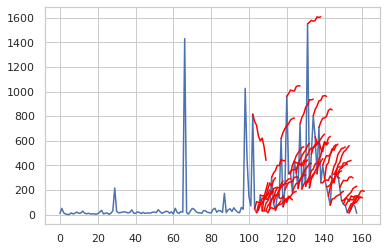

In [458]:
# load dataset
start_time22 = time.time()
series = left_likes_ts
# configure
n_lag = 14
n_seq = 7
n_test = 53
n_epochs = 250
n_batch = 1
n_neurons = 8
# prepare data
scaler, train, test = prepare_data(series, n_test, n_lag, n_seq)
# fit model
model = fit_lstm(train, n_lag, n_seq, n_batch, n_epochs, n_neurons)
# make forecasts
forecasts = make_forecasts(model, n_batch, train, test, n_lag, n_seq)
# inverse transform forecasts and test
forecasts = inverse_transform(series, forecasts, scaler, n_test+2)
actual = [row[n_lag:] for row in test]
actual = inverse_transform(series, actual, scaler, n_test+2)
# evaluate forecasts
evaluate_forecasts(actual, forecasts, n_lag, n_seq)
# plot forecasts
plot_forecasts(series, forecasts, n_test+2)

In [459]:
# right likes forecasting

87/87 - 1s - loss: 0.0853 - 1s/epoch - 12ms/step
87/87 - 0s - loss: 0.0099 - 85ms/epoch - 977us/step
87/87 - 0s - loss: 0.0090 - 83ms/epoch - 950us/step
87/87 - 0s - loss: 0.0087 - 82ms/epoch - 943us/step
87/87 - 0s - loss: 0.0085 - 82ms/epoch - 941us/step
87/87 - 0s - loss: 0.0083 - 85ms/epoch - 982us/step
87/87 - 0s - loss: 0.0081 - 81ms/epoch - 931us/step
87/87 - 0s - loss: 0.0080 - 80ms/epoch - 922us/step
87/87 - 0s - loss: 0.0078 - 80ms/epoch - 921us/step
87/87 - 0s - loss: 0.0077 - 79ms/epoch - 911us/step
87/87 - 0s - loss: 0.0076 - 80ms/epoch - 918us/step
87/87 - 0s - loss: 0.0075 - 79ms/epoch - 905us/step
87/87 - 0s - loss: 0.0074 - 78ms/epoch - 895us/step
87/87 - 0s - loss: 0.0073 - 79ms/epoch - 906us/step
87/87 - 0s - loss: 0.0073 - 79ms/epoch - 903us/step
87/87 - 0s - loss: 0.0072 - 78ms/epoch - 899us/step
87/87 - 0s - loss: 0.0071 - 80ms/epoch - 915us/step
87/87 - 0s - loss: 0.0071 - 78ms/epoch - 897us/step
87/87 - 0s - loss: 0.0070 - 78ms/epoch - 896us/step
87/87 - 0s - lo

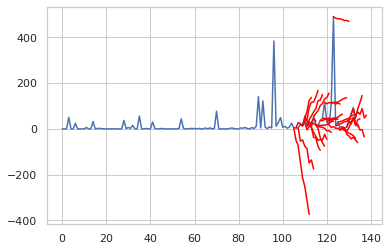

In [460]:
# load dataset
start_time22 = time.time()
series = right_likes_ts
# configure
n_lag = 14
n_seq = 7
n_test = 27
n_epochs = 100
n_batch = 1
n_neurons = 8
# prepare data
scaler, train, test = prepare_data(series, n_test, n_lag, n_seq)
# fit model
model = fit_lstm(train, n_lag, n_seq, n_batch, n_epochs, n_neurons)
# make forecasts
forecasts = make_forecasts(model, n_batch, train, test, n_lag, n_seq)
# inverse transform forecasts and test
forecasts = inverse_transform(series, forecasts, scaler, n_test+2)
actual = [row[n_lag:] for row in test]
actual = inverse_transform(series, actual, scaler, n_test+2)
# evaluate forecasts
evaluate_forecasts(actual, forecasts, n_lag, n_seq)
# plot forecasts
plot_forecasts(series, forecasts, n_test+2)

73/73 - 1s - loss: 0.0465 - 1s/epoch - 15ms/step
73/73 - 0s - loss: 0.0032 - 69ms/epoch - 952us/step
73/73 - 0s - loss: 0.0028 - 68ms/epoch - 932us/step
73/73 - 0s - loss: 0.0026 - 70ms/epoch - 963us/step
73/73 - 0s - loss: 0.0024 - 68ms/epoch - 934us/step
73/73 - 0s - loss: 0.0022 - 71ms/epoch - 974us/step
73/73 - 0s - loss: 0.0020 - 68ms/epoch - 930us/step
73/73 - 0s - loss: 0.0019 - 68ms/epoch - 938us/step
73/73 - 0s - loss: 0.0018 - 68ms/epoch - 936us/step
73/73 - 0s - loss: 0.0016 - 68ms/epoch - 926us/step
73/73 - 0s - loss: 0.0015 - 68ms/epoch - 929us/step
73/73 - 0s - loss: 0.0014 - 73ms/epoch - 996us/step
73/73 - 0s - loss: 0.0013 - 70ms/epoch - 963us/step
73/73 - 0s - loss: 0.0013 - 69ms/epoch - 944us/step
73/73 - 0s - loss: 0.0012 - 69ms/epoch - 942us/step
73/73 - 0s - loss: 0.0011 - 67ms/epoch - 919us/step
73/73 - 0s - loss: 0.0011 - 68ms/epoch - 935us/step
73/73 - 0s - loss: 0.0010 - 67ms/epoch - 914us/step
73/73 - 0s - loss: 9.8631e-04 - 67ms/epoch - 924us/step
73/73 - 0s 

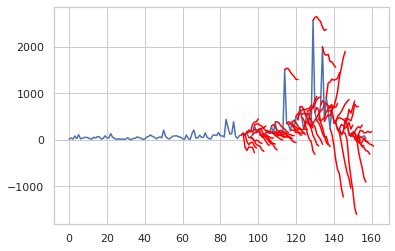

In [461]:
# load dataset
start_time22 = time.time()
series = centre_likes_ts
# configure
n_lag = 14
n_seq = 7
n_test = 64
n_epochs = 100
n_batch = 1
n_neurons = 8
# prepare data
scaler, train, test = prepare_data(series, n_test, n_lag, n_seq)
# fit model
model = fit_lstm(train, n_lag, n_seq, n_batch, n_epochs, n_neurons)
# make forecasts
forecasts = make_forecasts(model, n_batch, train, test, n_lag, n_seq)
# inverse transform forecasts and test
forecasts = inverse_transform(series, forecasts, scaler, n_test+2)
actual = [row[n_lag:] for row in test]
actual = inverse_transform(series, actual, scaler, n_test+2)
# evaluate forecasts
evaluate_forecasts(actual, forecasts, n_lag, n_seq)
# plot forecasts
plot_forecasts(series, forecasts, n_test+2)

73/73 - 1s - loss: 0.1509 - 1s/epoch - 15ms/step
73/73 - 0s - loss: 0.0104 - 72ms/epoch - 993us/step
73/73 - 0s - loss: 0.0030 - 69ms/epoch - 949us/step
73/73 - 0s - loss: 0.0024 - 69ms/epoch - 942us/step
73/73 - 0s - loss: 0.0021 - 68ms/epoch - 937us/step
73/73 - 0s - loss: 0.0018 - 68ms/epoch - 935us/step
73/73 - 0s - loss: 0.0015 - 68ms/epoch - 925us/step
73/73 - 0s - loss: 0.0014 - 68ms/epoch - 927us/step
73/73 - 0s - loss: 0.0012 - 68ms/epoch - 934us/step
73/73 - 0s - loss: 0.0011 - 69ms/epoch - 949us/step
73/73 - 0s - loss: 9.9432e-04 - 69ms/epoch - 943us/step
73/73 - 0s - loss: 9.0006e-04 - 71ms/epoch - 968us/step
73/73 - 0s - loss: 8.1742e-04 - 68ms/epoch - 932us/step
73/73 - 0s - loss: 7.4451e-04 - 68ms/epoch - 938us/step
73/73 - 0s - loss: 6.7986e-04 - 68ms/epoch - 934us/step
73/73 - 0s - loss: 6.2230e-04 - 68ms/epoch - 938us/step
73/73 - 0s - loss: 5.7091e-04 - 69ms/epoch - 941us/step
73/73 - 0s - loss: 5.2490e-04 - 68ms/epoch - 932us/step
73/73 - 0s - loss: 4.8358e-04 - 68m

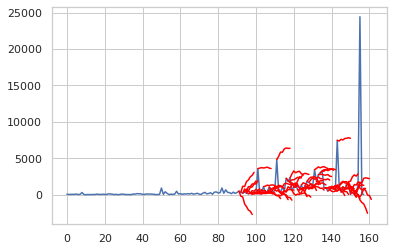

In [462]:
# load dataset
start_time22 = time.time()
series = left_leaning_likes_ts
# configure
n_lag = 14
n_seq = 7
n_test = 64
n_epochs = 100
n_batch = 1
n_neurons = 8
# prepare data
scaler, train, test = prepare_data(series, n_test, n_lag, n_seq)
# fit model
model = fit_lstm(train, n_lag, n_seq, n_batch, n_epochs, n_neurons)
# make forecasts
forecasts = make_forecasts(model, n_batch, train, test, n_lag, n_seq)
# inverse transform forecasts and test
forecasts = inverse_transform(series, forecasts, scaler, n_test+2)
actual = [row[n_lag:] for row in test]
actual = inverse_transform(series, actual, scaler, n_test+2)
# evaluate forecasts
evaluate_forecasts(actual, forecasts, n_lag, n_seq)
# plot forecasts
plot_forecasts(series, forecasts, n_test+2)

66/66 - 1s - loss: 0.0818 - 1s/epoch - 16ms/step
66/66 - 0s - loss: 0.0061 - 63ms/epoch - 950us/step
66/66 - 0s - loss: 0.0034 - 60ms/epoch - 905us/step
66/66 - 0s - loss: 0.0030 - 60ms/epoch - 904us/step
66/66 - 0s - loss: 0.0026 - 60ms/epoch - 909us/step
66/66 - 0s - loss: 0.0023 - 60ms/epoch - 905us/step
66/66 - 0s - loss: 0.0021 - 58ms/epoch - 885us/step
66/66 - 0s - loss: 0.0019 - 60ms/epoch - 912us/step
66/66 - 0s - loss: 0.0017 - 60ms/epoch - 909us/step
66/66 - 0s - loss: 0.0016 - 60ms/epoch - 914us/step
66/66 - 0s - loss: 0.0015 - 59ms/epoch - 895us/step
66/66 - 0s - loss: 0.0013 - 60ms/epoch - 907us/step
66/66 - 0s - loss: 0.0012 - 58ms/epoch - 876us/step
66/66 - 0s - loss: 0.0011 - 58ms/epoch - 883us/step
66/66 - 0s - loss: 0.0011 - 59ms/epoch - 892us/step
66/66 - 0s - loss: 9.9352e-04 - 59ms/epoch - 891us/step
66/66 - 0s - loss: 9.2592e-04 - 60ms/epoch - 914us/step
66/66 - 0s - loss: 8.6416e-04 - 60ms/epoch - 906us/step
66/66 - 0s - loss: 8.0755e-04 - 62ms/epoch - 934us/step

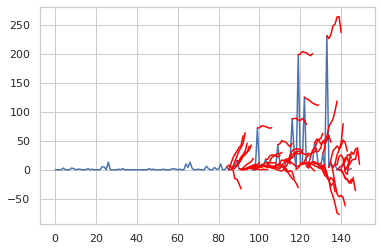

In [463]:
# load dataset
start_time22 = time.time()
series = right_leaning_likes_ts
# configure
n_lag = 14
n_seq = 7
n_test = 59
n_epochs = 100
n_batch = 1
n_neurons = 8
# prepare data
scaler, train, test = prepare_data(series, n_test, n_lag, n_seq)
# fit model
model = fit_lstm(train, n_lag, n_seq, n_batch, n_epochs, n_neurons)
# make forecasts
forecasts = make_forecasts(model, n_batch, train, test, n_lag, n_seq)
# inverse transform forecasts and test
forecasts = inverse_transform(series, forecasts, scaler, n_test+2)
actual = [row[n_lag:] for row in test]
actual = inverse_transform(series, actual, scaler, n_test+2)
# evaluate forecasts
evaluate_forecasts(actual, forecasts, n_lag, n_seq)
# plot forecasts
plot_forecasts(series, forecasts, n_test+2)

In [464]:
# gru forecasting

In [465]:
#left likes forecasting

In [466]:
left_likes_gru = left_likes_filtered
centre_likes_gru =centre_likes_filtered
right_likes_gru = right_likes_filtered
left_leaning_likes_gru = left_leaning_likes_filtered
right_leaning_likes_gru = right_leaning_likes_filtered

In [467]:
#left likes prediction

In [468]:
train_size = int(len(left_likes_gru)*0.8)

train_data = left_likes_gru.iloc[:train_size]
test_data = left_likes_gru.iloc[train_size:]

In [469]:
scaler = MinMaxScaler().fit(train_data)
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

In [470]:
def create_dataset (X, look_back = 1):
    Xs, ys = [], []
 
    for i in range(len(X)-look_back):
        v = X[i:i+look_back]
        Xs.append(v)
        ys.append(X[i+look_back])
 
    return np.array(Xs), np.array(ys)
LOOK_BACK = 14
X_train, y_train = create_dataset(train_scaled,LOOK_BACK)
X_test, y_test = create_dataset(test_scaled,LOOK_BACK)
# Print data shape
print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
print("X_test.shape: ", X_test.shape) 
print("y_test.shape: ", y_test.shape)

X_train.shape:  (112, 14, 1)
y_train.shape:  (112, 1)
X_test.shape:  (18, 14, 1)
y_test.shape:  (18, 1)


In [471]:
# Create GRU model
def create_gru(units):
    model = Sequential()
    # Input layer
    model.add(GRU (units = units, return_sequences = True, 
    input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2)) 
    # Hidden layer
    model.add(GRU(units = units)) 
    model.add(Dropout(0.2))
    model.add(Dense(units = 1)) 
    #Compile model
    model.compile(optimizer="adam",loss="mse")
    return model
model_gru = create_gru(64)

In [472]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = "val_loss",
                                               patience = 10)
    history = model.fit(X_train, y_train, epochs = 100,  
                        validation_split = 0.2,
                        batch_size = 16, shuffle = False, 
                        callbacks = [early_stop])
    return history
history_gru = fit_model(model_gru)

Epoch 1/100
6/6 [==============================] - 3s 117ms/step - loss: 0.0293 - val_loss: 0.0106
Epoch 2/100
6/6 [==============================] - 0s 17ms/step - loss: 0.0299 - val_loss: 0.0117
Epoch 3/100
6/6 [==============================] - 0s 17ms/step - loss: 0.0291 - val_loss: 0.0059
Epoch 4/100
6/6 [==============================] - 0s 18ms/step - loss: 0.0292 - val_loss: 0.0037
Epoch 5/100
6/6 [==============================] - 0s 18ms/step - loss: 0.0269 - val_loss: 0.0050
Epoch 6/100
6/6 [==============================] - 0s 17ms/step - loss: 0.0270 - val_loss: 0.0070
Epoch 7/100
6/6 [==============================] - 0s 16ms/step - loss: 0.0280 - val_loss: 0.0063
Epoch 8/100
6/6 [==============================] - 0s 17ms/step - loss: 0.0285 - val_loss: 0.0047
Epoch 9/100
6/6 [==============================] - 0s 17ms/step - loss: 0.0276 - val_loss: 0.0049
Epoch 10/100
6/6 [==============================] - 0s 16ms/step - loss: 0.0278 - val_loss: 0.0058
Epoch 11/100
6/6 [

In [473]:
y_test = scaler.inverse_transform(y_test)
y_train = scaler.inverse_transform(y_train)

4/4 [==============================] - 0s 4ms/step


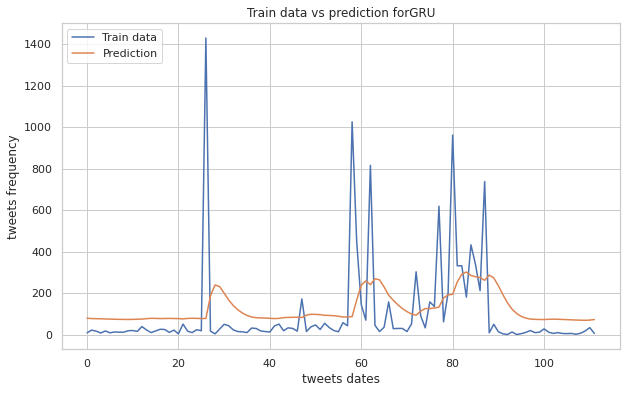

In [474]:
def prediction(model):
    prediction = model.predict(X_train)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)

# Plot test data vs prediction
def plot_future(prediction, model_name, y_train):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_train), 
             label="Train data")
    plt.plot(np.arange(range_future), 
             np.array(prediction),label="Prediction")
    plt.title("Train data vs prediction for" + model_name)
    plt.legend(loc="upper left")
    plt.xlabel("tweets dates")
    plt.ylabel("tweets frequency")
 
plot_future(prediction_gru, "GRU", y_train)

In [475]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ":")
    print("Mean Absolute Error: {:.4f}".format(mae))
    print("Root Mean Square Error: {:.4f}".format(rmse))
    print("")
evaluate_prediction(prediction_gru, y_train, "GRU")

GRU:
Mean Absolute Error: 122.7215
Root Mean Square Error: 216.2455



1/1 [==============================] - 0s 22ms/step


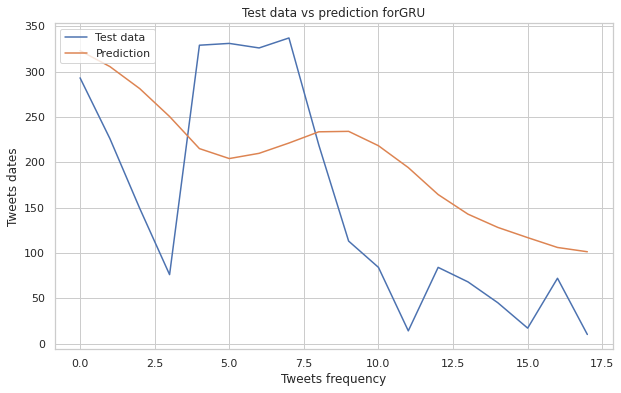

In [476]:
# Make prediction
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)
#prediction_bilstm = prediction(model_bilstm)
# Plot test data vs prediction
def plot_future(prediction, model_name, y_test):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), 
             label= "Test data")
    plt.plot(np.arange(range_future), 
             np.array(prediction),label="Prediction")
    plt.title("Test data vs prediction for" + model_name)
    plt.legend(loc="upper left")
    plt.xlabel("Tweets frequency")
    plt.ylabel("Tweets dates")
 
plot_future(prediction_gru, "GRU", y_test)

In [477]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ":")
    print("Mean Absolute Error: {:.4f}".format(mae))
    print("Root Mean Square Error: {:.4f}".format(rmse))
    print("")
evaluate_prediction(prediction_gru, y_test, "GRU")

GRU:
Mean Absolute Error: 100.0996
Root Mean Square Error: 109.2303



In [478]:
#right likes prediction using gru

In [479]:
train_size = int(len(right_likes_gru)*0.8)

train_data = right_likes_gru.iloc[:train_size]
test_data = right_likes_gru.iloc[train_size:]

In [480]:
scaler = MinMaxScaler().fit(train_data)
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

In [481]:
def create_dataset (X, look_back = 1):
    Xs, ys = [], []
 
    for i in range(len(X)-look_back):
        v = X[i:i+look_back]
        Xs.append(v)
        ys.append(X[i+look_back])
 
    return np.array(Xs), np.array(ys)
LOOK_BACK = 14
X_train, y_train = create_dataset(train_scaled,LOOK_BACK)
X_test, y_test = create_dataset(test_scaled,LOOK_BACK)
# Print data shape
print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
print("X_test.shape: ", X_test.shape) 
print("y_test.shape: ", y_test.shape)

X_train.shape:  (94, 14, 1)
y_train.shape:  (94, 1)
X_test.shape:  (13, 14, 1)
y_test.shape:  (13, 1)


In [482]:
# Create GRU model
def create_gru(units):
    model = Sequential()
    # Input layer
    model.add(GRU (units = units, return_sequences = True, 
    input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2)) 
    # Hidden layer
    model.add(GRU(units = units)) 
    model.add(Dropout(0.2))
    model.add(Dense(units = 1)) 
    #Compile model
    model.compile(optimizer="adam",loss="mse")
    return model
model_gru = create_gru(64)

In [483]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = "val_loss",
                                               patience = 10)
    history = model.fit(X_train, y_train, epochs = 100,  
                        validation_split = 0.2,
                        batch_size = 16, shuffle = False, 
                        callbacks = [early_stop])
    return history
history_gru = fit_model(model_gru)

Epoch 1/100
5/5 [==============================] - 3s 147ms/step - loss: 0.0238 - val_loss: 0.0020
Epoch 2/100
5/5 [==============================] - 0s 18ms/step - loss: 0.0229 - val_loss: 0.0030
Epoch 3/100
5/5 [==============================] - 0s 17ms/step - loss: 0.0231 - val_loss: 0.0037
Epoch 4/100
5/5 [==============================] - 0s 18ms/step - loss: 0.0230 - val_loss: 0.0039
Epoch 5/100
5/5 [==============================] - 0s 18ms/step - loss: 0.0234 - val_loss: 0.0036
Epoch 6/100
5/5 [==============================] - 0s 18ms/step - loss: 0.0229 - val_loss: 0.0034
Epoch 7/100
5/5 [==============================] - 0s 18ms/step - loss: 0.0230 - val_loss: 0.0035
Epoch 8/100
5/5 [==============================] - 0s 18ms/step - loss: 0.0224 - val_loss: 0.0039
Epoch 9/100
5/5 [==============================] - 0s 18ms/step - loss: 0.0228 - val_loss: 0.0045
Epoch 10/100
5/5 [==============================] - 0s 18ms/step - loss: 0.0233 - val_loss: 0.0041
Epoch 11/100
5/5 [

In [484]:
y_test = scaler.inverse_transform(y_test)
y_train = scaler.inverse_transform(y_train)

3/3 [==============================] - 0s 4ms/step


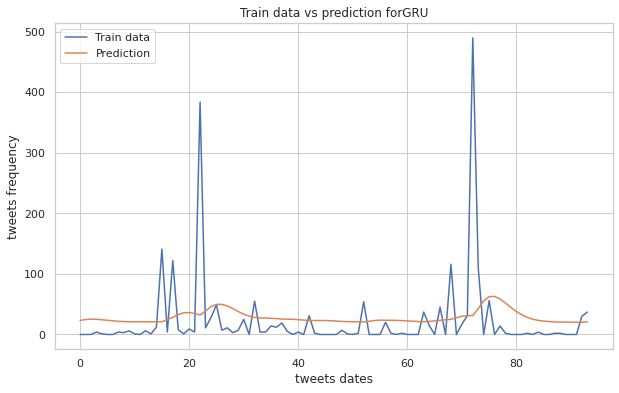

In [485]:
def prediction(model):
    prediction = model.predict(X_train)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)

# Plot test data vs prediction
def plot_future(prediction, model_name, y_train):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_train), 
             label="Train data")
    plt.plot(np.arange(range_future), 
             np.array(prediction),label="Prediction")
    plt.title("Train data vs prediction for" + model_name)
    plt.legend(loc="upper left")
    plt.xlabel("tweets dates")
    plt.ylabel("tweets frequency")
 
plot_future(prediction_gru, "GRU", y_train)

In [486]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ":")
    print("Mean Absolute Error: {:.4f}".format(mae))
    print("Root Mean Square Error: {:.4f}".format(rmse))
    print("")
evaluate_prediction(prediction_gru, y_train, "GRU")

GRU:
Mean Absolute Error: 33.9199
Root Mean Square Error: 67.3050



1/1 [==============================] - 0s 26ms/step


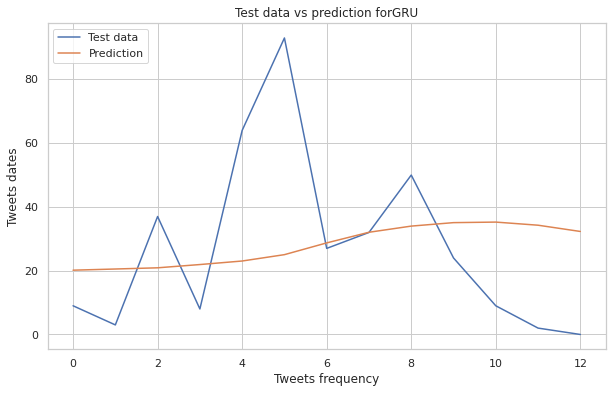

In [487]:
# Make prediction
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)
#prediction_bilstm = prediction(model_bilstm)
# Plot test data vs prediction
def plot_future(prediction, model_name, y_test):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), 
             label= "Test data")
    plt.plot(np.arange(range_future), 
             np.array(prediction),label="Prediction")
    plt.title("Test data vs prediction for" + model_name)
    plt.legend(loc="upper left")
    plt.xlabel("Tweets frequency")
    plt.ylabel("Tweets dates")
 
plot_future(prediction_gru, "GRU", y_test)

In [488]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ":")
    print("Mean Absolute Error: {:.4f}".format(mae))
    print("Root Mean Square Error: {:.4f}".format(rmse))
    print("")
evaluate_prediction(prediction_gru, y_test, "GRU")

GRU:
Mean Absolute Error: 22.1030
Root Mean Square Error: 28.1997



In [489]:
# centre likes prediction

In [490]:
train_size = int(len(centre_likes_gru)*0.8)

train_data = centre_likes_gru.iloc[:train_size]
test_data = centre_likes_gru.iloc[train_size:]

In [491]:
scaler = MinMaxScaler().fit(train_data)
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

In [492]:
def create_dataset (X, look_back = 1):
    Xs, ys = [], []
 
    for i in range(len(X)-look_back):
        v = X[i:i+look_back]
        Xs.append(v)
        ys.append(X[i+look_back])
 
    return np.array(Xs), np.array(ys)
LOOK_BACK = 14
X_train, y_train = create_dataset(train_scaled,LOOK_BACK)
X_test, y_test = create_dataset(test_scaled,LOOK_BACK)
# Print data shape
print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
print("X_test.shape: ", X_test.shape) 
print("y_test.shape: ", y_test.shape)

X_train.shape:  (112, 14, 1)
y_train.shape:  (112, 1)
X_test.shape:  (18, 14, 1)
y_test.shape:  (18, 1)


In [493]:
# Create GRU model
def create_gru(units):
    model = Sequential()
    # Input layer
    model.add(GRU (units = units, return_sequences = True, 
    input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2)) 
    # Hidden layer
    model.add(GRU(units = units)) 
    model.add(Dropout(0.2))
    model.add(Dense(units = 1)) 
    #Compile model
    model.compile(optimizer="adam",loss="mse")
    return model
model_gru = create_gru(64)

In [494]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = "val_loss",
                                               patience = 10)
    history = model.fit(X_train, y_train, epochs = 100,  
                        validation_split = 0.2,
                        batch_size = 16, shuffle = False, 
                        callbacks = [early_stop])
    return history
history_gru = fit_model(model_gru)

Epoch 1/100
6/6 [==============================] - 3s 119ms/step - loss: 0.0138 - val_loss: 0.0197
Epoch 2/100
6/6 [==============================] - 0s 17ms/step - loss: 0.0200 - val_loss: 0.0095
Epoch 3/100
6/6 [==============================] - 0s 18ms/step - loss: 0.0146 - val_loss: 0.0062
Epoch 4/100
6/6 [==============================] - 0s 17ms/step - loss: 0.0135 - val_loss: 0.0098
Epoch 5/100
6/6 [==============================] - 0s 17ms/step - loss: 0.0131 - val_loss: 0.0125
Epoch 6/100
6/6 [==============================] - 0s 16ms/step - loss: 0.0137 - val_loss: 0.0097
Epoch 7/100
6/6 [==============================] - 0s 17ms/step - loss: 0.0130 - val_loss: 0.0106
Epoch 8/100
6/6 [==============================] - 0s 16ms/step - loss: 0.0134 - val_loss: 0.0124
Epoch 9/100
6/6 [==============================] - 0s 17ms/step - loss: 0.0133 - val_loss: 0.0107
Epoch 10/100
6/6 [==============================] - 0s 16ms/step - loss: 0.0134 - val_loss: 0.0131
Epoch 11/100
6/6 [

In [495]:
y_test = scaler.inverse_transform(y_test)
y_train = scaler.inverse_transform(y_train)

4/4 [==============================] - 0s 3ms/step


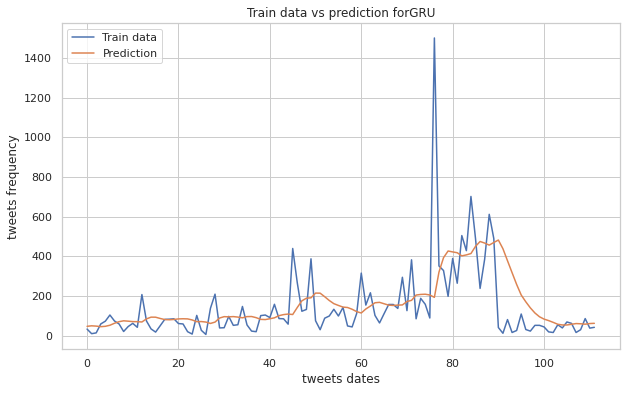

In [496]:
def prediction(model):
    prediction = model.predict(X_train)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)

# Plot test data vs prediction
def plot_future(prediction, model_name, y_train):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_train), 
             label="Train data")
    plt.plot(np.arange(range_future), 
             np.array(prediction),label="Prediction")
    plt.title("Train data vs prediction for" + model_name)
    plt.legend(loc="upper left")
    plt.xlabel("tweets dates")
    plt.ylabel("tweets frequency")
 
plot_future(prediction_gru, "GRU", y_train)

In [497]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ":")
    print("Mean Absolute Error: {:.4f}".format(mae))
    print("Root Mean Square Error: {:.4f}".format(rmse))
    print("")
evaluate_prediction(prediction_gru, y_train, "GRU")

GRU:
Mean Absolute Error: 87.8164
Root Mean Square Error: 168.3149



1/1 [==============================] - 0s 22ms/step


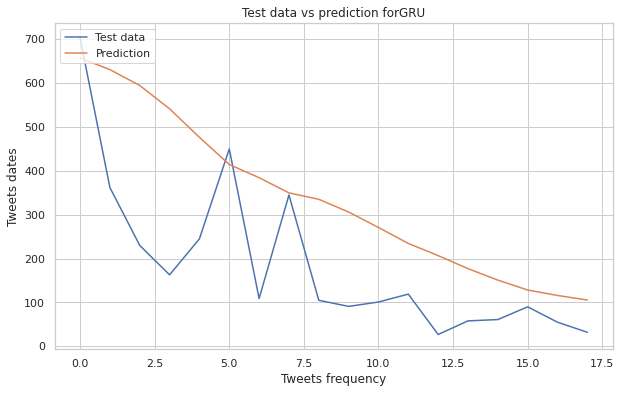

In [498]:
# Make prediction
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)
#prediction_bilstm = prediction(model_bilstm)
# Plot test data vs prediction
def plot_future(prediction, model_name, y_test):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), 
             label= "Test data")
    plt.plot(np.arange(range_future), 
             np.array(prediction),label="Prediction")
    plt.title("Test data vs prediction for" + model_name)
    plt.legend(loc="upper left")
    plt.xlabel("Tweets frequency")
    plt.ylabel("Tweets dates")
 
plot_future(prediction_gru, "GRU", y_test)

In [499]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ":")
    print("Mean Absolute Error: {:.4f}".format(mae))
    print("Root Mean Square Error: {:.4f}".format(rmse))
    print("")
evaluate_prediction(prediction_gru, y_test, "GRU")

GRU:
Mean Absolute Error: 160.9802
Root Mean Square Error: 195.5248



In [500]:
#left leaning likes prediction

In [501]:
train_size = int(len(left_leaning_likes_gru)*0.7)

train_data = left_leaning_likes_gru.iloc[:train_size]
test_data = left_leaning_likes_gru.iloc[train_size:]

In [502]:
scaler = MinMaxScaler().fit(train_data)
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

In [503]:
def create_dataset (X, look_back = 1):
    Xs, ys = [], []
 
    for i in range(len(X)-look_back):
        v = X[i:i+look_back]
        Xs.append(v)
        ys.append(X[i+look_back])
 
    return np.array(Xs), np.array(ys)
LOOK_BACK = 14
X_train, y_train = create_dataset(train_scaled,LOOK_BACK)
X_test, y_test = create_dataset(test_scaled,LOOK_BACK)
# Print data shape
print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
print("X_test.shape: ", X_test.shape) 
print("y_test.shape: ", y_test.shape)

X_train.shape:  (96, 14, 1)
y_train.shape:  (96, 1)
X_test.shape:  (34, 14, 1)
y_test.shape:  (34, 1)


In [504]:
# Create GRU model
def create_gru(units):
    model = Sequential()
    # Input layer
    model.add(GRU (units = units, return_sequences = True, 
    input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2)) 
    # Hidden layer
    model.add(GRU(units = units)) 
    model.add(Dropout(0.2))
    model.add(Dense(units = 1)) 
    #Compile model
    model.compile(optimizer="adam",loss="mse")
    return model
model_gru = create_gru(64)

In [505]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = "val_loss",
                                               patience = 10)
    history = model.fit(X_train, y_train, epochs = 100,  
                        validation_split = 0.2,
                        batch_size = 16, shuffle = False, 
                        callbacks = [early_stop])
    return history
history_gru = fit_model(model_gru)

Epoch 1/100
5/5 [==============================] - 3s 146ms/step - loss: 0.0192 - val_loss: 0.0209
Epoch 2/100
5/5 [==============================] - 0s 18ms/step - loss: 0.0208 - val_loss: 0.0231
Epoch 3/100
5/5 [==============================] - 0s 18ms/step - loss: 0.0199 - val_loss: 0.0237
Epoch 4/100
5/5 [==============================] - 0s 17ms/step - loss: 0.0197 - val_loss: 0.0207
Epoch 5/100
5/5 [==============================] - 0s 18ms/step - loss: 0.0193 - val_loss: 0.0198
Epoch 6/100
5/5 [==============================] - 0s 18ms/step - loss: 0.0191 - val_loss: 0.0200
Epoch 7/100
5/5 [==============================] - 0s 17ms/step - loss: 0.0188 - val_loss: 0.0199
Epoch 8/100
5/5 [==============================] - 0s 18ms/step - loss: 0.0185 - val_loss: 0.0203
Epoch 9/100
5/5 [==============================] - 0s 18ms/step - loss: 0.0187 - val_loss: 0.0215
Epoch 10/100
5/5 [==============================] - 0s 18ms/step - loss: 0.0183 - val_loss: 0.0217
Epoch 11/100
5/5 [

In [506]:
y_test = scaler.inverse_transform(y_test)
y_train = scaler.inverse_transform(y_train)

3/3 [==============================] - 0s 4ms/step


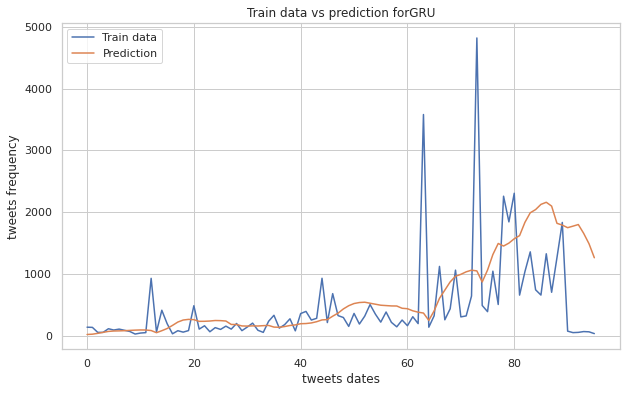

In [507]:
def prediction(model):
    prediction = model.predict(X_train)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)

# Plot test data vs prediction
def plot_future(prediction, model_name, y_train):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_train), 
             label="Train data")
    plt.plot(np.arange(range_future), 
             np.array(prediction),label="Prediction")
    plt.title("Train data vs prediction for" + model_name)
    plt.legend(loc="upper left")
    plt.xlabel("tweets dates")
    plt.ylabel("tweets frequency")
 
plot_future(prediction_gru, "GRU", y_train)

In [508]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ":")
    print("Mean Absolute Error: {:.4f}".format(mae))
    print("Root Mean Square Error: {:.4f}".format(rmse))
    print("")
evaluate_prediction(prediction_gru, y_train, "GRU")

GRU:
Mean Absolute Error: 428.5936
Root Mean Square Error: 762.6192



2/2 [==============================] - 0s 4ms/step


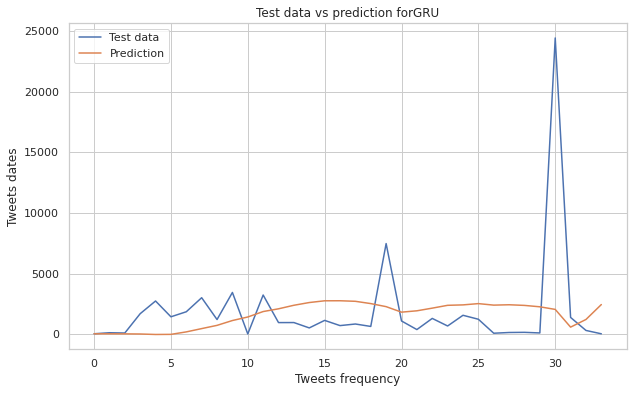

In [509]:
# Make prediction
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)
#prediction_bilstm = prediction(model_bilstm)
# Plot test data vs prediction
def plot_future(prediction, model_name, y_test):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), 
             label= "Test data")
    plt.plot(np.arange(range_future), 
             np.array(prediction),label="Prediction")
    plt.title("Test data vs prediction for" + model_name)
    plt.legend(loc="upper left")
    plt.xlabel("Tweets frequency")
    plt.ylabel("Tweets dates")
 
plot_future(prediction_gru, "GRU", y_test)

In [510]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ":")
    print("Mean Absolute Error: {:.4f}".format(mae))
    print("Root Mean Square Error: {:.4f}".format(rmse))
    print("")
evaluate_prediction(prediction_gru, y_test, "GRU")

GRU:
Mean Absolute Error: 2222.2492
Root Mean Square Error: 4261.7811



In [511]:
#right leaning likes forecasting

In [512]:
train_size = int(len(right_leaning_likes_gru)*0.7)

train_data = right_leaning_likes_gru.iloc[:train_size]
test_data = right_leaning_likes_gru.iloc[train_size:]

In [513]:
scaler = MinMaxScaler().fit(train_data)
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

In [514]:
def create_dataset (X, look_back = 1):
    Xs, ys = [], []
 
    for i in range(len(X)-look_back):
        v = X[i:i+look_back]
        Xs.append(v)
        ys.append(X[i+look_back])
 
    return np.array(Xs), np.array(ys)
LOOK_BACK = 14
X_train, y_train = create_dataset(train_scaled,LOOK_BACK)
X_test, y_test = create_dataset(test_scaled,LOOK_BACK)
# Print data shape
print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
print("X_test.shape: ", X_test.shape) 
print("y_test.shape: ", y_test.shape)

X_train.shape:  (88, 14, 1)
y_train.shape:  (88, 1)
X_test.shape:  (30, 14, 1)
y_test.shape:  (30, 1)


In [515]:
# Create GRU model
def create_gru(units):
    model = Sequential()
    # Input layer
    model.add(GRU (units = units, return_sequences = True, 
    input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2)) 
    # Hidden layer
    model.add(GRU(units = units)) 
    model.add(Dropout(0.2))
    model.add(Dense(units = 1)) 
    #Compile model
    model.compile(optimizer="adam",loss="mse")
    return model
model_gru = create_gru(64)

In [516]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = "val_loss",
                                               patience = 10)
    history = model.fit(X_train, y_train, epochs = 100,  
                        validation_split = 0.2,
                        batch_size = 16, shuffle = False, 
                        callbacks = [early_stop])
    return history
history_gru = fit_model(model_gru)

Epoch 1/100
5/5 [==============================] - 3s 144ms/step - loss: 0.0223 - val_loss: 0.0067
Epoch 2/100
5/5 [==============================] - 0s 18ms/step - loss: 0.0239 - val_loss: 0.0039
Epoch 3/100
5/5 [==============================] - 0s 18ms/step - loss: 0.0229 - val_loss: 0.0037
Epoch 4/100
5/5 [==============================] - 0s 18ms/step - loss: 0.0223 - val_loss: 0.0040
Epoch 5/100
5/5 [==============================] - 0s 18ms/step - loss: 0.0227 - val_loss: 0.0042
Epoch 6/100
5/5 [==============================] - 0s 18ms/step - loss: 0.0224 - val_loss: 0.0039
Epoch 7/100
5/5 [==============================] - 0s 18ms/step - loss: 0.0222 - val_loss: 0.0039
Epoch 8/100
5/5 [==============================] - 0s 18ms/step - loss: 0.0216 - val_loss: 0.0040
Epoch 9/100
5/5 [==============================] - 0s 18ms/step - loss: 0.0220 - val_loss: 0.0041
Epoch 10/100
5/5 [==============================] - 0s 18ms/step - loss: 0.0229 - val_loss: 0.0039
Epoch 11/100
5/5 [

In [517]:
y_test = scaler.inverse_transform(y_test)
y_train = scaler.inverse_transform(y_train)

3/3 [==============================] - 0s 4ms/step


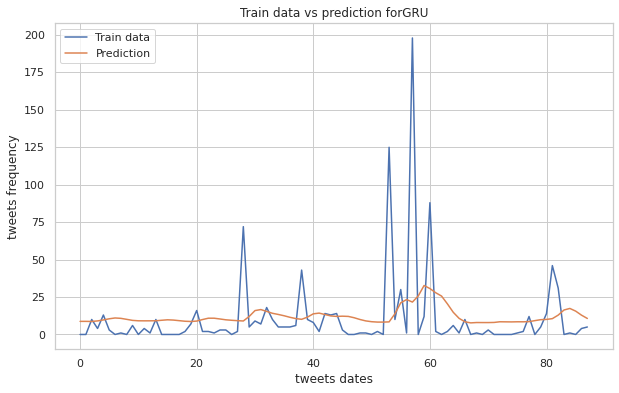

In [518]:
def prediction(model):
    prediction = model.predict(X_train)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)

# Plot test data vs prediction
def plot_future(prediction, model_name, y_train):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_train), 
             label="Train data")
    plt.plot(np.arange(range_future), 
             np.array(prediction),label="Prediction")
    plt.title("Train data vs prediction for" + model_name)
    plt.legend(loc="upper left")
    plt.xlabel("tweets dates")
    plt.ylabel("tweets frequency")
 
plot_future(prediction_gru, "GRU", y_train)

In [519]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ":")
    print("Mean Absolute Error: {:.4f}".format(mae))
    print("Root Mean Square Error: {:.4f}".format(rmse))
    print("")
evaluate_prediction(prediction_gru, y_train, "GRU")

GRU:
Mean Absolute Error: 13.4839
Root Mean Square Error: 26.6952



1/1 [==============================] - 0s 22ms/step


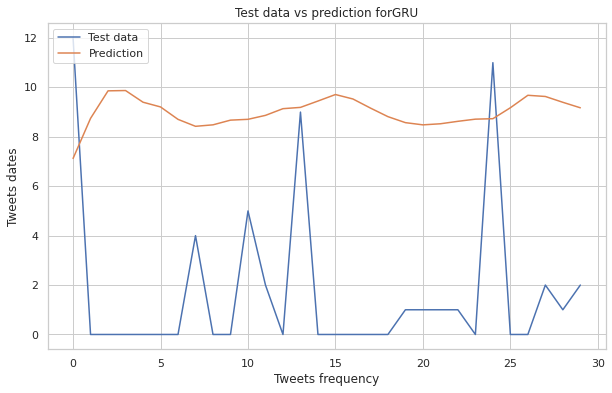

In [520]:
# Make prediction
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)
#prediction_bilstm = prediction(model_bilstm)
# Plot test data vs prediction
def plot_future(prediction, model_name, y_test):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), 
             label= "Test data")
    plt.plot(np.arange(range_future), 
             np.array(prediction),label="Prediction")
    plt.title("Test data vs prediction for" + model_name)
    plt.legend(loc="upper left")
    plt.xlabel("Tweets frequency")
    plt.ylabel("Tweets dates")
 
plot_future(prediction_gru, "GRU", y_test)

In [521]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ":")
    print("Mean Absolute Error: {:.4f}".format(mae))
    print("Root Mean Square Error: {:.4f}".format(rmse))
    print("")
evaluate_prediction(prediction_gru, y_test, "GRU")

GRU:
Mean Absolute Error: 7.7358
Root Mean Square Error: 8.0800

